In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch.nn as nn
from torch import optim

from utils import read_excel_sheet, label_encode
from task_9.extended_eda import ExtendedEDA
from task_24.task_24 import normalize_date_column, rename_columns_from_file, merge_dataframes_left_join, append_rehospitalized_status_to_patients
from task_24.patient_stas import process_rehospitalization_data
from hospital_models.generic_torch_model2 import ClassificationPipeline, ClassificationVisualization, NeuralNetworkClassifier
from task_37.pca_model import PCAClassificationPipeline
from task_37.autoencoder_model import Autoencoder

In [2]:
# Move to src directory
src_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [3]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
df = read_excel_sheet(file_absolute_path, "hospitalization1")

# Task 9 - Hospitalization 1 EDA

In [4]:
# Path to the translation_file
rehospitalization1_columns_file = os.path.join(src_dir, "team_1/translations/hospitalization1.json")
eda = ExtendedEDA(df, translation_file=rehospitalization1_columns_file)

In [5]:
eda.head()

Patient  department_id  Admission_Medical_Record    Admission_Entry_Date  \
0    62051              1                   5207766 2021-09-04 22:21:04.440   
1   951769              2                   5605505 2022-02-15 14:39:02.220   
2   863707              2                   6755794 2023-05-15 04:21:09.137   
3   884200              3                   6964052 2023-07-27 08:16:48.640   
4   936226              4                   7023187 2023-08-20 19:44:35.410   
5   429566              3                   6219263 2022-10-06 14:33:02.843   
6   534461              4                   6710914 2023-04-26 02:11:40.507   
7   159235              4                   4281164 2020-07-23 10:09:26.727   
8     4767              5                   6587317 2023-03-03 21:57:32.220   
9   776982              1                   5226298 2021-09-13 15:51:52.000   

         Release_Date reception_type patient_origin Release_Type  \
0 2021-09-08 14:43:00           דחוף          מביתו  שוחרר לביתו   
1 2022-02-16 13:37:00           דחוף            אחר  שוחרר לביתו   
2 2023-05-15 15:59:00           דחוף          מביתו  שוחרר לביתו   
3 2023-07-28 17:34:00           דחוף          ממוסד  שוחרר לביתו   
4 2023-08-21 15:47:00           דחוף          מביתו  שוחרר לביתו   
5 2022-10-08 12:58:00           דחוף          מביתו  שוחרר לביתו   
6 2023-04-26 13:01:00           דחוף          מביתו  שוחרר לביתו   
7 2020-07-24 15:22:00           דחוף          מביתו  שוחרר לביתו   
8 2023-03-05 16:21:00           דחוף          מביתו  שוחרר לביתו   
9 2021-09-26 10:39:00           דחוף            אחר  שוחרר לביתו   

   release_doctor_code  hospitalization_duration  \
0               6878.0                         4   
1              12615.0                         1   
2              12599.0                         0   
3              11582.0                         1   
4              12359.0                         1   
5              11582.0                         2   
6               6534.0                         0   
7               9422.0                         1   
8              11810.0                         2   
9               6888.0                        13   

            admission_diagnoses                    release_diagnoses  
0                         42731                                42731  
1                        Z3601                                Z3601   
2                          7895                                 7895  
3                         78609                        4919 , 78609   
4                         78609               78609 , 81203 , 83100   
5                          2769                                 2768  
6                         78060                                V718   
7                         43491                                43491  
8                         79.84                                79.84  
9   24290 , 4160 , 4290 , 7807    2428 , 3940 , 4160 , 4290 , 79092

In [6]:
eda.show_unique_values()

Unique values in 'Patient':


Patient
31075         53
354573        23
65151         14
3523          13
34605         13
377264        12
863707        12
8873          12
68317         12
2872          12
9208          11
40209         11
114049        11
16278         10
134389        10
77789         10
27556         10
85208         10
3694          10
749573        10
229618         9
283075         9
599994         9
817206         9
153426         9
186392         8
188969         8
29272          8
119311         8
32062          8
196110         8
41833          8
120907         8
164131         8
792167         8
188618         8
13171          8
1867           8
143851         7
448612         7
732979         7
71607          7
36348          7
174076         7
73522          7
169379         7
3117           7
533368         7
520288         7
251422         7
1963           7
267928         7
811996         6
305259         6
23412          6
526395         6
43068          6
92602          6
762029         6
9824           6
801060         6
1051           6
58606          6
71378          6
6529           6
1083418        6
132771         6
4388           6
95275          6
773570         6
80421          6
50188          6
229072         6
848171         6
152726         5
2336           5
789270         5
75548          5
12023          5
24161          5
10118          5
182485         5
66539          5
765886         5
951            5
105432         5
20020          5
130183         5
215144         5
124330         5
74669          5
9994           5
3198           5
11125          5
206522         5
852287         5
139008         5
70805          5
903776         5
817604         5
237382         5
107507         5
255117         5
3625           5
901281         5
302851         5
6461           5
948759         5
454774         5
174559         5
76355          5
7712           5
163630         5
96660          5
104539         5
955448         5
2531           5
90622          5
51808          5
3876           5
65992          5
733744         5
964136         5
7202           5
56875          5
252055         5
24829          4
234383         4
227616         4
539114         4
543148         4
1081663        4
6723           4
185828         4
722350         4
881128         4
178714         4
28177          4
970377         4
226808         4
668815         4
4298           4
625439         4
564520         4
116146         4
632560         4
10080          4
643522         4
4814           4
16985          4
7511           4
142659         4
539960         4
424423         4
9684           4
50645          4
4929           4
36083          4
182691         4
77008          4
671147         4
650026         4
144692         4
305            4
256210         4
1057487        4
39719          4
97544          4
78947          4
3920           4
28588          4
142448         4
238902         4
2447           4
64035          4
2496           4
765613         4
599333         4
83405          4
430425         4
76843          4
65820          4
682903         4
1028808        4
14922          4
190457         4
235237         4
146073         4
279394         4
823081         4
754756         4
44202          4
118747         4
192107         4
597809         4
153882         4
83657          4
425140         4
172465         4
59255          4
318283         4
513102         4
152515         4
763965         4
188582         4
221758         4
37183          4
5404           4
297758         4
168312         4
769513         4
920088         4
664856         4
28362          4
833941         4
114787         4
241780         4
59632          4
587566         4
10254          4
78720          4
600371         4
802003         4
251472         4
763667         4
246911         4
720970         4
84246          4
106618         4
158638         4
703331         4
339987         4
72464          4
56340          4
93771         



Unique values in 'department_id':


department_id
1           1582
4           1582
3           1392
2           1263
5           1214



Unique values in 'Admission_Medical_Record':


Admission_Medical_Record
5207766                         1
4638165                         1
4684750                         1
6659199                         1
6194540                         1
5350308                         1
5190719                         1
5127629                         1
3880670                         1
7053944                         1
7039868                         1
6340086                         1
4684639                         1
4088827                         1
7106745                         1
6705164                         1
5994406                         1
5905048                         1
4818920                         1
4030154                         1
3973895                         1
5793468                         1
5423743                         1
5167360                         1
4199036                         1
5736678                         1
5342734                         1
5621018                         1
6387993                         1
3999278                         1
6359377                         1
4899269                         1
4662722                         1
4516317                         1
4298041                         1
4049187                         1
7118236                         1
6995645                         1
6914916                         1
4996344                         1
6036360                         1
5480840                         1
4166548                         1
4797421                         1
4057463                         1
7306422                         1
5498703                         1
4072786                         1
7020419                         1
6995547                         1
5421514                         1
5044065                         1
4570368                         1
4633432                         1
6807827                         1
6822153                         1
6867221                         1
4124762                         1
5219610                         1
4284135                         1
4194429                         1
3873037                         1
7158684                         1
6633031                         1
5831593                         1
4531609                         1
7248185                         1
7028868                         1
6022300                         1
4252002                         1
6013150                         1
3883969                         1
6803369                         1
5378997                         1
5220128                         1
4848710                         1
4344685                         1
4106141                         1
5761378                         1
5542149                         1
5125833                         1
4588733                         1
5008554                         1
5186439                         1
5335639                         1
7214848                         1
7053411                         1
4081689                         1
6682822                         1
6392936                         1
4826559                         1
4473836                         1
4043823                         1
6334013                         1
5399537                         1
4411421                         1
5275518                         1
5184091                         1
6792881                         1
6206671                         1
6179887                         1
5889669                         1
5312992                         1
4063693                         1
5420195                         1
5853717                         1
5828262                         1
5459259                         1
6369438                         1
6985474                         1
4163351                         1
6911981                         1
4684030                         1
5462732                         1
6431234                         1
7266095                         1
5167413                        



Unique values in 'Admission_Entry_Date':


Admission_Entry_Date
2021-09-04 22:21:04.440                     1
2021-01-10 05:03:11.557                     1
2021-01-29 21:15:59.523                     1
2023-04-01 01:39:41.437                     1
2022-09-24 02:36:33.567                     1
2021-11-06 15:27:59.700                     1
2021-08-25 23:18:07.050                     1
2021-07-31 20:59:18.627                     1
2020-01-05 18:47:54.220                     1
2023-09-06 03:36:28.490                     1
2023-08-30 13:25:31.530                     1
2022-11-28 12:18:38.410                     1
2021-01-29 17:45:39.560                     1
2020-04-26 18:22:27.000                     1
2023-09-27 18:10:13.763                     1
2023-04-23 13:58:36.337                     1
2022-07-03 18:16:21.120                     1
2022-06-06 14:04:36.713                     1
2021-03-28 19:34:10.597                     1
2020-03-10 07:34:14.053                     1
2020-02-13 16:55:49.433                     1
2022-04-21 12:17:03.167                     1
2021-12-05 16:10:49.490                     1
2021-08-15 22:05:45.933                     1
2020-06-22 03:14:02.697                     1
2022-03-27 21:24:58.757                     1
2021-11-02 23:33:54.863                     1
2022-02-21 22:05:27.520                     1
2022-12-15 22:05:56.113                     1
2020-02-25 02:18:44.667                     1
2022-12-05 15:55:56.083                     1
2021-05-03 03:26:13.120                     1
2021-01-20 03:24:52.143                     1
2020-11-17 02:14:31.927                     1
2020-07-31 00:08:48.520                     1
2020-03-21 02:44:14.943                     1
2023-10-04 10:26:56.910                     1
2023-08-08 14:32:20.270                     1
2023-07-09 03:19:12.847                     1
2021-06-11 04:57:31.163                     1
2022-07-19 14:20:08.227                     1
2021-12-27 16:35:58.483                     1
2020-06-07 23:52:46.553                     1
2021-03-17 14:08:21.593                     1
2020-03-29 02:59:20.977                     1
2023-12-20 20:34:07.410                     1
2022-01-03 21:34:14.630                     1
2020-04-13 03:50:22.097                     1
2023-08-18 16:53:24.390                     1
2023-08-08 14:07:28.780                     1
2021-12-05 06:24:39.447                     1
2021-06-29 14:31:57.447                     1
2020-12-09 20:19:36.690                     1
2021-01-06 21:16:26.073                     1
2023-06-04 19:03:55.360                     1
2023-06-09 22:11:18.960                     1
2023-06-19 19:51:10.360                     1
2020-05-18 13:34:15.037                     1
2021-09-11 16:19:11.307                     1
2020-07-25 11:45:19.327                     1
2020-06-19 02:30:41.487                     1
2020-01-01 18:33:19.203                     1
2023-10-24 21:49:44.567                     1
2023-03-21 14:40:08.533                     1
2022-05-08 17:43:01.837                     1
2020-11-23 13:48:16.553                     1
2023-11-29 02:21:20.803                     1
2023-08-23 16:26:23.240                     1
2022-07-13 18:14:25.353                     1
2020-07-14 17:25:22.587                     1
2022-07-11 02:53:22.180                     1
2020-01-06 23:52:34.300                     1
2023-06-02 16:17:10.230                     1
2021-11-17 08:41:24.930                     1
2021-09-12 04:52:38.710                     1
2021-04-11 18:56:07.843                     1
2020-08-23 04:15:33.857                     1
2020-05-08 09:26:19.783                     1
2022-04-05 23:51:54.430                     1
2022-01-20 14:58:38.673                     1
2021-07-30 05:08:45.283                     1
2020-12-18 12:32:12.807                     1
2021-06-16 08:32:27.923                     1
2021-08-23 20:31:21.473                     1
2021-10-31 15:17:01.177                     1
2023-11-15 21:13:52.833                     1
2023-09-05 16:31:12.240



Unique values in 'Release_Date':


Release_Date
2023-07-06 15:00:00             4
2020-06-29 16:00:00             3
2023-11-29 16:00:00             3
2021-05-23 16:00:00             3
2022-12-15 17:44:00             2
2023-02-14 14:00:00             2
2022-01-12 16:00:00             2
2021-09-05 16:00:00             2
2023-10-09 14:32:00             2
2023-12-25 15:30:00             2
2021-12-31 12:41:00             2
2020-11-19 15:49:00             2
2023-01-05 15:00:00             2
2021-06-06 15:27:00             2
2022-02-21 16:00:00             2
2023-01-22 16:00:00             2
2023-10-02 11:55:00             2
2023-08-15 18:00:00             2
2021-01-08 11:00:00             2
2022-07-24 14:30:00             2
2020-12-28 15:24:00             2
2020-08-26 14:21:00             2
2020-09-24 16:00:00             2
2023-01-26 14:00:00             2
2021-10-13 17:00:00             2
2023-12-13 14:00:00             2
2023-11-26 15:00:00             2
2023-09-13 15:00:00             2
2022-03-09 17:50:00             2
2022-05-23 15:00:00             2
2023-02-05 15:00:00             2
2022-03-06 16:30:00             2
2023-03-06 16:00:00             2
2022-06-02 15:40:00             2
2023-08-24 14:00:00             2
2023-10-18 14:00:00             2
2020-01-29 17:00:00             2
2023-06-04 13:00:00             2
2020-02-18 16:02:00             2
2023-11-28 15:00:00             2
2023-01-01 16:08:00             2
2022-12-27 17:00:00             2
2023-10-16 15:00:00             2
2020-02-04 14:25:00             2
2023-07-18 15:00:00             2
2020-12-10 16:14:00             2
2021-01-12 15:00:00             2
2023-07-07 13:10:00             2
2023-11-12 14:58:00             2
2020-07-12 15:30:00             2
2023-05-09 13:49:00             2
2023-09-28 15:00:00             2
2023-10-10 14:00:00             2
2020-03-17 11:30:00             2
2020-02-19 15:00:00             2
2021-05-11 17:10:00             2
2022-05-22 16:30:00             2
2023-04-16 16:00:00             2
2022-05-11 15:00:00             2
2023-08-08 15:30:00             2
2021-08-02 15:50:00             2
2020-01-07 14:53:00             2
2021-06-16 16:15:00             2
2020-06-11 16:00:00             2
2021-10-21 15:30:00             2
2021-02-21 16:30:00             2
2023-09-15 12:40:00             2
2023-06-20 16:00:00             2
2022-11-18 12:00:00             2
2021-04-08 16:00:00             2
2023-01-08 15:19:00             2
2021-05-06 16:00:00             2
2023-03-03 12:00:00             2
2020-10-18 16:14:00             2
2022-02-13 16:05:00             2
2022-02-21 15:00:00             2
2020-09-06 15:47:00             2
2020-03-09 14:50:00             2
2021-10-06 17:30:00             2
2023-11-01 14:00:00             2
2022-11-03 17:30:00             2
2021-01-11 16:13:00             2
2023-09-04 16:48:00             2
2023-04-11 13:00:00             2
2021-11-30 09:12:00             2
2022-12-08 16:12:00             2
2020-07-14 15:31:00             2
2022-02-06 14:30:00             2
2023-08-30 14:43:00             2
2021-12-08 15:40:00             2
2020-10-18 15:00:00             2
2023-03-02 14:00:00             2
2023-02-02 14:00:00             2
2023-09-21 15:52:00             2
2021-09-19 15:15:00             2
2023-09-12 13:21:00             2
2023-10-24 14:30:00             2
2022-07-11 14:00:00             2
2020-07-14 15:14:00             2
2023-02-13 16:12:00             2
2020-12-29 16:46:00             2
2023-04-27 14:30:00             2
2020-04-29 13:41:00             1
2020-03-04 17:12:00             1
2022-12-16 12:30:00             1
2022-02-25 15:40:00             1
2023-04-24 14:46:00             1
2021-01-12 14:50:00             1
2020-07-26 15:00:00             1
2023-04-01 17:42:00             1
2021-01-30 13:10:00             1
2021-09-12 15:03:00             1
2020-05-20 16:54:00             1
2022-09-25 12:18:00             1
2022-11-29 17:15:00             1
2021-11-05 10:30:00             1
2023-08-31 14:03:00             1
2023-09-1



Unique values in 'reception_type':


reception_type
דחוף                 6284
מוזמן                 670
אשפוז יום              15



Unique values in 'patient_origin':


patient_origin
מביתו                     5604
ממוסד                      963
אחר                        375
ממרפאה                      59
מבית חולים אחר              32



Unique values in 'Release_Type':


Release_Type
שוחרר לביתו          6641
שוחרר למוסד           392



Unique values in 'release_doctor_code':


release_doctor_code
6888.0                   231
10313.0                  153
11460.0                  143
10760.0                  140
10676.0                  136
11175.0                  128
11670.0                  120
12649.0                  117
11833.0                  112
10762.0                  107
11178.0                  106
10112.0                  105
11023.0                   96
12129.0                   94
11673.0                   91
12639.0                   90
11233.0                   90
6878.0                    86
11848.0                   82
1052.0                    81
1147.0                    81
10535.0                   77
10262.0                   77
11167.0                   75
11365.0                   75
9582.0                    73
11746.0                   70
12633.0                   70
11639.0                   69
12095.0                   69
12659.0                   69
12587.0                   69
11888.0                   68
10948.0                   67
11582.0                   67
11377.0                   65
10525.0                   64
10806.0                   64
10126.0                   63
11437.0                   63
10803.0                   63
11360.0                   62
10615.0                   62
12359.0                   61
11887.0                   61
12517.0                   60
1645.0                    58
11810.0                   56
11792.0                   55
12591.0                   54
12354.0                   54
10795.0                   53
10575.0                   52
10946.0                   51
12737.0                   51
12688.0                   51
12473.0                   50
11515.0                   48
9281.0                    47
10487.0                   45
12886.0                   42
9702.0                    40
6892.0                    39
10561.0                   39
10798.0                   37
12914.0                   36
12615.0                   35
12318.0                   34
1386.0                    34
6927.0                    34
6890.0                    34
11482.0                   33
10769.0                   33
11842.0                   32
9660.0                    32
7806.0                    31
10079.0                   31
8826.0                    30
11119.0                   30
10989.0                   30
6731.0                    29
11822.0                   29
9436.0                    28
12363.0                   28
11767.0                   27
9983.0                    27
9972.0                    27
6860.0                    26
9718.0                    24
1636.0                    24
1734.0                    24
12427.0                   24
9971.0                    23
7993.0                    23
9422.0                    22
12765.0                   22
10928.0                   21
11546.0                   20
1143.0                    20
12599.0                   19
9097.0                    19
10016.0                   19
10014.0                   19
12916.0                   19
6534.0                    18
9361.0                    18
1236.0                    18
12183.0                   17
11504.0                   17
11611.0                   17
11484.0                   17
1583.0                    17
11927.0                   17
6885.0                    16
1408.0                    16
12269.0                   16
1072.0                    15
1662.0                    15
10537.0                   15
1769.0                    15
9729.0                    15
11755.0                   14
9975.0                    14
11687.0                   14
12280.0                   14
12582.0                   14
10773.0                   14
12081.0                   14
11505.0                   13
12330.0                   13
10779.0                   13
9435.0                    13
12510.0                   13
10942.0                   12
12681.0                   12
11206.0                   12
6937.0                    12
1985.0 



Unique values in 'hospitalization_duration':


hospitalization_duration
 1                       2026
 2                       1415
 3                        925
 0                        610
 4                        588
 5                        362
 6                        278
 7                        240
 8                        130
 9                         93
 10                        56
 12                        52
 11                        49
 13                        40
 14                        28
 15                        27
 17                        16
 16                        15
 19                        15
 18                        13
 21                        10
 20                         6
 24                         4
 26                         4
 27                         3
 22                         3
-1                          3
 28                         3
 35                         2
 29                         2
 31                         2
 23                         2
 25                         2
 45                         1
 34                         1
 41                         1
 43                         1
 32                         1
 50                         1
 33                         1
 49                         1
 37                         1



Unique values in 'admission_diagnoses':


admission_diagnoses
78609                                                          381
7865                                                           362
78060                                                          304
 O8889                                                         211
2859                                                           187
7895                                                           146
486                                                            143
4280                                                           110
42731                                                          107
7807                                                           107
514                                                            105
7802                                                            88
5990                                                            88
7806                                                            80
797                                                             74
43491                                                           74
2761                                                            70
5184                                                            66
5119                                                            62
5070                                                            60
5849                                                            54
7860                                                            52
389                                                             51
79.84                                                           50
41071                                                           49
7823                                                            48
99591                                                           43
4359                                                            38
 E888                                                           34
78900                                                           33
78791                                                           33
682                                                             33
78552                                                           29
78703                                                           27
49391                                                           25
78906                                                           25
584                                                             23
79091                                                           22
2512                                                            22
7907                                                            21
2809                                                            21
7862                                                            20
2989                                                            19
49121                                                           19
496                                                             19
4919                                                            19
586                                                             18
 V718                                                           18
7890                                                            17
 5119 , 78609                                                   17
7804                                                            17
27651                                                           16
780                                                             16
7851                                                            16
 2707 1                                                         16
27542                                                           16
 V73.70                                                         15
4111                                                            15
 V4582                                                          15
2767                       



Unique values in 'release_diagnoses':


release_diagnoses
7865                                                              275
78609                                                             240
 O8889                                                            203
78060                                                             194
2859                                                              148
486                                                               127
7895                                                              123
4280                                                               97
42731                                                              95
5990                                                               93
514                                                                85
5070                                                               78
43491                                                              73
7807                                                               71
7802                                                               62
41071                                                              59
2761                                                               57
5119                                                               54
797                                                                52
79.84                                                              49
5184                                                               48
4359                                                               38
7806                                                               38
7860                                                               37
682                                                                33
5849                                                               31
7907                                                               29
389                                                                28
49391                                                              27
7823                                                               27
78900                                                              25
496                                                                22
99591                                                              21
 5119 , 78609                                                      21
78791                                                              21
2809                                                               20
7804                                                               19
 E888                                                              19
 V718                                                              19
78906                                                              19
49121                                                              18
27651                                                              18
2512                                                               17
78552                                                              17
4919                                                               17
6829                                                               16
78703                                                              16
 5990 , 78060                                                      15
 V4582                                                             15
 2707 1                                                            15
 4280 , 78609                                                      14
 514 , 78609                                                       14
 5990 , 7907                                                       14
 42731 , 514                                                       14
42732                                                              13
4270                                                               13
780                                                           

In [7]:
eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7033 entries, 0 to 7032
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Patient                   7033 non-null   int64         
 1   department_id             7033 non-null   int64         
 2   Admission_Medical_Record  7033 non-null   int64         
 3   Admission_Entry_Date      7033 non-null   datetime64[ns]
 4   Release_Date              7033 non-null   datetime64[ns]
 5   reception_type            6969 non-null   object        
 6   patient_origin            7033 non-null   object        
 7   Release_Type              7033 non-null   object        
 8   release_doctor_code       6919 non-null   float64       
 9   hospitalization_duration  7033 non-null   int64         
 10  admission_diagnoses       6572 non-null   object        
 11  release_diagnoses         7004 non-null   object        
dtyp

None

From looking at the data head table, the unique value count and the data set information we can see several issues.
1. The admission_diagnoses and release_diagnoses columns are of object data type and are built from long comma separated strings or of integers (when there is only one numerical code). We can also see that there are codes with combinations of numbers, letters and dots. For better ability to search codes and for the ability to better analyze and model the data, we will transform the comma seperated strings to lists of strings.
2. The columns reception_type, patient_origin and patient_origin are categorical features that contain Hebrew. For better compatibility in the plots and as a preparation to the writing of the article, we will translate the hebrew categories to English and change the data type from object to category.
3. The columns Patient, department_id and Admission_Medical_Record data type is set to integer (int64), when these are categorical features, hence the data type needs to be changed to category.
4. The release doctor code column data type is float (the numeric codes are considered as real numbers). The codes are not numerical but categorical, hence the data type needs to be changed to category.
5. Columns reception_type, release_doctor_code, admission_diagnoses and release_diagnoses have lower Non-Null count, hence contain null values.

We will first deal with the null values.

In [8]:
eda.check_missing_values()

Missing Values in Each Column:


reception_type          64
release_doctor_code    114
admission_diagnoses    461
release_diagnoses       29
dtype: int64

In [9]:
# removing rows with more than 50% of missing values from the giving columns. 
# In this case rows with 3 or 4 of these column with nulls will be removed.
eda.remove_rows_with_nan(['reception_type','release_doctor_code' ,'admission_diagnoses', 'release_diagnoses'], 50)

In [10]:
eda.check_missing_values()

Missing Values in Each Column:


reception_type          47
release_doctor_code     87
admission_diagnoses    434
release_diagnoses        5
dtype: int64

In [11]:
eda.head()

Patient  department_id  Admission_Medical_Record    Admission_Entry_Date  \
0    62051              1                   5207766 2021-09-04 22:21:04.440   
1   951769              2                   5605505 2022-02-15 14:39:02.220   
2   863707              2                   6755794 2023-05-15 04:21:09.137   
3   884200              3                   6964052 2023-07-27 08:16:48.640   
4   936226              4                   7023187 2023-08-20 19:44:35.410   
5   429566              3                   6219263 2022-10-06 14:33:02.843   
6   534461              4                   6710914 2023-04-26 02:11:40.507   
7   159235              4                   4281164 2020-07-23 10:09:26.727   
8     4767              5                   6587317 2023-03-03 21:57:32.220   
9   776982              1                   5226298 2021-09-13 15:51:52.000   

         Release_Date reception_type patient_origin Release_Type  \
0 2021-09-08 14:43:00           דחוף          מביתו  שוחרר לביתו   
1 2022-02-16 13:37:00           דחוף            אחר  שוחרר לביתו   
2 2023-05-15 15:59:00           דחוף          מביתו  שוחרר לביתו   
3 2023-07-28 17:34:00           דחוף          ממוסד  שוחרר לביתו   
4 2023-08-21 15:47:00           דחוף          מביתו  שוחרר לביתו   
5 2022-10-08 12:58:00           דחוף          מביתו  שוחרר לביתו   
6 2023-04-26 13:01:00           דחוף          מביתו  שוחרר לביתו   
7 2020-07-24 15:22:00           דחוף          מביתו  שוחרר לביתו   
8 2023-03-05 16:21:00           דחוף          מביתו  שוחרר לביתו   
9 2021-09-26 10:39:00           דחוף            אחר  שוחרר לביתו   

   release_doctor_code  hospitalization_duration  \
0               6878.0                         4   
1              12615.0                         1   
2              12599.0                         0   
3              11582.0                         1   
4              12359.0                         1   
5              11582.0                         2   
6               6534.0                         0   
7               9422.0                         1   
8              11810.0                         2   
9               6888.0                        13   

            admission_diagnoses                    release_diagnoses  
0                         42731                                42731  
1                        Z3601                                Z3601   
2                          7895                                 7895  
3                         78609                        4919 , 78609   
4                         78609               78609 , 81203 , 83100   
5                          2769                                 2768  
6                         78060                                V718   
7                         43491                                43491  
8                         79.84                                79.84  
9   24290 , 4160 , 4290 , 7807    2428 , 3940 , 4160 , 4290 , 79092

In [12]:
# Replaces the nulls in the release doctor code with the most common release doctor code in the department at the same day of release. If no other release doctor code exist on the same day it takes from the most common in the days before and after, increasing the number of days until all null are filled.  
eda.fill_release_doctor_code() 
eda.check_missing_values()

Missing Values in Each Column:


reception_type          47
admission_diagnoses    434
release_diagnoses        5
dtype: int64

In [13]:
eda.print_nan_in_column('release_diagnoses')

Patient  department_id  Admission_Medical_Record  \
846    224821              4                   7333694   
952    729050              2                   7330906   
1218   193512              4                   7330885   
5150  1171357              5                   7333426   
5956   624947              3                   7333687   

        Admission_Entry_Date        Release_Date reception_type  \
846  2023-12-31 19:11:28.050 2024-01-01 14:51:00           דחוף   
952  2023-12-31 06:36:28.877 2023-12-31 17:02:00           דחוף   
1218 2023-12-31 06:08:42.057 2024-01-01 18:56:00           דחוף   
5150 2023-12-31 16:21:32.547 2024-01-02 15:30:00           דחוף   
5956 2023-12-31 19:04:54.253 2024-01-15 14:11:00           דחוף   

     patient_origin Release_Type  release_doctor_code  \
846           מביתו  שוחרר לביתו              10760.0   
952           מביתו  שוחרר לביתו              11233.0   
1218          מביתו  שוחרר לביתו              10760.0   
5150          מביתו  שוחרר לביתו              12651.0   
5956          מביתו  שוחרר לביתו              12639.0   

      hospitalization_duration admission_diagnoses release_diagnoses  
846                          1                 NaN               NaN  
952                          0                 NaN               NaN  
1218                         1                 NaN               NaN  
5150                         2                 NaN               NaN  
5956                        15                 NaN               NaN

In [14]:
# Filling missing values in the columns admission_diagnoses and release_diagnoses with the value Unknown.
for column in ['admission_diagnoses', 'release_diagnoses']:
    eda.clean_nan(column=column, fill_value='Unknown')

Missing values in 'admission_diagnoses' have been filled with Unknown.
Missing values in 'release_diagnoses' have been filled with Unknown.


In [15]:
eda.clean_nan(column='reception_type', fill_value=None)

Missing values in 'reception_type' have been filled with דחוף.


In [16]:
eda.check_missing_values()

No missing values have been found.


In [17]:
# Checks if there are repeated values in a column and if there are, displaying them and the number of repeats.
eda.check_repeated_values('Admission_Medical_Record')

No repeated values in column 'Admission_Medical_Record'


In [18]:
# Converting the comma separated admission_diagnoses and release_diagnoses to lists
eda.convert_comma_separated_values_to_list('admission_diagnoses')
eda.convert_comma_separated_values_to_list('release_diagnoses')
eda.head()

Patient  department_id  Admission_Medical_Record    Admission_Entry_Date  \
0    62051              1                   5207766 2021-09-04 22:21:04.440   
1   951769              2                   5605505 2022-02-15 14:39:02.220   
2   863707              2                   6755794 2023-05-15 04:21:09.137   
3   884200              3                   6964052 2023-07-27 08:16:48.640   
4   936226              4                   7023187 2023-08-20 19:44:35.410   
5   429566              3                   6219263 2022-10-06 14:33:02.843   
6   534461              4                   6710914 2023-04-26 02:11:40.507   
7   159235              4                   4281164 2020-07-23 10:09:26.727   
8     4767              5                   6587317 2023-03-03 21:57:32.220   
9   776982              1                   5226298 2021-09-13 15:51:52.000   

         Release_Date reception_type patient_origin Release_Type  \
0 2021-09-08 14:43:00           דחוף          מביתו  שוחרר לביתו   
1 2022-02-16 13:37:00           דחוף            אחר  שוחרר לביתו   
2 2023-05-15 15:59:00           דחוף          מביתו  שוחרר לביתו   
3 2023-07-28 17:34:00           דחוף          ממוסד  שוחרר לביתו   
4 2023-08-21 15:47:00           דחוף          מביתו  שוחרר לביתו   
5 2022-10-08 12:58:00           דחוף          מביתו  שוחרר לביתו   
6 2023-04-26 13:01:00           דחוף          מביתו  שוחרר לביתו   
7 2020-07-24 15:22:00           דחוף          מביתו  שוחרר לביתו   
8 2023-03-05 16:21:00           דחוף          מביתו  שוחרר לביתו   
9 2021-09-26 10:39:00           דחוף            אחר  שוחרר לביתו   

   release_doctor_code  hospitalization_duration  \
0               6878.0                         4   
1              12615.0                         1   
2              12599.0                         0   
3              11582.0                         1   
4              12359.0                         1   
5              11582.0                         2   
6               6534.0                         0   
7               9422.0                         1   
8              11810.0                         2   
9               6888.0                        13   

            admission_diagnoses                    release_diagnoses  \
0                         42731                                42731   
1                        Z3601                                Z3601    
2                          7895                                 7895   
3                         78609                        4919 , 78609    
4                         78609               78609 , 81203 , 83100    
5                          2769                                 2768   
6                         78060                                V718    
7                         43491                                43491   
8                         79.84                                79.84   
9   24290 , 4160 , 4290 , 7807    2428 , 3940 , 4160 , 4290 , 79092    

    admission_diagnoses_list           release_diagnoses_list  
0                    [42731]                          [42731]  
1                    [Z3601]                          [Z3601]  
2                     [7895]                           [7895]  
3                    [78609]                    [4919, 78609]  
4                    [78609]            [78609, 81203, 83100]  
5                     [2769]                           [2768]  
6                    [78060]                           [V718]  
7                    [43491]                          [43491]  
8                    [79.84]                          [79.84]  
9  [24290, 4160, 4290, 7807]  [2428, 3940, 4160, 4290, 79092]

In [19]:
# Translating the hebrew categories to English
list1 = ['דחוף', 'מוזמן', 'אשפוז יום', 'מביתו', 'ממוסד', 'אחר', 'ממרפאה', 'מבית חולים אחר', 'שוחרר לביתו', 'שוחרר למוסד']
list2 = ['Urgent', 'Invited', 'Day_hospitalization', 'From_home', 'From_institute', 'Other', 'From_clinic', 'From_other_hospital', 'Released_home', 'Released_to_institute']
replacement_dict = dict(zip(list1, list2))
eda.replace_strings(replacement_dict)

In [20]:
eda.head()

Patient  department_id  Admission_Medical_Record    Admission_Entry_Date  \
0    62051              1                   5207766 2021-09-04 22:21:04.440   
1   951769              2                   5605505 2022-02-15 14:39:02.220   
2   863707              2                   6755794 2023-05-15 04:21:09.137   
3   884200              3                   6964052 2023-07-27 08:16:48.640   
4   936226              4                   7023187 2023-08-20 19:44:35.410   
5   429566              3                   6219263 2022-10-06 14:33:02.843   
6   534461              4                   6710914 2023-04-26 02:11:40.507   
7   159235              4                   4281164 2020-07-23 10:09:26.727   
8     4767              5                   6587317 2023-03-03 21:57:32.220   
9   776982              1                   5226298 2021-09-13 15:51:52.000   

         Release_Date reception_type  patient_origin   Release_Type  \
0 2021-09-08 14:43:00         Urgent       From_home  Released_home   
1 2022-02-16 13:37:00         Urgent           Other  Released_home   
2 2023-05-15 15:59:00         Urgent       From_home  Released_home   
3 2023-07-28 17:34:00         Urgent  From_institute  Released_home   
4 2023-08-21 15:47:00         Urgent       From_home  Released_home   
5 2022-10-08 12:58:00         Urgent       From_home  Released_home   
6 2023-04-26 13:01:00         Urgent       From_home  Released_home   
7 2020-07-24 15:22:00         Urgent       From_home  Released_home   
8 2023-03-05 16:21:00         Urgent       From_home  Released_home   
9 2021-09-26 10:39:00         Urgent           Other  Released_home   

   release_doctor_code  hospitalization_duration  \
0               6878.0                         4   
1              12615.0                         1   
2              12599.0                         0   
3              11582.0                         1   
4              12359.0                         1   
5              11582.0                         2   
6               6534.0                         0   
7               9422.0                         1   
8              11810.0                         2   
9               6888.0                        13   

            admission_diagnoses                    release_diagnoses  \
0                         42731                                42731   
1                        Z3601                                Z3601    
2                          7895                                 7895   
3                         78609                        4919 , 78609    
4                         78609               78609 , 81203 , 83100    
5                          2769                                 2768   
6                         78060                                V718    
7                         43491                                43491   
8                         79.84                                79.84   
9   24290 , 4160 , 4290 , 7807    2428 , 3940 , 4160 , 4290 , 79092    

    admission_diagnoses_list           release_diagnoses_list  
0                    [42731]                          [42731]  
1                    [Z3601]                          [Z3601]  
2                     [7895]                           [7895]  
3                    [78609]                    [4919, 78609]  
4                    [78609]            [78609, 81203, 83100]  
5                     [2769]                           [2768]  
6                    [78060]                           [V718]  
7                    [43491]                          [43491]  
8                    [79.84]                          [79.84]  
9  [24290, 4160, 4290, 7807]  [2428, 3940, 4160, 4290, 79092]

In [21]:
# Changing the data type of the categorical features to category
for column in ('Patient', 'department_id', 'Admission_Medical_Record', 'reception_type', 'patient_origin', 'Release_Type', 'release_doctor_code'):
    eda.change_data_type(column, 'category')


The initial data type of column Patient is: int64
The data type of column Patient has been changed to: category


The initial data type of column department_id is: int64
The data type of column department_id has been changed to: category


The initial data type of column Admission_Medical_Record is: int64
The data type of column Admission_Medical_Record has been changed to: category


The initial data type of column reception_type is: object
The data type of column reception_type has been changed to: category


The initial data type of column patient_origin is: object
The data type of column patient_origin has been changed to: category


The initial data type of column Release_Type is: object
The data type of column Release_Type has been changed to: category


The initial data type of column release_doctor_code is: float64
The data type of column release_doctor_code has been changed to: category




In [22]:
eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7006 entries, 0 to 7032
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Patient                   7006 non-null   category      
 1   department_id             7006 non-null   category      
 2   Admission_Medical_Record  7006 non-null   category      
 3   Admission_Entry_Date      7006 non-null   datetime64[ns]
 4   Release_Date              7006 non-null   datetime64[ns]
 5   reception_type            7006 non-null   category      
 6   patient_origin            7006 non-null   category      
 7   Release_Type              7006 non-null   category      
 8   release_doctor_code       7006 non-null   category      
 9   hospitalization_duration  7006 non-null   int64         
 10  admission_diagnoses       7006 non-null   object        
 11  release_diagnoses         7006 non-null   object        
 12 

None

In [23]:
# Looking for Hebrew characters in the other possible string containing columns
for column in ('admission_diagnoses', 'release_diagnoses'):
    eda.find_hebrew_in_column(column)

No hebrew data found in column admission_diagnoses.
No hebrew data found in column release_diagnoses.


In [24]:
#displaying the unique value count to show that all translations were successful.
for column in ('reception_type', 'patient_origin', 'Release_Type'):    
    eda.show_unique_values(column)

Unique values in 'reception_type':
                     reception_type
Urgent                         6324
Invited                         667
Day_hospitalization              15


Unique values in 'patient_origin':
                     patient_origin
From_home                      5596
From_institute                  962
Other                           358
From_clinic                      58
From_other_hospital              32


Unique values in 'Release_Type':
                       Release_Type
Released_home                  6614
Released_to_institute           392




In [25]:
# Describe the statistics of the numerical and categorical columns in the df.
# Looking for non-logical statistical values in the data
eda.show_summary_statistics()

Summary Statistics (Numerical):


hospitalization_duration
count               7006.000000
mean                   3.210962
std                    3.712475
min                    0.000000
25%                    1.000000
50%                    2.000000
75%                    4.000000
max                   50.000000



Summary Statistics (Categorical):


Patient  department_id  Admission_Medical_Record reception_type  \
count      7006           7006                      7006           7006   
unique     4503              5                      7006              3   
top       31075              1                   3873037         Urgent   
freq         53           1582                         1           6324   

       patient_origin   Release_Type  release_doctor_code admission_diagnoses  \
count            7006           7006               7006.0                7006   
unique              5              2                214.0                1665   
top         From_home  Released_home               6888.0             Unknown   
freq             5596           6614                234.0                 434   

       release_diagnoses admission_diagnoses_list release_diagnoses_list  
count               7006                     7006                   7006  
unique              2832                     1665                   2832  
top                 7865                [Unknown]                 [7865]  
freq                 275                      434                    275

We can see that the minimal value for hospitalization_duration are logical and that the value count of all columns is the same (7006).   

### Feature engineering
Creating a new column named 'Admission Number' to classify the hospitalization number of each patient according to his admission date (earliest admission date of a patient = 1st hospitalization = Admission Number = 1, etc.)

In [26]:
eda.creat_admission_number_column()

In [27]:
eda.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
4944      31             4                  4285143 2020-07-26 09:01:59.213   
6842      31             4                  4298122 2020-07-31 03:17:42.087   
6000     116             1                  5069180 2021-07-08 16:33:04.860   
992      122             5                  6384463 2022-12-14 14:58:02.130   
2111     184             2                  6224599 2022-10-11 02:39:07.380   
1261     184             2                  6245307 2022-10-21 20:40:30.750   
2656     207             4                  5243107 2021-09-23 00:04:14.600   
2735     305             1                  3877629 2020-01-04 16:16:04.103   
6137     305             1                  3905672 2020-01-16 03:20:07.073   
6958     305             1                  3951517 2020-02-04 14:02:27.643   

            Release_Date reception_type patient_origin   Release_Type  \
4944 2020-07-27 18:01:00         Urgent      From_home  Released_home   
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
6000 2021-07-09 15:23:00         Urgent      From_home  Released_home   
992  2022-12-16 16:15:00         Urgent      From_home  Released_home   
2111 2022-10-11 12:39:00         Urgent      From_home  Released_home   
1261 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2656 2021-09-23 13:54:00         Urgent      From_home  Released_home   
2735 2020-01-06 14:57:00         Urgent      From_home  Released_home   
6137 2020-01-23 13:59:00         Urgent      From_home  Released_home   
6958 2020-02-05 14:06:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration admission_diagnoses  \
4944             11460.0                         1               42731   
6842             10779.0                         0               42731   
6000             12427.0                         1        7862 , 7865    
992              11792.0                         2       2852 , 28731    
2111             11670.0                         0                7865   
1261             11515.0                         2                7865   
2656             12095.0                         0                7865   
2735             10487.0                         2               78609   
6137              6892.0                         7      78060 , 78609    
6958             10762.0                         1               78609   

     release_diagnoses admission_diagnoses_list release_diagnoses_list  \
4944             42731                  [42731]                [42731]   
6842             42731                  [42731]                [42731]   
6000      7862 , 7865              [7862, 7865]           [7862, 7865]   
992      2859 , 28731             [2852, 28731]          [2859, 28731]   
2111              7865                   [7865]                 [7865]   
1261              7865                   [7865]                 [7865]   
2656              7865                   [7865]                 [7865]   
2735             78609                  [78609]                [78609]   
6137             78609           [78060, 78609]                [78609]   
6958             78609                  [78609]                [78609]   

     Admission_Entry_Date_only Release_Date_only  admission_number  
4944                2020-07-26        2020-07-27                 1  
6842                2020-07-31        2020-07-31                 2  
6000                2021-07-08        2021-07-09                 1  
992                 2022-12-14        2022-12-16                 1  
2111                2022-10-11        2022-10-11                 1  
1261                2022-10-21        2022-10-23                 2  
2656                2021-09-23        2021-09-23                 1  
2735                2020-01-04        2020-01-06                 1  
6137                2020-01-16        2020-01-23                 2  
6958       

In [28]:
# Displaying the number of rows per admission number. 
eda.show_unique_values('admission_number')

Unique values in 'admission_number':
    admission_number
1               4506
2               1342
3                508
4                239
5                125
6                 73
7                 52
8                 38
9                 26
10                19
11                13
12                 9
13                 5
14                 3
20                 2
23                 2
22                 2
21                 2
19                 2
17                 2
16                 2
15                 2
18                 2
39                 1
46                 1
41                 1
42                 1
43                 1
44                 1
45                 1
48                 1
47                 1
49                 1
50                 1
51                 1
52                 1
40                 1
27                 1
38                 1
37                 1
36                 1
35                 1
34                 1
33                 1
32                

In [29]:
# Displays the number of rows (hospitalizations) per patient
eda.show_unique_values('Patient')

Unique values in 'Patient':
         Patient
31075         53
354573        23
65151         14
34605         13
3523          13
863707        12
377264        12
2872          12
68317         12
8873          12
9208          11
40209         11
114049        11
3694          10
749573        10
134389        10
16278         10
27556         10
85208         10
599994         9
817206         9
77789          9
153426         9
229618         9
283075         9
1867           8
792167         8
13171          8
188969         8
188618         8
186392         8
164131         8
41833          8
120907         8
32062          8
29272          8
119311         8
196110         8
1963           7
71607          7
3117           7
448612         7
251422         7
169379         7
520288         7
732979         7
267928         7
36348          7
174076         7
533368         7
143851         7
73522          7
811996         6
305259         6
773570         6
92602          6
801

We can see that most patients were hospitalised one time only and that the patient with the most hospitalizations was hospitalised 53 times and the patient with the 2nd most hospitalizations was hospitalised 23 times. 

### Data visualization

Total hospitalization duration per department id:


department_id
1    4515
2    4643
3    4627
4    4476
5    4235
Name: hospitalization_duration, dtype: int64



Department id counts:


1    1582
2    1256
3    1386
4    1575
5    1207
Name: department_id, dtype: int64

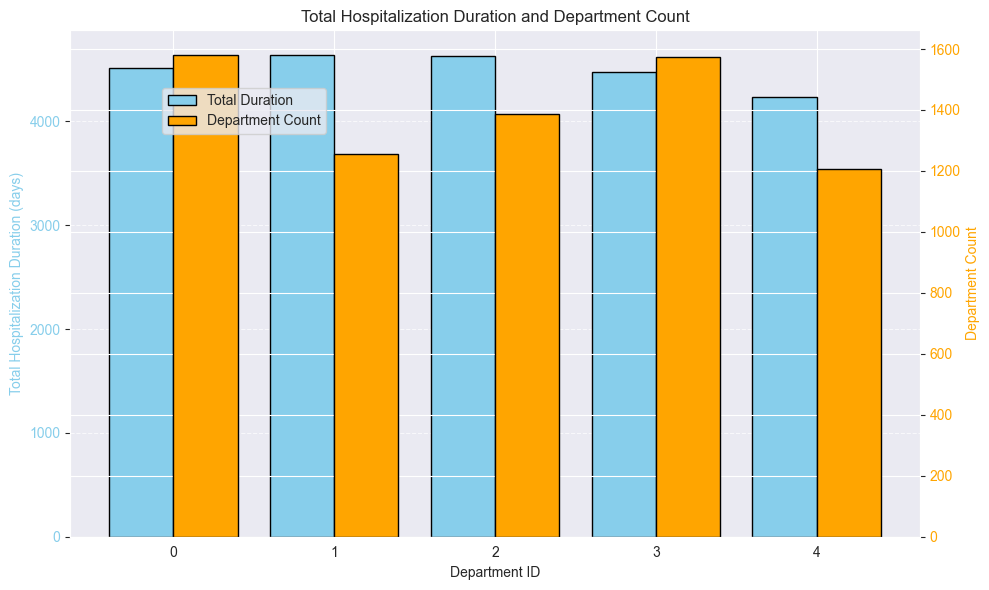

In [30]:
eda.total_hospitalization_duration_and_department_count()

We can see that although there are some differences in department count (number of hospitalizations\patients per department) the differences in total hospitalization duration between the departments is smaller.

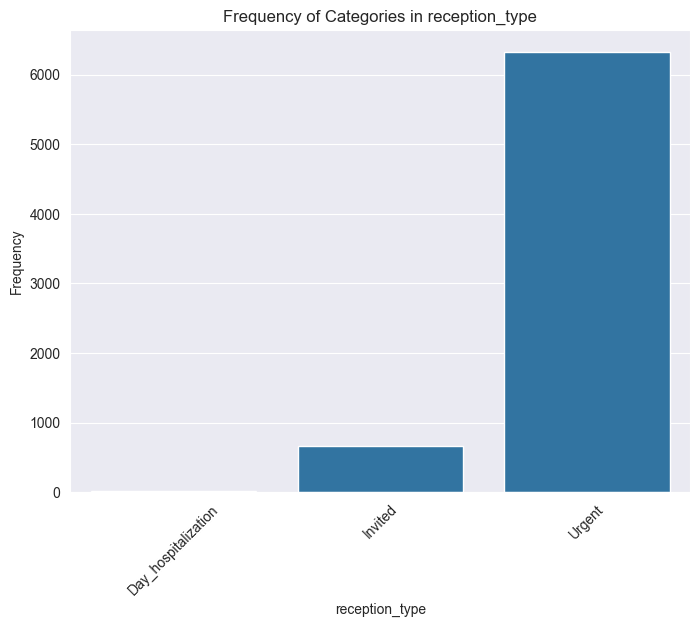

In [31]:
# Plot frequency of a categorical column
eda.plot_categorical_frequency('reception_type')

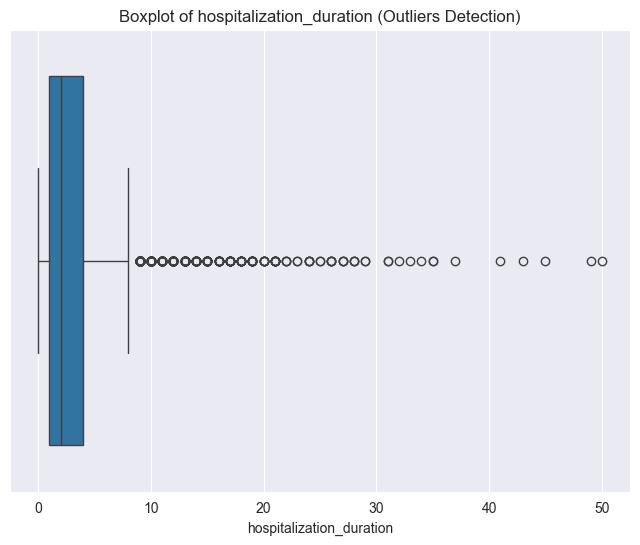

In [32]:
# Cell 6: Detect outliers in a numerical column using a boxplot
eda.detect_outliers('hospitalization_duration')

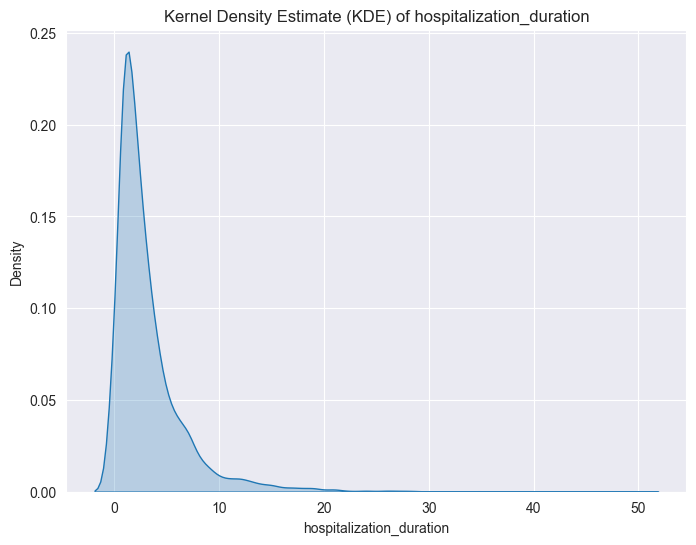

In [33]:
# Plot a Kernel Density Estimate (KDE) for a numerical column
eda.plot_kde_numerical('hospitalization_duration')

When box-plotting or KDE the general hospitalization duration we can see that the majority of hospitalizations are short.

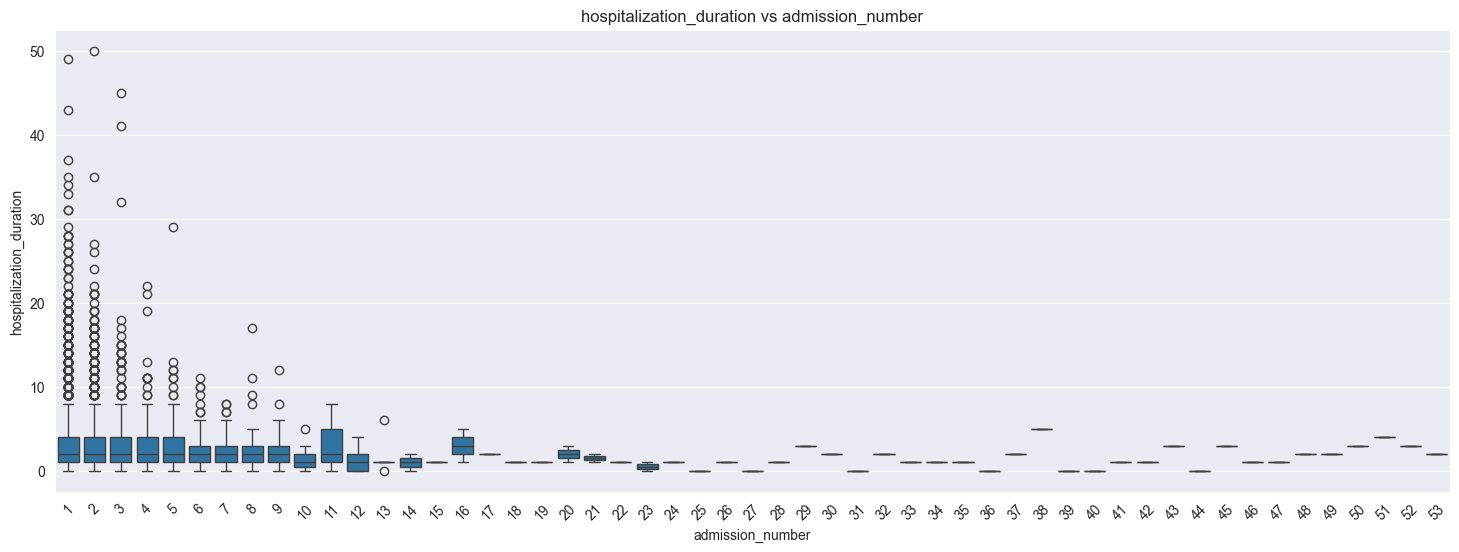

In [34]:
# Visualize the relationship between hospitalization_duration and admission_number
eda.plot_numeric_vs_categorical('hospitalization_duration', 'admission_number')

When box-plotting hospitalization duration with categorical splitting of admission number, we see that up to the 5th hospitalization (admission number) the box plots are the same (with the exception of the outliers). From the 6th hospitalization, as the number of hospitalizations per category gets lower, we see a more sporadic behavior.
The general trend is that as the admission number gets higher the hospitalization duration is shorter.

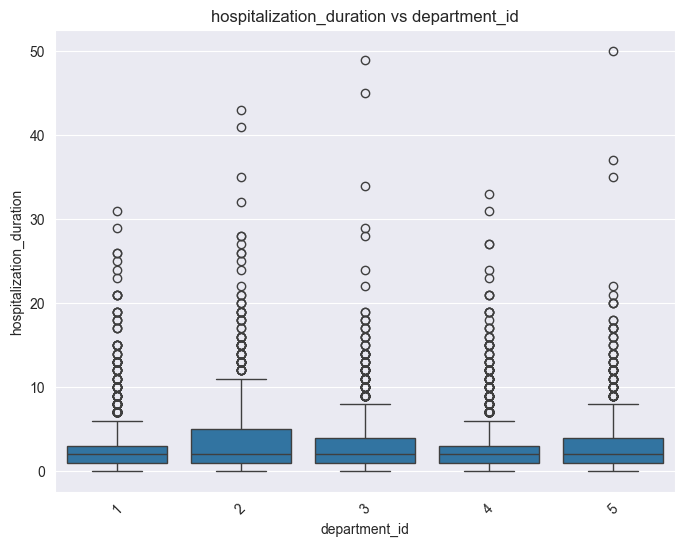

In [35]:
# Visualize the relationship between the hospitalization_duration and department_id
eda.plot_numeric_vs_categorical('hospitalization_duration', 'department_id')

When box-plotting the hospitalization duration against the department id, we see that the mean hospitalization duration for all departments is about the same but department 2 has a higher percentage of long hospitalization durations.

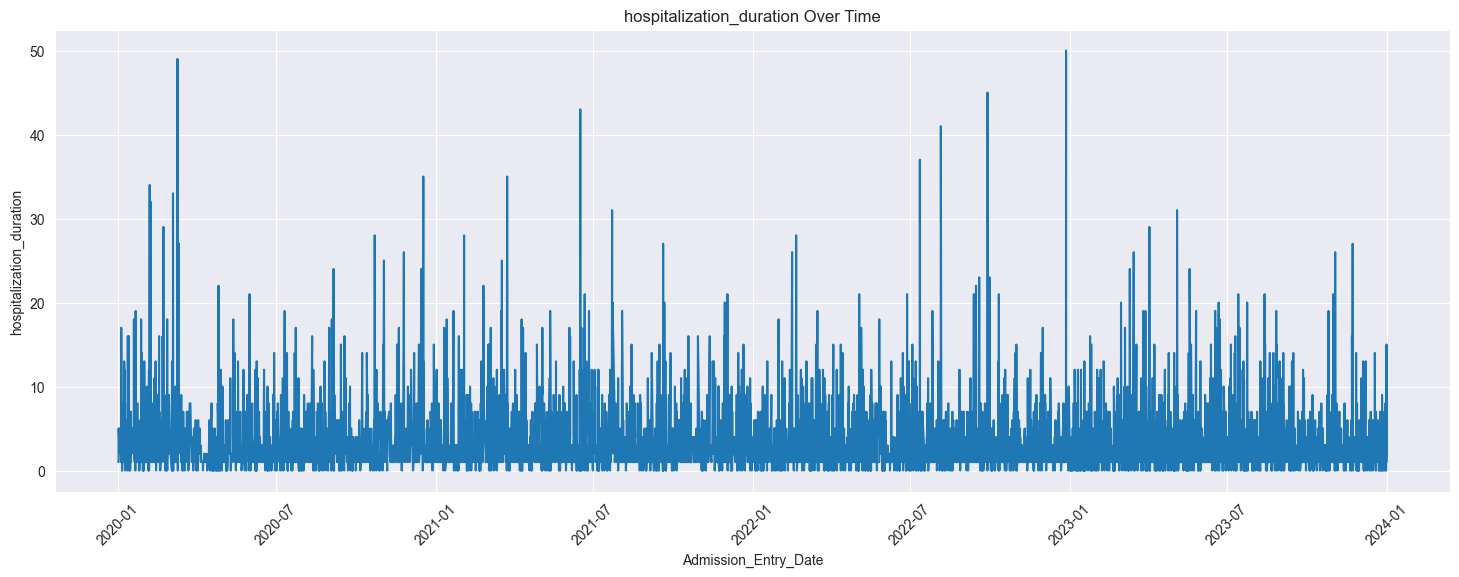

In [36]:
#Plot numerical column over time
eda.plot_numeric_over_time('hospitalization_duration', 'Admission_Entry_Date')

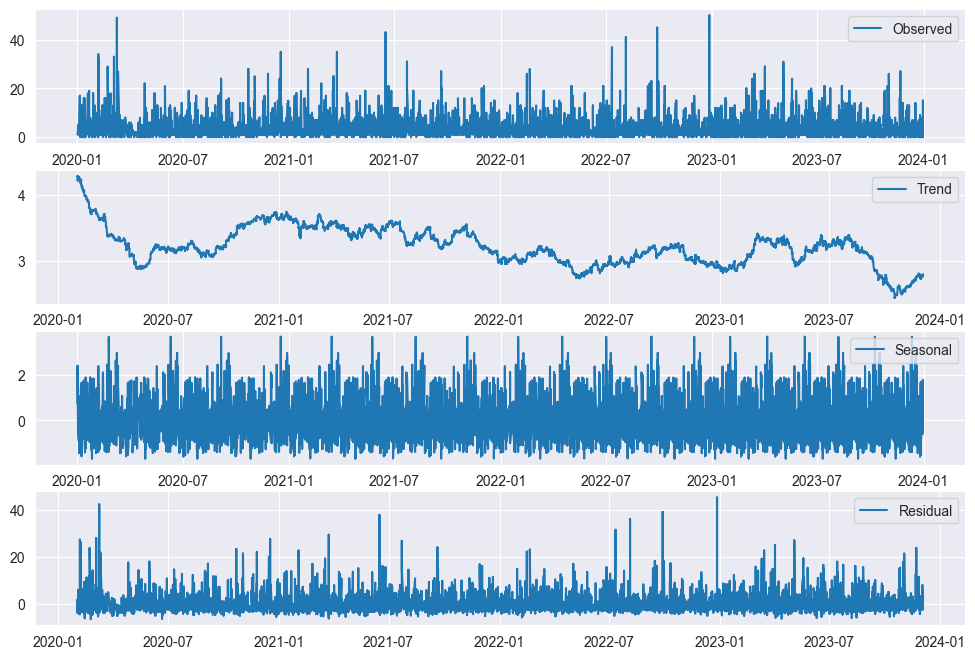

In [37]:
eda.check_seasonality_and_cyclical_patterns()

When performing seasonal decomposition analysis on a seasonal period of 1 year we get a seasonal repetitive pattern that begins by repeating about every 3 months but at the end of the analysis period decreases to about every 2 months. When looking at the trend plot there seems to be a general slight decrease over time.

### Exporting clean data as csv to Data folder

In [38]:
for column in ('admission_diagnoses', 'release_diagnoses'):
    eda.drop_column(column)

Dataframe shape is: (7006, 17)
The column admission_diagnoses was dropped from the dataframe
New dataframe shape is: (7006, 16)


Dataframe shape is: (7006, 16)
The column release_diagnoses was dropped from the dataframe
New dataframe shape is: (7006, 15)




In [39]:
rehospitalization1_csv_filename = os.path.join(src_dir, "data/hospitalization1_extended_eda.csv")
eda.export_to_csv(file_path=rehospitalization1_csv_filename)

Data exported successfully to D:\GitHub\data-science2-lab-final-project\src\data/hospitalization1_extended_eda.csv


# ---------------- END EDA -----------------------------

<br><br>

## TASK 24 

# Correlation between Department occupancy and rehospitalization

In [40]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
department_df = read_excel_sheet(file_absolute_path, "unitsOccupancyRate")

Rename columns hebrew to english

In [41]:
department_df = rename_columns_from_file(department_df, os.path.join(src_dir, "team_1", "translations", "unitsOccupancyRate.json"))

In [42]:
department_df.head()

date  department_id  occupancy_count  occupancy_rate
0 2020-01-01 07:00:00              4               31           0.775
1 2020-01-01 07:00:00              2               30           0.750
2 2020-01-01 07:00:00              5               40           1.000
3 2020-01-01 07:00:00              1               32           0.800
4 2020-01-01 07:00:00              3               37           0.925

In [43]:
department_df.isna().sum()

date               0
department_id      0
occupancy_count    0
occupancy_rate     0
dtype: int64

**No null values in department df**

In [44]:
department_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6736 entries, 0 to 6735
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             6736 non-null   datetime64[ns]
 1   department_id    6736 non-null   int64         
 2   occupancy_count  6736 non-null   int64         
 3   occupancy_rate   6736 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 210.6 KB


In [45]:
hospitalization1 = eda.copy_df()
    # optional, if wanting to read from CSV replace with (pd.read_csv(os.path.join(src_dir, "data/hospitalization1_extended_eda.csv")))

In [46]:
hospitalization1.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
4944      31             4                  4285143 2020-07-26 09:01:59.213   
6842      31             4                  4298122 2020-07-31 03:17:42.087   
6000     116             1                  5069180 2021-07-08 16:33:04.860   
992      122             5                  6384463 2022-12-14 14:58:02.130   
2111     184             2                  6224599 2022-10-11 02:39:07.380   

            Release_Date reception_type patient_origin   Release_Type  \
4944 2020-07-27 18:01:00         Urgent      From_home  Released_home   
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
6000 2021-07-09 15:23:00         Urgent      From_home  Released_home   
992  2022-12-16 16:15:00         Urgent      From_home  Released_home   
2111 2022-10-11 12:39:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration admission_diagnoses_list  \
4944             11460.0                         1                  [42731]   
6842             10779.0                         0                  [42731]   
6000             12427.0                         1             [7862, 7865]   
992              11792.0                         2            [2852, 28731]   
2111             11670.0                         0                   [7865]   

     release_diagnoses_list Admission_Entry_Date_only Release_Date_only  \
4944                [42731]                2020-07-26        2020-07-27   
6842                [42731]                2020-07-31        2020-07-31   
6000           [7862, 7865]                2021-07-08        2021-07-09   
992           [2859, 28731]                2022-12-14        2022-12-16   
2111                 [7865]                2022-10-11        2022-10-11   

      admission_number  
4944                 1  
6842                 2  
6000                 1  
992                  1  
2111                 1

## Append hospitalization status to each patient

This will help us find Patients time in hospitalization, number of repeated hospitalizations etc'

In [47]:
# Process the rehospitalization data
processed_df = process_rehospitalization_data(df=hospitalization1, patient_col='Patient', admission_col='Admission_Entry_Date', release_col='Release_Date')

D:\GitHub\data-science2-lab-final-project\src\team_1\task_24\patient_stas.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration["duration_classification"] = df_duration[duration_col].apply(


In [48]:
processed_df.head(10)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
6842      31             4                  4298122 2020-07-31 03:17:42.087   
1261     184             2                  6245307 2022-10-21 20:40:30.750   
6137     305             1                  3905672 2020-01-16 03:20:07.073   
6958     305             1                  3951517 2020-02-04 14:02:27.643   
928      305             1                  3958841 2020-02-07 15:32:42.737   
5190     367             2                  7302549 2023-12-19 15:11:41.930   
4457     396             3                  7065031 2023-09-10 17:14:56.510   
1785     594             5                  6789486 2023-05-28 23:58:44.403   
2577     594             5                  6859147 2023-06-15 19:57:04.973   
1841     951             5                  5011100 2021-06-16 20:07:56.080   

            Release_Date reception_type patient_origin   Release_Type  \
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1261 2022-10-23 15:50:00         Urgent      From_home  Released_home   
6137 2020-01-23 13:59:00         Urgent      From_home  Released_home   
6958 2020-02-05 14:06:00         Urgent      From_home  Released_home   
928  2020-02-11 15:14:00         Urgent      From_home  Released_home   
5190 2023-12-25 14:28:00         Urgent      From_home  Released_home   
4457 2023-09-11 16:04:00         Urgent      From_home  Released_home   
1785 2023-05-31 17:17:00        Invited      From_home  Released_home   
2577 2023-06-18 15:48:00        Invited      From_home  Released_home   
1841 2021-06-17 16:35:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration admission_diagnoses_list  \
6842             10779.0                         0                  [42731]   
1261             11515.0                         2                   [7865]   
6137              6892.0                         7           [78060, 78609]   
6958             10762.0                         1                  [78609]   
928               7993.0                         4                  [78609]   
5190             11233.0                         6    [2859, 41090, Z44422]   
4457             12914.0                         1                    [514]   
1785             12354.0                         3             [4241, 5184]   
2577             11810.0                         3                  [O8889]   
1841             11767.0                         1                   [7823]   

          release_diagnoses_list Admission_Entry_Date_only Release_Date_only  \
6842                     [42731]                2020-07-31        2020-07-31   
1261                      [7865]                2022-10-21        2022-10-23   
6137                     [78609]                2020-01-16        2020-01-23   
6958                     [78609]                2020-02-04        2020-02-05   
928                      [78609]                2020-02-07        2020-02-11   
5190  [2859, 410, 41090, Z44422]                2023-12-19        2023-12-25   
4457                       [514]                2023-09-10        2023-09-11   
1785                      [5184]                2023-05-28        2023-05-31   
2577                [514, Z3522]                2023-06-15        2023-06-18   
1841                      [7823]                2021-06-16        2021-06-17   

      admission_number  hospitalization_count    previous_release  \
6842                 2                      2 2020-07-27 18:01:00   
1261                 2                      2 2022-10-11 12:39:00   
6137                 2                      4 2020-01-06 14:57:00   
6958                 3                      4 2020-01-23 13:59:00   
928                  4                      4 2020-02-05 14:06:00   
5190                 2                      2 2023-11-06 14:30:00   
4457                 2                      2 2021-03-24 16:56:00   
1785                 2      

In [49]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503 entries, 6842 to 2302
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Patient                            2503 non-null   category      
 1   department_id                      2503 non-null   category      
 2   Admission_Medical_Record           2503 non-null   category      
 3   Admission_Entry_Date               2503 non-null   datetime64[ns]
 4   Release_Date                       2503 non-null   datetime64[ns]
 5   reception_type                     2503 non-null   category      
 6   patient_origin                     2503 non-null   category      
 7   Release_Type                       2503 non-null   category      
 8   release_doctor_code                2503 non-null   category      
 9   hospitalization_duration           2503 non-null   int64         
 10  admission_diagnoses_list         

In [50]:
processed_df['duration_classification'].value_counts()

short     871
long      849
medium    783
Name: duration_classification, dtype: int64

In [51]:
processed_df.groupby('duration_between_hospitalizations')['duration_classification'].unique()

duration_between_hospitalizations
0.0        [short]
1.0        [short]
2.0        [short]
3.0        [short]
4.0        [short]
5.0        [short]
6.0        [short]
7.0        [short]
8.0        [short]
9.0       [medium]
10.0      [medium]
11.0      [medium]
12.0      [medium]
13.0      [medium]
14.0      [medium]
15.0      [medium]
16.0      [medium]
17.0      [medium]
18.0      [medium]
19.0      [medium]
20.0      [medium]
21.0      [medium]
22.0      [medium]
23.0      [medium]
24.0      [medium]
25.0        [long]
26.0        [long]
27.0        [long]
28.0        [long]
29.0        [long]
30.0        [long]
31.0        [long]
32.0        [long]
33.0        [long]
34.0        [long]
35.0        [long]
36.0        [long]
37.0        [long]
38.0        [long]
39.0        [long]
40.0        [long]
41.0        [long]
42.0        [long]
43.0        [long]
44.0        [long]
45.0        [long]
46.0        [long]
47.0        [long]
48.0        [long]
49.0        [long]
50.0        [lon

**normalize date columns**

In [52]:
for date_col in ['Admission_Entry_Date', 'Release_Date']:
    processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)

department_df['date'] = normalize_date_column(department_df, column_name='date')

C:\Users\shany\AppData\Local\Temp\ipykernel_23780\1432123683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)
C:\Users\shany\AppData\Local\Temp\ipykernel_23780\1432123683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df[date_col] = normalize_date_column(processed_df, column_name=date_col)


# Left join Dataframes on department and date

In [53]:
# Assuming 'patient_id' is the common key
left_table_columns = ['department_id', 'Admission_Entry_Date']
right_table_columns = ['department_id', 'date']
df_combined_24 = merge_dataframes_left_join(processed_df, department_df, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [54]:
df_combined_24.head()

Patient  department_id Admission_Medical_Record Admission_Entry_Date  \
0      31              4                  4298122           2020-07-31   
1     184              2                  6245307           2022-10-21   
2     305              1                  3905672           2020-01-16   
3     305              1                  3951517           2020-02-04   
4     305              1                  3958841           2020-02-07   

  Release_Date reception_type patient_origin   Release_Type  \
0   2020-07-31         Urgent      From_home  Released_home   
1   2022-10-23         Urgent      From_home  Released_home   
2   2020-01-23         Urgent      From_home  Released_home   
3   2020-02-05         Urgent      From_home  Released_home   
4   2020-02-11         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...  \
0             10779.0                         0  ...   
1             11515.0                         2  ...   
2              6892.0                         7  ...   
3             10762.0                         1  ...   
4              7993.0                         4  ...   

  Admission_Entry_Date_only Release_Date_only admission_number  \
0                2020-07-31        2020-07-31                2   
1                2022-10-21        2022-10-23                2   
2                2020-01-16        2020-01-23                2   
3                2020-02-04        2020-02-05                3   
4                2020-02-07        2020-02-11                4   

  hospitalization_count    previous_release  \
0                     2 2020-07-27 18:01:00   
1                     2 2022-10-11 12:39:00   
2                     4 2020-01-06 14:57:00   
3                     4 2020-01-23 13:59:00   
4                     4 2020-02-05 14:06:00   

   duration_between_hospitalizations duration_classification        date  \
0                                3.0                   short  2020-07-31   
1                               10.0                  medium  2022-10-21   
2                                9.0                  medium  2020-01-16   
3                               12.0                  medium  2020-02-04   
4                                2.0                   short  2020-02-07   

  occupancy_count occupancy_rate  
0            30.0          0.750  
1            31.0          0.775  
2            37.0          0.925  
3            40.0          1.000  
4            27.0          0.675  

[5 rows x 22 columns]

## Correlation Rehospitalization - Department

Now we have all the data

### Per department Analysis

Department 4 correlation between occupancy rate and hospitalization_duration: -0.03587974219916187


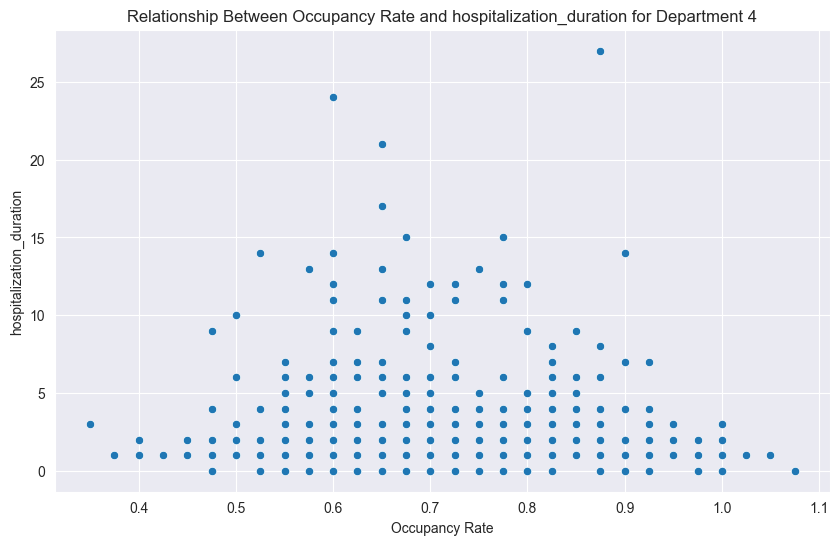

Department 2 correlation between occupancy rate and hospitalization_duration: -0.030866848552557658


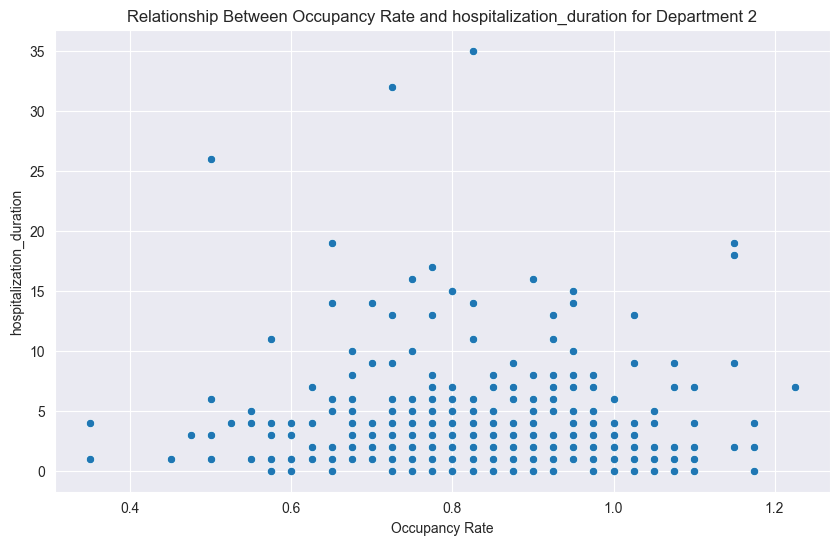

Department 1 correlation between occupancy rate and hospitalization_duration: 0.019184962201700472


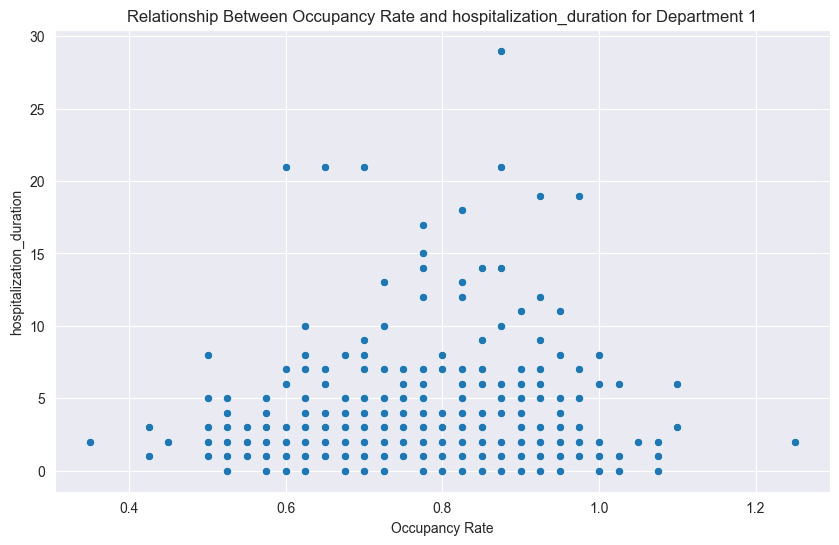

Department 3 correlation between occupancy rate and hospitalization_duration: -0.00029471869175828793


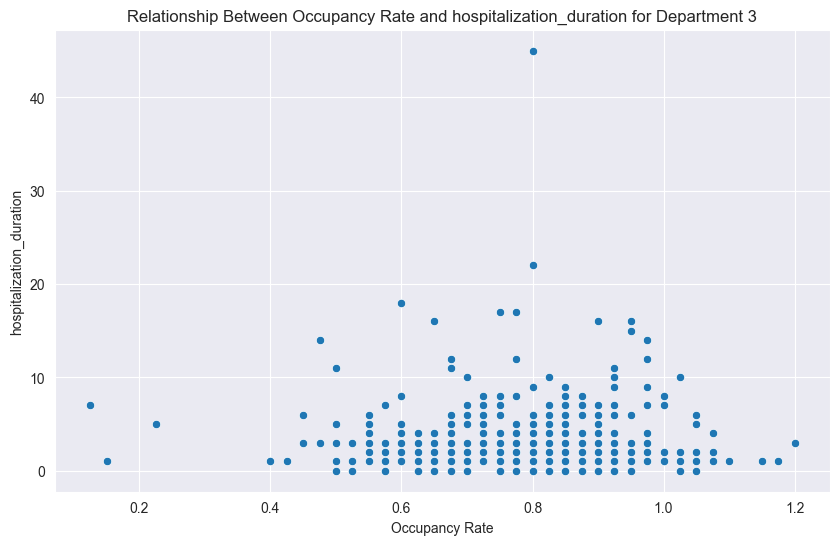

Department 5 correlation between occupancy rate and hospitalization_duration: -0.009475527118729947


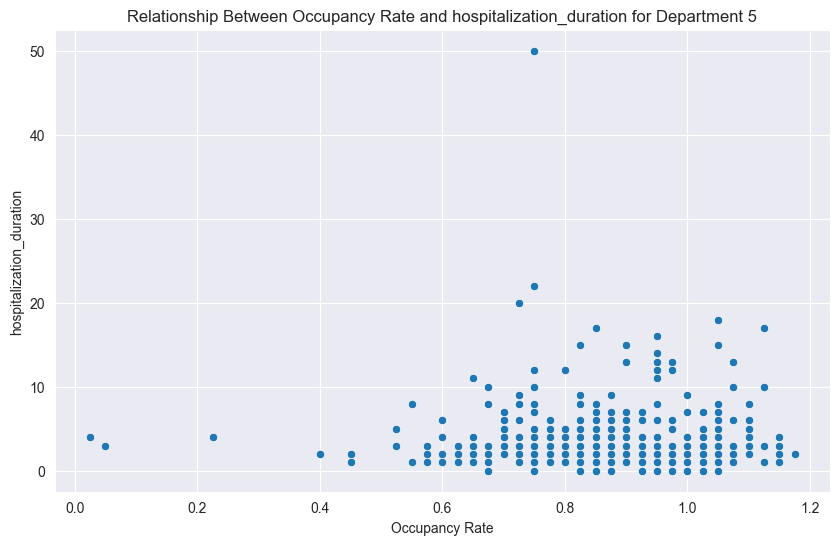

In [55]:
department_correlations = {}

for dept in df_combined_24['department_id'].unique():
    dept_data = df_combined_24[df_combined_24['department_id'] == dept]
    correlation = dept_data['occupancy_rate'].corr(dept_data['hospitalization_duration'])
    department_correlations[dept] = correlation
    print(f"Department {dept} correlation between occupancy rate and hospitalization_duration: {correlation}")

    # Visualize the relationship for this department
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='occupancy_rate', y='hospitalization_duration', data=dept_data)
    plt.title(f'Relationship Between Occupancy Rate and hospitalization_duration for Department {dept}')
    plt.xlabel('Occupancy Rate')
    plt.ylabel('hospitalization_duration')
    plt.show()

# Classifier for rehospitalization based on department occupancy

In [56]:
# remove nan rows
df_combined_24_classifier = df_combined_24.dropna()
df_combined_24_classifier.head(2)

Patient  department_id Admission_Medical_Record Admission_Entry_Date  \
0      31              4                  4298122           2020-07-31   
1     184              2                  6245307           2022-10-21   

  Release_Date reception_type patient_origin   Release_Type  \
0   2020-07-31         Urgent      From_home  Released_home   
1   2022-10-23         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...  \
0             10779.0                         0  ...   
1             11515.0                         2  ...   

  Admission_Entry_Date_only Release_Date_only admission_number  \
0                2020-07-31        2020-07-31                2   
1                2022-10-21        2022-10-23                2   

  hospitalization_count    previous_release  \
0                     2 2020-07-27 18:01:00   
1                     2 2022-10-11 12:39:00   

   duration_between_hospitalizations duration_classification        date  \
0                                3.0                   short  2020-07-31   
1                               10.0                  medium  2022-10-21   

  occupancy_count occupancy_rate  
0            30.0          0.750  
1            31.0          0.775  

[2 rows x 22 columns]

In [57]:
# Assuming df is your pandas DataFrame that contains features and a target column
# Example features: ['age', 'gender_encoded', 'hospitalization_count']
# Example target: 'duration_classification'
task_24_features = ['occupancy_rate', 'hospitalization_duration'] 

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=df_combined_24_classifier,
    features=task_24_features,
    target='duration_classification',
)

In [58]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.1013
Epoch [20/5000], Loss: 1.0975
Epoch [30/5000], Loss: 1.0960
Epoch [40/5000], Loss: 1.0949
Epoch [50/5000], Loss: 1.0945
Epoch [60/5000], Loss: 1.0943
Epoch [70/5000], Loss: 1.0941
Epoch [80/5000], Loss: 1.0938
Epoch [90/5000], Loss: 1.0937
Epoch [100/5000], Loss: 1.0935
Epoch [110/5000], Loss: 1.0933
Epoch [120/5000], Loss: 1.0931
Epoch [130/5000], Loss: 1.0926
Epoch [140/5000], Loss: 1.0921
Epoch [150/5000], Loss: 1.0917
Epoch [160/5000], Loss: 1.0914
Epoch [170/5000], Loss: 1.0912
Epoch [180/5000], Loss: 1.0910
Epoch [190/5000], Loss: 1.0908
Epoch [200/5000], Loss: 1.0906
Epoch [210/5000], Loss: 1.0905
Epoch [220/5000], Loss: 1.0903
Epoch [230/5000], Loss: 1.0901
Epoch [240/5000], Loss: 1.0900
Epoch [250/5000], Loss: 1.0898
Epoch [260/5000], Loss: 1.0897
Epoch [270/5000], Loss: 1.0895
Epoch [280/5000], Loss: 1.0893
Epoch [290/5000], Loss: 1.0892
Epoch [300/5000], Loss: 1.0890
Epoch [310/5000], Loss: 1.0888
Epoch [320/5000], Loss: 1.0886
Epoch [330/5000],

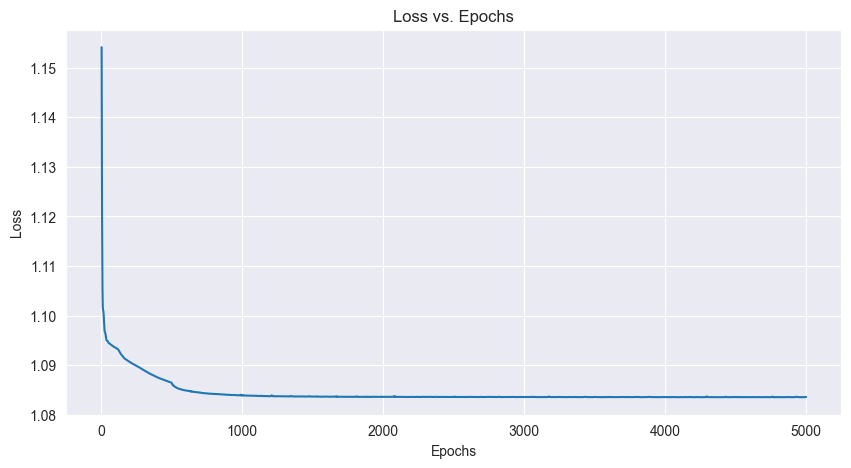

In [59]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [60]:
# Evaluate the model
pipeline.evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.35      0.36      0.36       258
           1       0.31      0.23      0.26       241
           2       0.34      0.43      0.38       251

    accuracy                           0.34       750
   macro avg       0.34      0.34      0.33       750
weighted avg       0.34      0.34      0.33       750



### Model result Visuals

In [61]:
class_names = ['Short', 'Medium', 'Long']

# Create the visualization object
vis = ClassificationVisualization()


In [62]:
# Assuming y_test and y_pred are already computed
model.model.eval()
with torch.no_grad():
    outputs = model.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


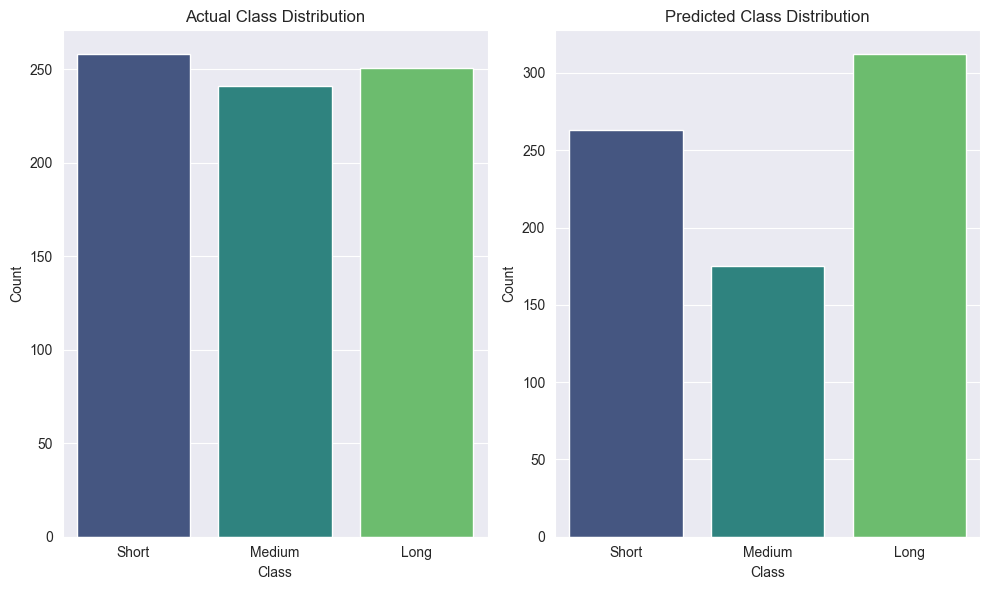

In [63]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names)

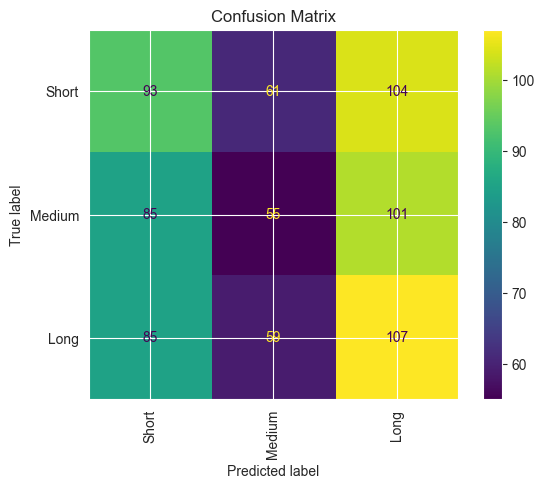

In [64]:
# Plot confusion matrix
vis.plot_confusion_matrix(y_test, y_pred, class_names)

### Running the model with the occupancy_rate feature only

In [65]:
# Assuming df is your pandas DataFrame that contains features and a target column
# Example features: ['age', 'gender_encoded', 'hospitalization_count']
# Example target: 'duration_classification'
task_24_features = ['occupancy_rate'] 

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=df_combined_24_classifier,
    features=task_24_features,
    target='duration_classification',
)

In [66]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.0979
Epoch [20/5000], Loss: 1.0972
Epoch [30/5000], Loss: 1.0962
Epoch [40/5000], Loss: 1.0960
Epoch [50/5000], Loss: 1.0957
Epoch [60/5000], Loss: 1.0955
Epoch [70/5000], Loss: 1.0953
Epoch [80/5000], Loss: 1.0951
Epoch [90/5000], Loss: 1.0950
Epoch [100/5000], Loss: 1.0948
Epoch [110/5000], Loss: 1.0946
Epoch [120/5000], Loss: 1.0944
Epoch [130/5000], Loss: 1.0942
Epoch [140/5000], Loss: 1.0940
Epoch [150/5000], Loss: 1.0939
Epoch [160/5000], Loss: 1.0937
Epoch [170/5000], Loss: 1.0936
Epoch [180/5000], Loss: 1.0935
Epoch [190/5000], Loss: 1.0934
Epoch [200/5000], Loss: 1.0933
Epoch [210/5000], Loss: 1.0932
Epoch [220/5000], Loss: 1.0931
Epoch [230/5000], Loss: 1.0930
Epoch [240/5000], Loss: 1.0930
Epoch [250/5000], Loss: 1.0929
Epoch [260/5000], Loss: 1.0929
Epoch [270/5000], Loss: 1.0929
Epoch [280/5000], Loss: 1.0928
Epoch [290/5000], Loss: 1.0928
Epoch [300/5000], Loss: 1.0927
Epoch [310/5000], Loss: 1.0927
Epoch [320/5000], Loss: 1.0926
Epoch [330/5000],

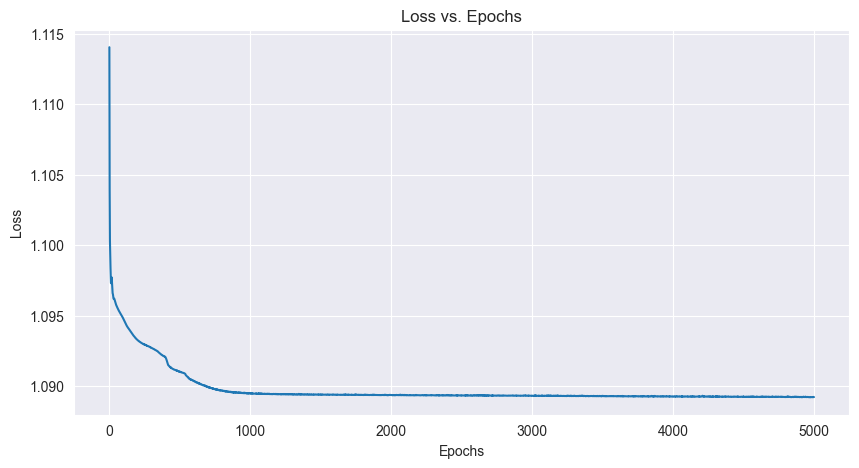

In [67]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_occ_only = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [68]:
# Evaluate the model
pipeline.evaluate_model(model_occ_only, X_test, y_test)

              precision    recall  f1-score   support

           0       0.36      0.34      0.35       258
           1       0.36      0.12      0.18       241
           2       0.35      0.59      0.44       251

    accuracy                           0.35       750
   macro avg       0.36      0.35      0.32       750
weighted avg       0.36      0.35      0.33       750



### Model result Visuals

In [69]:
class_names = ['Short', 'Medium', 'Long']

# Create the visualization object
vis = ClassificationVisualization()


In [70]:
# Assuming y_test and y_pred are already computed
model_occ_only.model.eval()
with torch.no_grad():
    outputs = model_occ_only.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


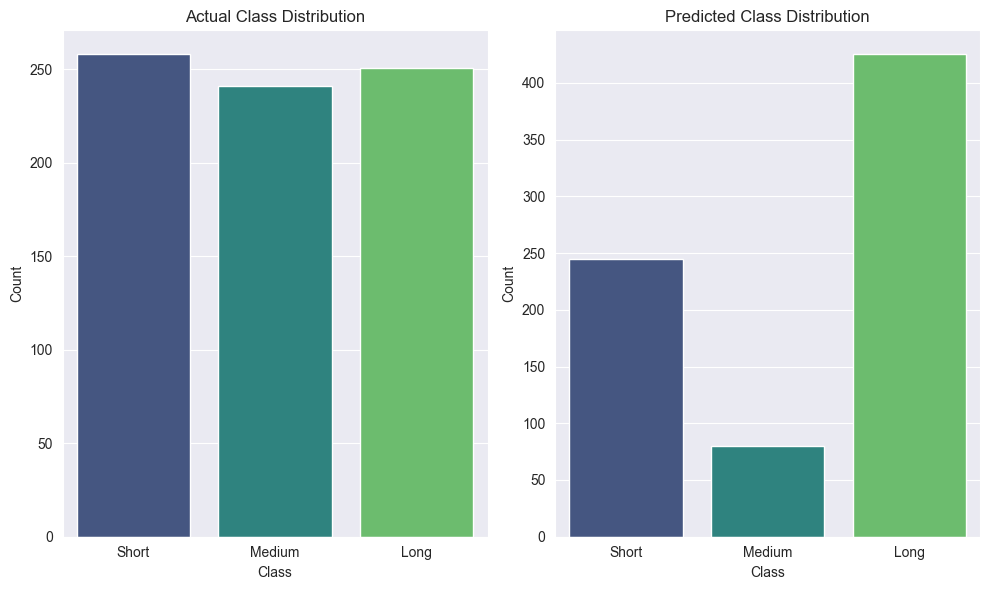

In [71]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names)

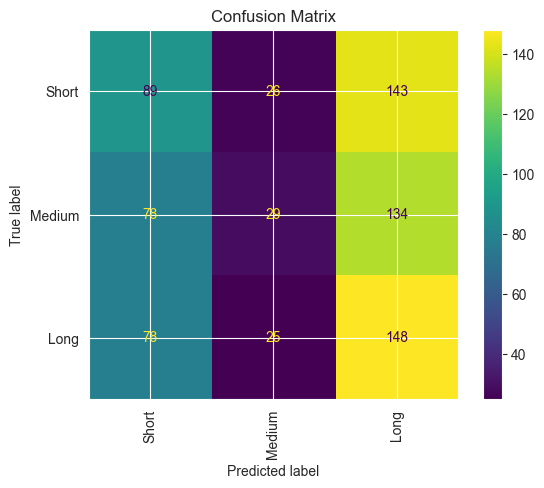

In [72]:
# Plot confusion matrix
vis.plot_confusion_matrix(y_test, y_pred, class_names)

# -------------- END Task 24 - department to rehospital Model -------------------------------

<br><br><br>

# Task 26 Age & Gender to hospitalization model

In [81]:
# Construct the full path to the file
file_absolute_path = os.path.join(src_dir, "data/rehospitalization.xlsx")
general_data = read_excel_sheet(file_absolute_path, "GeneralData")

In [82]:
general_data_eda = ExtendedEDA(general_data, translation_file=os.path.join(src_dir, "team_1", "translations", "GeneralData.json"))

In [83]:
general_data_eda.check_missing_values()

Missing Values in Each Column:


income_source           11
weight                 817
height                 837
BMI                   1031
education             1894
number_of_children     162
marital_status          61
medications             40
dtype: int64

In [84]:
general_data_eda.show_info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient                  4535 non-null   int64  
 1   age                      4535 non-null   int64  
 2   Gender                   4535 non-null   object 
 3   income_source            4524 non-null   object 
 4   weight                   3718 non-null   float64
 5   height                   3698 non-null   float64
 6   BMI                      3504 non-null   float64
 7   Chronological_illnesses  4535 non-null   int64  
 8   education                2641 non-null   object 
 9   number_of_children       4373 non-null   object 
 10  marital_status           4474 non-null   object 
 11  medications              4495 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 425.3+ KB


None

**fill missing values for general data**

In [85]:
general_data_eda.fix_height_weight()

Fill weight null to mean of same age:78 and gender: נקבה: 71.8
Fill height null to mean of same age:78 and gender: נקבה: 157.9
Fill weight null to mean of same age:74 and gender: נקבה: 69.1
Fill height null to mean of same age:74 and gender: נקבה: 161.4
Fill weight null to mean of same age:83 and gender: נקבה: 66.1
Fill height null to mean of same age:83 and gender: נקבה: 160.0
Fill height null to mean of same age:92 and gender: נקבה: 158.2
Fill weight null to mean of same age:77 and gender: זכר: 81.2
Fill height null to mean of same age:77 and gender: זכר: 170.3
Fill weight null to mean of same age:89 and gender: זכר: 78.1
Fill height null to mean of same age:89 and gender: זכר: 170.3
Fill weight null to mean of same age:75 and gender: זכר: 80.2
Fill height null to mean of same age:75 and gender: זכר: 171.2
Fill weight null to mean of same age:89 and gender: זכר: 78.1
Fill height null to mean of same age:89 and gender: זכר: 170.3
Fill weight null to mean of same age:96 and gender: זכר

In [86]:
general_data_eda.check_missing_values()

Missing Values in Each Column:


income_source           11
BMI                   1031
education             1894
number_of_children     162
marital_status          61
medications             40
dtype: int64

In [87]:
general_data_eda.fill_bmi()

NaN BMI calculated according to weight and height values to: 28.8
NaN BMI calculated according to weight and height values to: 23.4
NaN BMI calculated according to weight and height values to: 26.5
NaN BMI calculated according to weight and height values to: 25.8
NaN BMI calculated according to weight and height values to: 25.6
NaN BMI calculated according to weight and height values to: 28.0
NaN BMI calculated according to weight and height values to: 22.7
NaN BMI calculated according to weight and height values to: 26.9
NaN BMI calculated according to weight and height values to: 27.4
NaN BMI calculated according to weight and height values to: 26.9
NaN BMI calculated according to weight and height values to: 25.7
NaN BMI calculated according to weight and height values to: 28.1
NaN BMI calculated according to weight and height values to: 25.8
NaN BMI calculated according to weight and height values to: 24.2
NaN BMI calculated according to weight and height values to: 25.7
NaN BMI ca

In [88]:
general_data_eda.check_missing_values()

Missing Values in Each Column:


income_source           11
education             1894
number_of_children     162
marital_status          61
medications             40
dtype: int64

In [89]:
for col in ['education','income_source','number_of_children','marital_status']:
    general_data_eda.fix_nans_by_common_age_and_gender(col)

education null replaced with:
פנסיונרית
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונר
education null replaced with:
פנסיונר
education null replaced with:
פנסיונר
education null replaced with:
פנסיונר
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with:
פנסיונרית
education null replaced with:
פנסיונר
education null replaced with

In [91]:
general_data_eda.fix_medications_nans()

medications null replaced with:
[1183, 630, 6737] from ages: 70, 71, 72 and from gender: נקבה
medications null replaced with:
[1183, 2188, 2791] from ages: 81, 82, 83 and from gender: זכר
medications null replaced with:
[1183, 2188, 2624] from ages: 80, 81, 82 and from gender: זכר
medications null replaced with:
[1183, 630, 2188] from ages: 69, 70, 71 and from gender: נקבה
medications null replaced with:
[1183, 2188, 2624] from ages: 75, 76, 77 and from gender: זכר
medications null replaced with:
[1183, 1443, 2791] from ages: 94, 95, 96 and from gender: נקבה
medications null replaced with:
[1183, 2188, 6737] from ages: 74, 75, 76 and from gender: זכר
medications null replaced with:
[1183, 630, 2188] from ages: 79, 80, 81 and from gender: נקבה
medications null replaced with:
[1183, 2188, 2624] from ages: 76, 77, 78 and from gender: זכר
medications null replaced with:
[1183, 630, 2188] from ages: 83, 84, 85 and from gender: נקבה
medications null replaced with:
[2188, 2624, 6737] from age

In [92]:
general_data_eda.check_missing_values()

No missing values have been found.


In [93]:
clean_general_data = general_data_eda.df

In [94]:
clean_general_data.head(2)

Patient  age Gender      income_source  weight  height   BMI  \
0  1043772   84    זכר              כללית    92.0   170.0  34.2   
1    77493   89   נקבה  ‎ממון עצמי-לא מב‎    45.0   150.0  21.4   

   Chronological_illnesses  education number_of_children marital_status  \
0                        1        ללא                  3           נשוי   
1                        0  פנסיונרית                  1           גרוש   

                                         medications  
0   10815 , 11282 , 1183 , 1196 , 12758 , 13027 ,...  
1   10337 , 1130 , 1448 , 1466 , 186 , 2482 , 290...

In [95]:
hospitalization1 = eda.copy_df()
# optional in the case the df is to be loaded from file: hospitalization1 = pd.read_csv(os.path.join(src_dir, "data/hospitalization1_extended_eda.csv")))

In [96]:
# Add duration classification
processed_df = process_rehospitalization_data(df=hospitalization1, patient_col='Patient', admission_col='Admission_Entry_Date', release_col='Release_Date')

D:\GitHub\data-science2-lab-final-project\src\team_1\task_24\patient_stas.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duration["duration_classification"] = df_duration[duration_col].apply(


In [97]:
processed_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
6842      31             4                  4298122 2020-07-31 03:17:42.087   
1261     184             2                  6245307 2022-10-21 20:40:30.750   
6137     305             1                  3905672 2020-01-16 03:20:07.073   
6958     305             1                  3951517 2020-02-04 14:02:27.643   
928      305             1                  3958841 2020-02-07 15:32:42.737   

            Release_Date reception_type patient_origin   Release_Type  \
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1261 2022-10-23 15:50:00         Urgent      From_home  Released_home   
6137 2020-01-23 13:59:00         Urgent      From_home  Released_home   
6958 2020-02-05 14:06:00         Urgent      From_home  Released_home   
928  2020-02-11 15:14:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration admission_diagnoses_list  \
6842             10779.0                         0                  [42731]   
1261             11515.0                         2                   [7865]   
6137              6892.0                         7           [78060, 78609]   
6958             10762.0                         1                  [78609]   
928               7993.0                         4                  [78609]   

     release_diagnoses_list Admission_Entry_Date_only Release_Date_only  \
6842                [42731]                2020-07-31        2020-07-31   
1261                 [7865]                2022-10-21        2022-10-23   
6137                [78609]                2020-01-16        2020-01-23   
6958                [78609]                2020-02-04        2020-02-05   
928                 [78609]                2020-02-07        2020-02-11   

      admission_number  hospitalization_count    previous_release  \
6842                 2                      2 2020-07-27 18:01:00   
1261                 2                      2 2022-10-11 12:39:00   
6137                 2                      4 2020-01-06 14:57:00   
6958                 3                      4 2020-01-23 13:59:00   
928                  4                      4 2020-02-05 14:06:00   

      duration_between_hospitalizations duration_classification  
6842                                3.0                   short  
1261                               10.0                  medium  
6137                                9.0                  medium  
6958                               12.0                  medium  
928                                 2.0                   short

In [98]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503 entries, 6842 to 2302
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Patient                            2503 non-null   category      
 1   department_id                      2503 non-null   category      
 2   Admission_Medical_Record           2503 non-null   category      
 3   Admission_Entry_Date               2503 non-null   datetime64[ns]
 4   Release_Date                       2503 non-null   datetime64[ns]
 5   reception_type                     2503 non-null   category      
 6   patient_origin                     2503 non-null   category      
 7   Release_Type                       2503 non-null   category      
 8   release_doctor_code                2503 non-null   category      
 9   hospitalization_duration           2503 non-null   int64         
 10  admission_diagnoses_list         

**merge on patient**

In [99]:
# Assuming 'patient_id' is the common key
left_table_columns = ['Patient']
right_table_columns = ['Patient']
df_combined_26 = merge_dataframes_left_join(processed_df, clean_general_data, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [100]:
df_combined_26.head(2)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... Gender income_source  \
0             10779.0                         0  ...   נקבה          מכבי   
1             11515.0                         2  ...    זכר         כללית   

  weight height   BMI  Chronological_illnesses education  number_of_children  \
0   58.0  160.0  23.4                        0  לא עובדת                   1   
1   78.0  167.0  28.0                        0   פנסיונר                   1   

  marital_status                                        medications  
0           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...  
1           נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...  

[2 rows x 30 columns]

In [101]:
df_combined_26.isna().sum()

Patient                              0
department_id                        0
Admission_Medical_Record             0
Admission_Entry_Date                 0
Release_Date                         0
reception_type                       0
patient_origin                       0
Release_Type                         0
release_doctor_code                  0
hospitalization_duration             0
admission_diagnoses_list             0
release_diagnoses_list               0
Admission_Entry_Date_only            0
Release_Date_only                    0
admission_number                     0
hospitalization_count                0
previous_release                     0
duration_between_hospitalizations    0
duration_classification              0
age                                  0
Gender                               0
income_source                        0
weight                               0
height                               0
BMI                                  0
Chronological_illnesses  

In [70]:
df_combined_26['age'].describe()

count    2503.000000
mean       79.199361
std         8.536224
min        65.000000
25%        72.000000
50%        79.000000
75%        85.000000
max       111.000000
Name: age, dtype: float64

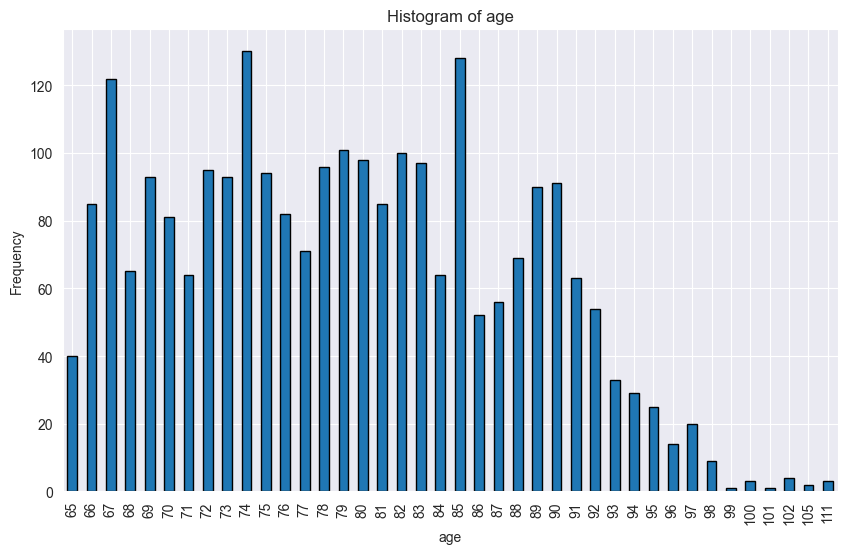

In [104]:
def histogram_column(df, column, category_order=None):
    plt.figure(figsize=(10, 6))
    # Check if a specific category order is provided
    if category_order:
        df[column] = pd.Categorical(df[column], categories=category_order, ordered=True)
    
    df[column].value_counts().sort_index().plot(kind='bar', edgecolor="black")
    
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

histogram_column(df_combined_26, 'age')

In [102]:
# Step 1: Define the bins and bin the age column, save the bin ranges to a variable
age_bins = [65, 70, 75, 80, 85, 90, 95, 120]
age_labels = ['65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
df_combined_26['age_binned'] = pd.cut(df_combined_26['age'], bins=age_bins, labels=age_labels, right=False)

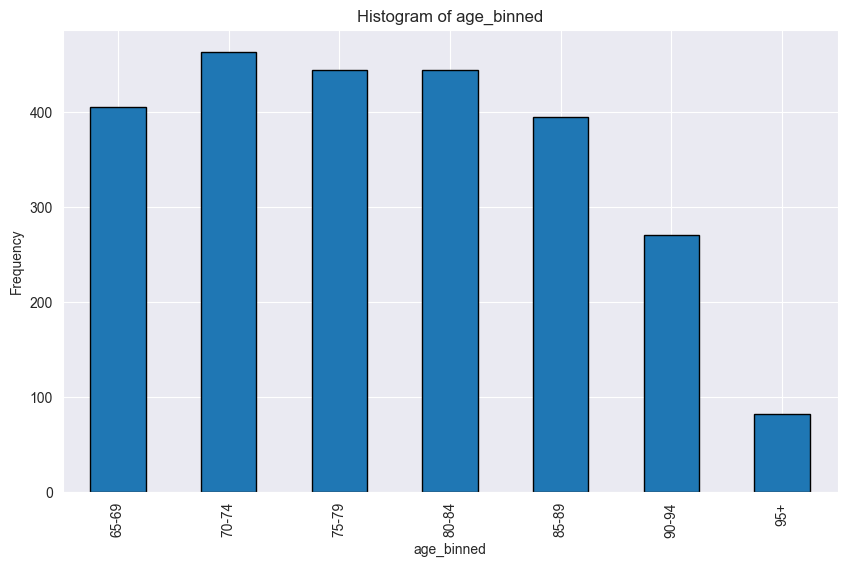

In [105]:
histogram_column(df_combined_26, 'age_binned', age_labels)

In [106]:
df_combined_26.head(10)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   
2      305             1                  3905672 2020-01-16 03:20:07.073   
3      305             1                  3951517 2020-02-04 14:02:27.643   
4      305             1                  3958841 2020-02-07 15:32:42.737   
5      367             2                  7302549 2023-12-19 15:11:41.930   
6      396             3                  7065031 2023-09-10 17:14:56.510   
7      594             5                  6789486 2023-05-28 23:58:44.403   
8      594             5                  6859147 2023-06-15 19:57:04.973   
9      951             5                  5011100 2021-06-16 20:07:56.080   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2 2020-01-23 13:59:00         Urgent      From_home  Released_home   
3 2020-02-05 14:06:00         Urgent      From_home  Released_home   
4 2020-02-11 15:14:00         Urgent      From_home  Released_home   
5 2023-12-25 14:28:00         Urgent      From_home  Released_home   
6 2023-09-11 16:04:00         Urgent      From_home  Released_home   
7 2023-05-31 17:17:00        Invited      From_home  Released_home   
8 2023-06-18 15:48:00        Invited      From_home  Released_home   
9 2021-06-17 16:35:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...      income_source  \
0             10779.0                         0  ...               מכבי   
1             11515.0                         2  ...              כללית   
2              6892.0                         7  ...              כללית   
3             10762.0                         1  ...              כללית   
4              7993.0                         4  ...              כללית   
5             11233.0                         6  ...  ‎ממון עצמי-לא מב‎   
6             12914.0                         1  ...              כללית   
7             12354.0                         3  ...              כללית   
8             11810.0                         3  ...              כללית   
9             11767.0                         1  ...  ‎ממון עצמי-לא מב‎   

  weight height   BMI  Chronological_illnesses  education number_of_children  \
0   58.0  160.0  23.4                        0   לא עובדת                  1   
1   78.0  167.0  28.0                        0    פנסיונר                  1   
2   70.0  165.0  26.7                        0  פנסיונרית                  1   
3   70.0  165.0  26.7                        0  פנסיונרית                  1   
4   70.0  165.0  26.7                        0  פנסיונרית                  1   
5   79.5  171.1  27.2                        0     גימלאי                  5   
6   98.0  167.0  38.3                        0    גימלאית                  3   
7   70.0  160.0  27.3                        0   פנסיוניר                  4   
8   70.0  160.0  27.3                        0   פנסיוניר                  4   
9   90.0  175.0  31.2                        0    לא עובד                  6   

   marital_status                                        medications  \
0            אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
1            נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
2            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
3            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
4            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
5            נשוי   11285 , 1183 , 12723 , 1298 , 138 , 1466 , 16...   
6            אלמן   10226 , 10660 , 1183 , 12798 , 140 , 1443 , 1...   
7            נשוי   1183 , 2212 , 2592 , 37 , 41 , 5913 , 6737 , ...   
8            נשוי   1183 , 22

# Task 26.a.1 Relationship between Age & Gender to time between hospitalizations
### Re-hospitalization duration split by tertiaries

## Pre process features

**We will use only relevant features**

In [221]:
categorial_features = ['age_binned', 'Gender']

In [108]:
df_combined_26 = label_encode(df=df_combined_26, columns=categorial_features)

In [228]:
df_combined_26['duration_classification'].value_counts()

short     871
long      849
medium    783
Name: duration_classification, dtype: int64

In [242]:
# set task feature
task_26_features = categorial_features

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=df_combined_26,
    features=task_26_features,
    target='duration_classification',
)

In [243]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.0978
Epoch [20/5000], Loss: 1.0959
Epoch [30/5000], Loss: 1.0948
Epoch [40/5000], Loss: 1.0941
Epoch [50/5000], Loss: 1.0936
Epoch [60/5000], Loss: 1.0932
Epoch [70/5000], Loss: 1.0929
Epoch [80/5000], Loss: 1.0928
Epoch [90/5000], Loss: 1.0927
Epoch [100/5000], Loss: 1.0926
Epoch [110/5000], Loss: 1.0925
Epoch [120/5000], Loss: 1.0924
Epoch [130/5000], Loss: 1.0923
Epoch [140/5000], Loss: 1.0922
Epoch [150/5000], Loss: 1.0921
Epoch [160/5000], Loss: 1.0921
Epoch [170/5000], Loss: 1.0919
Epoch [180/5000], Loss: 1.0918
Epoch [190/5000], Loss: 1.0917
Epoch [200/5000], Loss: 1.0916
Epoch [210/5000], Loss: 1.0916
Epoch [220/5000], Loss: 1.0915
Epoch [230/5000], Loss: 1.0915
Epoch [240/5000], Loss: 1.0915
Epoch [250/5000], Loss: 1.0915
Epoch [260/5000], Loss: 1.0915
Epoch [270/5000], Loss: 1.0915
Epoch [280/5000], Loss: 1.0915
Epoch [290/5000], Loss: 1.0914
Epoch [300/5000], Loss: 1.0914
Epoch [310/5000], Loss: 1.0914
Epoch [320/5000], Loss: 1.0914
Epoch [330/5000],

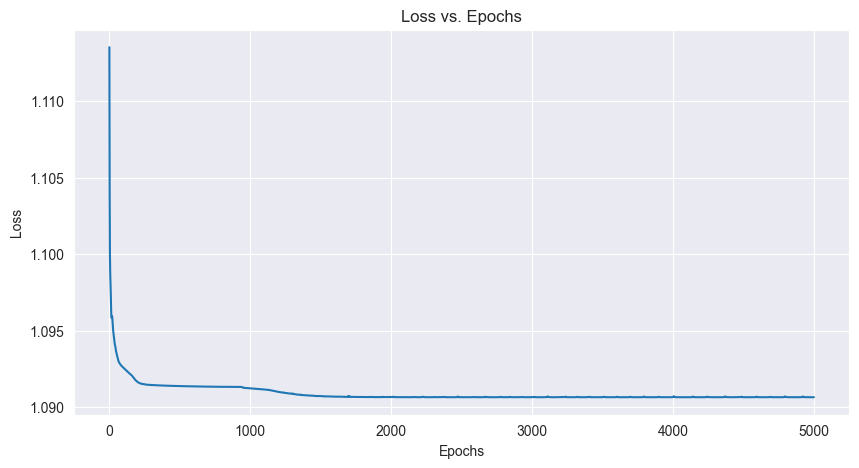

In [244]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_a1 = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [245]:
# Evaluate the model
pipeline.evaluate_model(model_a1, X_test, y_test)

              precision    recall  f1-score   support

           0       0.32      0.31      0.32       259
           1       0.31      0.12      0.18       233
           2       0.33      0.53      0.41       259

    accuracy                           0.33       751
   macro avg       0.32      0.32      0.30       751
weighted avg       0.32      0.33      0.31       751



In [246]:
# Assuming y_test and y_pred are already computed
model_a1.model.eval()
with torch.no_grad():
    outputs = model_a1.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [247]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 590
Value: 1, Count: 550
Value: 2, Count: 612
The class distribution for the y_test df is:
Value: 0, Count: 259
Value: 1, Count: 233
Value: 2, Count: 259
The class distribution for the y_pred df is:
Value: 0, Count: 250
Value: 1, Count: 93
Value: 2, Count: 408


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


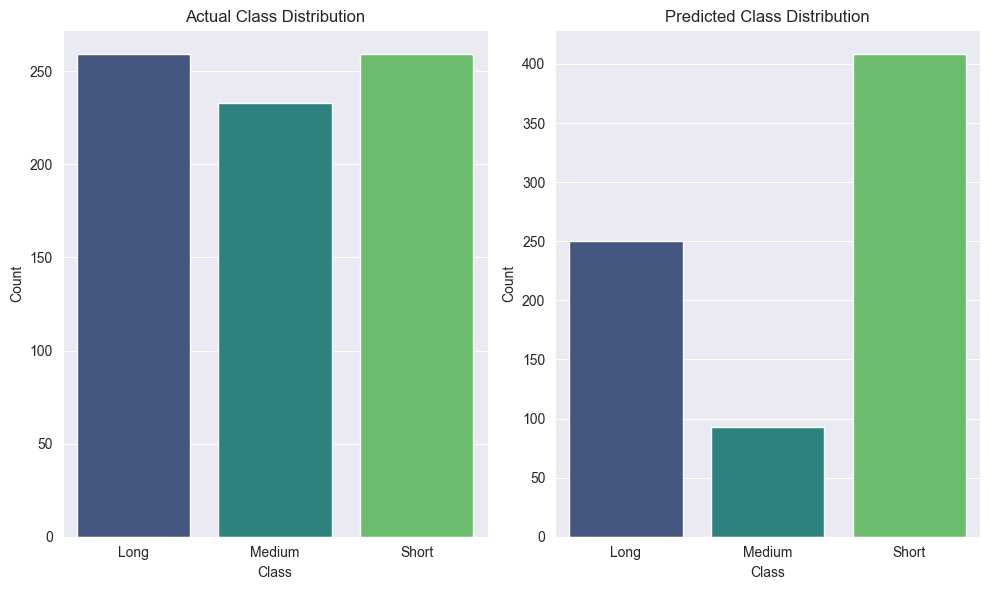

In [249]:
# Plot countplot for actual vs predicted class distribution
class_names_corrected1 = ['Long', 'Medium', 'Short']
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

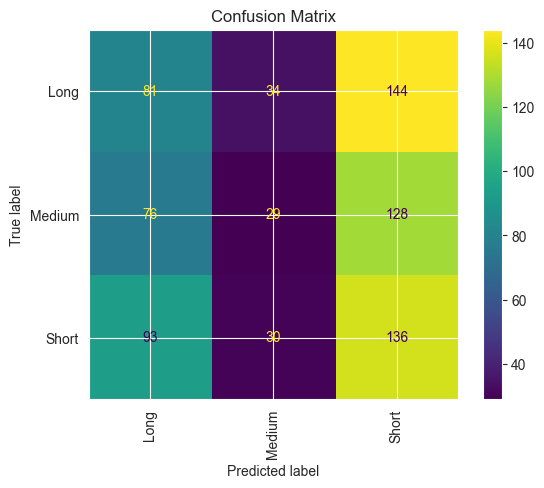

In [250]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

# Task 26.a.2 Relationship between Age & Gender to time between 1st and 2nd hospitalization
### Re-hospitalization duration split by tertiaries

## Pre process features

**We will use only relevant features**

In [116]:
# creating a subset df containing only the 2nd hospitalizations
admission2_df = df_combined_26[df_combined_26['admission_number']==2]
admission2_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   
2      305             1                  3905672 2020-01-16 03:20:07.073   
5      367             2                  7302549 2023-12-19 15:11:41.930   
6      396             3                  7065031 2023-09-10 17:14:56.510   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2 2020-01-23 13:59:00         Urgent      From_home  Released_home   
5 2023-12-25 14:28:00         Urgent      From_home  Released_home   
6 2023-09-11 16:04:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...      income_source  \
0             10779.0                         0  ...               מכבי   
1             11515.0                         2  ...              כללית   
2              6892.0                         7  ...              כללית   
5             11233.0                         6  ...  ‎ממון עצמי-לא מב‎   
6             12914.0                         1  ...              כללית   

  weight height   BMI  Chronological_illnesses  education number_of_children  \
0   58.0  160.0  23.4                        0   לא עובדת                  1   
1   78.0  167.0  28.0                        0    פנסיונר                  1   
2   70.0  165.0  26.7                        0  פנסיונרית                  1   
5   79.5  171.1  27.2                        0     גימלאי                  5   
6   98.0  167.0  38.3                        0    גימלאית                  3   

   marital_status                                        medications  \
0            אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
1            נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
2            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
5            נשוי   11285 , 1183 , 12723 , 1298 , 138 , 1466 , 16...   
6            אלמן   10226 , 10660 , 1183 , 12798 , 140 , 1443 , 1...   

   age_binned  
0           3  
1           3  
2           5  
5           1  
6           2  

[5 rows x 31 columns]

In [117]:
tertiaries = admission2_df['duration_between_hospitalizations'].quantile([0.33, 0.66])
def classify_duration_value(duration):
    if duration <= tertiaries[0.33]:
         return "short"
    elif duration <= tertiaries[0.66]:
        return "medium"
    else:
        return "long"

admission2_df["1st_to_2nd_dur_class"] = admission2_df['duration_between_hospitalizations'].apply(classify_duration_value)

C:\Users\shany\AppData\Local\Temp\ipykernel_23780\1071414580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission2_df["1st_to_2nd_dur_class"] = admission2_df['duration_between_hospitalizations'].apply(classify_duration_value)


In [118]:
admission2_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   
2      305             1                  3905672 2020-01-16 03:20:07.073   
5      367             2                  7302549 2023-12-19 15:11:41.930   
6      396             3                  7065031 2023-09-10 17:14:56.510   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2 2020-01-23 13:59:00         Urgent      From_home  Released_home   
5 2023-12-25 14:28:00         Urgent      From_home  Released_home   
6 2023-09-11 16:04:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... weight height   BMI  \
0             10779.0                         0  ...   58.0  160.0  23.4   
1             11515.0                         2  ...   78.0  167.0  28.0   
2              6892.0                         7  ...   70.0  165.0  26.7   
5             11233.0                         6  ...   79.5  171.1  27.2   
6             12914.0                         1  ...   98.0  167.0  38.3   

  Chronological_illnesses  education  number_of_children marital_status  \
0                       0   לא עובדת                   1           אלמן   
1                       0    פנסיונר                   1           נשוי   
2                       0  פנסיונרית                   1           אלמן   
5                       0     גימלאי                   5           נשוי   
6                       0    גימלאית                   3           אלמן   

                                         medications age_binned  \
0   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...          3   
1   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...          3   
2   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...          5   
5   11285 , 1183 , 12723 , 1298 , 138 , 1466 , 16...          1   
6   10226 , 10660 , 1183 , 12798 , 140 , 1443 , 1...          2   

   1st_to_2nd_dur_class  
0                 short  
1                medium  
2                medium  
5                  long  
6                  long  

[5 rows x 32 columns]

In [119]:
admission2_df['1st_to_2nd_dur_class'].value_counts()

short     469
long      448
medium    425
Name: 1st_to_2nd_dur_class, dtype: int64

In [120]:
admission2_df[['1st_to_2nd_dur_class','duration_between_hospitalizations']].value_counts()

1st_to_2nd_dur_class  duration_between_hospitalizations
short                 3.0                                  65
                      2.0                                  65
                      4.0                                  64
                      5.0                                  59
                      0.0                                  50
                      6.0                                  50
                      1.0                                  43
medium                12.0                                 43
                      9.0                                  41
short                 7.0                                  40
medium                13.0                                 38
short                 8.0                                  33
medium                10.0                                 31
                      11.0                                 28
                      14.0                                 26
              

In [232]:
categorial_features = ['age_binned', 'Gender']

In [233]:
admission2_df = label_encode(df=admission2_df, columns=categorial_features)

D:\GitHub\data-science2-lab-final-project\src\team_1\utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
D:\GitHub\data-science2-lab-final-project\src\team_1\utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


In [251]:
# set task feature
task_26_features = categorial_features

# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=admission2_df,
    features=categorial_features,
    target='1st_to_2nd_dur_class'
)

In [252]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.0991
Epoch [20/5000], Loss: 1.0994
Epoch [30/5000], Loss: 1.0962
Epoch [40/5000], Loss: 1.0957
Epoch [50/5000], Loss: 1.0952
Epoch [60/5000], Loss: 1.0950
Epoch [70/5000], Loss: 1.0948
Epoch [80/5000], Loss: 1.0947
Epoch [90/5000], Loss: 1.0946
Epoch [100/5000], Loss: 1.0945
Epoch [110/5000], Loss: 1.0945
Epoch [120/5000], Loss: 1.0944
Epoch [130/5000], Loss: 1.0943
Epoch [140/5000], Loss: 1.0942
Epoch [150/5000], Loss: 1.0941
Epoch [160/5000], Loss: 1.0941
Epoch [170/5000], Loss: 1.0940
Epoch [180/5000], Loss: 1.0939
Epoch [190/5000], Loss: 1.0938
Epoch [200/5000], Loss: 1.0937
Epoch [210/5000], Loss: 1.0935
Epoch [220/5000], Loss: 1.0934
Epoch [230/5000], Loss: 1.0933
Epoch [240/5000], Loss: 1.0931
Epoch [250/5000], Loss: 1.0930
Epoch [260/5000], Loss: 1.0928
Epoch [270/5000], Loss: 1.0926
Epoch [280/5000], Loss: 1.0924
Epoch [290/5000], Loss: 1.0922
Epoch [300/5000], Loss: 1.0920
Epoch [310/5000], Loss: 1.0917
Epoch [320/5000], Loss: 1.0915
Epoch [330/5000],

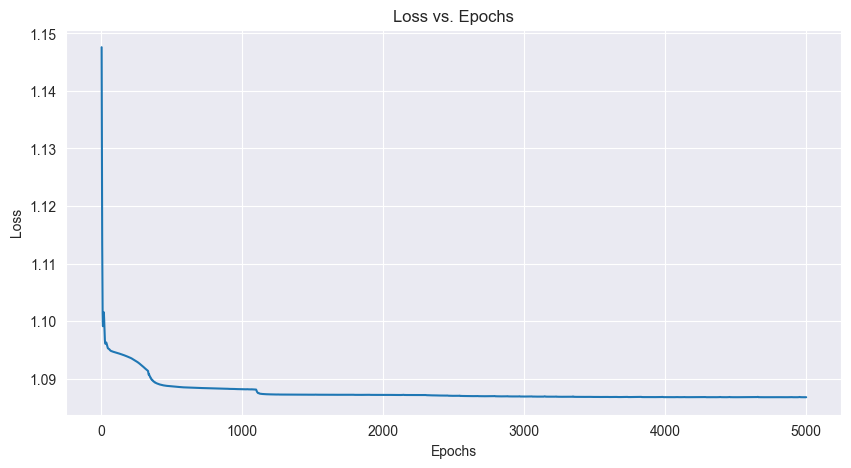

In [253]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_a2 = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [254]:
# Evaluate the model
pipeline.evaluate_model(model_a2, X_test, y_test)

              precision    recall  f1-score   support

           0       0.35      0.43      0.39       133
           1       0.31      0.16      0.21       131
           2       0.38      0.47      0.42       139

    accuracy                           0.36       403
   macro avg       0.35      0.35      0.34       403
weighted avg       0.35      0.36      0.34       403



In [255]:
# Assuming y_test and y_pred are already computed
model_a2.model.eval()
with torch.no_grad():
    outputs = model_a2.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [256]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 315
Value: 1, Count: 294
Value: 2, Count: 330
The class distribution for the y_test df is:
Value: 0, Count: 133
Value: 1, Count: 131
Value: 2, Count: 139
The class distribution for the y_pred df is:
Value: 0, Count: 162
Value: 1, Count: 67
Value: 2, Count: 174


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


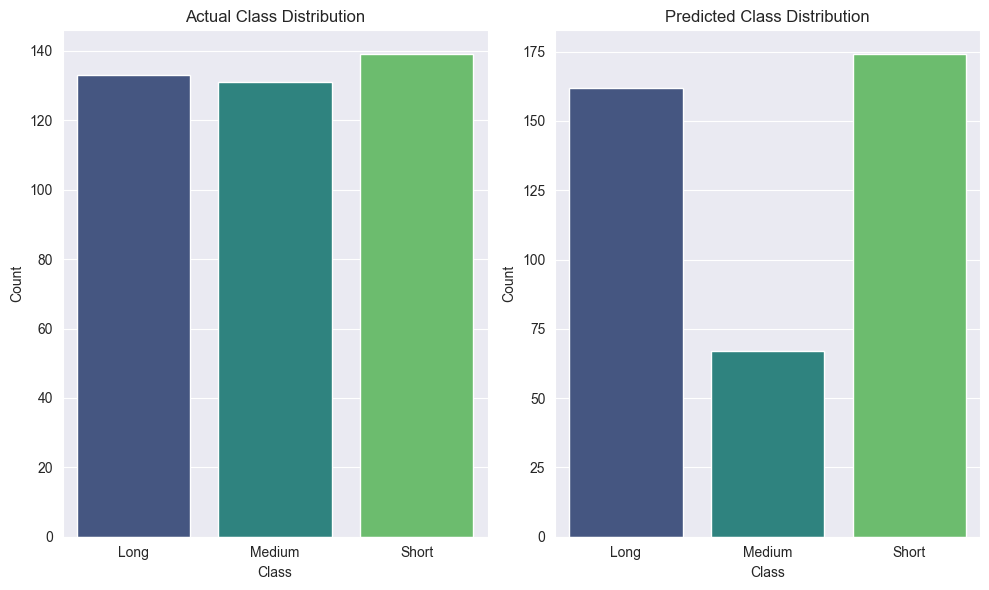

In [257]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

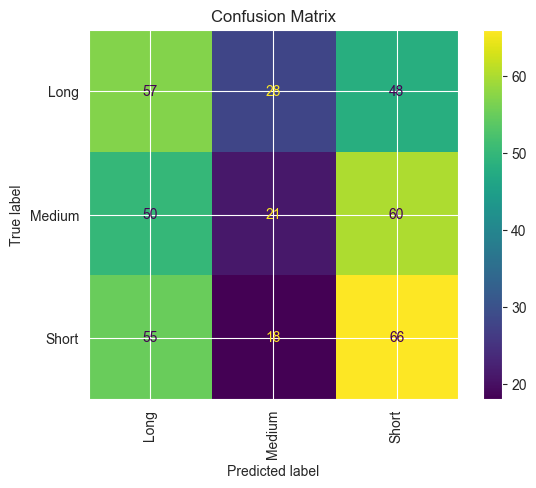

In [258]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

# Task 26.2 Relationship between Age & Gender to number of days in first hospitalization duration
### number of days in first hospitalization duration split by tertiaries 

Sort: 0 - 1 days in admission

Medium: 2 - 3 days in admission

Long: 4 - 50 days in admission

**merge on patient**

In [137]:
# Assuming 'patient_id' is the common key
left_table_columns = ['Patient']
right_table_columns = ['Patient']
df_combined_26_b = merge_dataframes_left_join(hospitalization1, clean_general_data, left_table_columns=left_table_columns, right_table_columns=right_table_columns)

In [138]:
df_combined_26_b.head(2)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4285143 2020-07-26 09:01:59.213   
1       31             4                  4298122 2020-07-31 03:17:42.087   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-27 18:01:00         Urgent      From_home  Released_home   
1 2020-07-31 15:45:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... Gender income_source  \
0             11460.0                         1  ...   נקבה          מכבי   
1             10779.0                         0  ...   נקבה          מכבי   

  weight height   BMI  Chronological_illnesses  education number_of_children  \
0   58.0  160.0  23.4                        0   לא עובדת                  1   
1   58.0  160.0  23.4                        0   לא עובדת                  1   

  marital_status                                        medications  
0           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...  
1           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...  

[2 rows x 27 columns]

In [139]:
df_combined_26_b.isna().sum()

Patient                      0
department_id                0
Admission_Medical_Record     0
Admission_Entry_Date         0
Release_Date                 0
reception_type               0
patient_origin               0
Release_Type                 0
release_doctor_code          0
hospitalization_duration     0
admission_diagnoses_list     0
release_diagnoses_list       0
Admission_Entry_Date_only    0
Release_Date_only            0
admission_number             0
hospitalization_count        0
age                          0
Gender                       0
income_source                0
weight                       0
height                       0
BMI                          0
Chronological_illnesses      0
education                    0
number_of_children           0
marital_status               0
medications                  0
dtype: int64

In [140]:
df_combined_26_b['age'].describe()

count    7006.000000
mean       79.815301
std         8.609898
min        65.000000
25%        73.000000
50%        80.000000
75%        87.000000
max       111.000000
Name: age, dtype: float64

In [141]:
# Step 1: Define the bins and bin the age column, save the bin ranges to a variable
age_bins = [65, 70, 75, 80, 85, 90, 95, 120]
age_labels = ['65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95+']
df_combined_26_b['age_binned'] = pd.cut(df_combined_26_b['age'], bins=age_bins, labels=age_labels, right=False)

In [142]:
df_combined_26_b.head(10)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4285143 2020-07-26 09:01:59.213   
1       31             4                  4298122 2020-07-31 03:17:42.087   
2      116             1                  5069180 2021-07-08 16:33:04.860   
3      122             5                  6384463 2022-12-14 14:58:02.130   
4      184             2                  6224599 2022-10-11 02:39:07.380   
5      184             2                  6245307 2022-10-21 20:40:30.750   
6      207             4                  5243107 2021-09-23 00:04:14.600   
7      305             1                  3877629 2020-01-04 16:16:04.103   
8      305             1                  3905672 2020-01-16 03:20:07.073   
9      305             1                  3951517 2020-02-04 14:02:27.643   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-27 18:01:00         Urgent      From_home  Released_home   
1 2020-07-31 15:45:00         Urgent      From_home  Released_home   
2 2021-07-09 15:23:00         Urgent      From_home  Released_home   
3 2022-12-16 16:15:00         Urgent      From_home  Released_home   
4 2022-10-11 12:39:00         Urgent      From_home  Released_home   
5 2022-10-23 15:50:00         Urgent      From_home  Released_home   
6 2021-09-23 13:54:00         Urgent      From_home  Released_home   
7 2020-01-06 14:57:00         Urgent      From_home  Released_home   
8 2020-01-23 13:59:00         Urgent      From_home  Released_home   
9 2020-02-05 14:06:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...      income_source  \
0             11460.0                         1  ...               מכבי   
1             10779.0                         0  ...               מכבי   
2             12427.0                         1  ...              כללית   
3             11792.0                         2  ...              כללית   
4             11670.0                         0  ...              כללית   
5             11515.0                         2  ...              כללית   
6             12095.0                         0  ...  ‎ממון עצמי-לא מב‎   
7             10487.0                         2  ...              כללית   
8              6892.0                         7  ...              כללית   
9             10762.0                         1  ...              כללית   

  weight height   BMI  Chronological_illnesses  education  number_of_children  \
0   58.0  160.0  23.4                        0   לא עובדת                   1   
1   58.0  160.0  23.4                        0   לא עובדת                   1   
2   70.0  160.0  27.3                        0  פנסיונרית                  12   
3   63.0  165.0  23.1                        1    פנסיונר                   7   
4   78.0  167.0  28.0                        0    פנסיונר                   1   
5   78.0  167.0  28.0                        0    פנסיונר                   1   
6  100.0  160.0  39.1                        0    גימלאית                   7   
7   70.0  165.0  26.7                        0  פנסיונרית                   1   
8   70.0  165.0  26.7                        0  פנסיונרית                   1   
9   70.0  165.0  26.7                        0  פנסיונרית                   1   

  marital_status                                        medications  \
0           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
1           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
2           אלמן   1120 , 1183 , 1229 , 1340 , 1530 , 2212 , 230...   
3           נשוי   1183 , 12798 , 184 , 2127 , 2412 , 2549 , 356...   
4           נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
5           נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
6           אלמן   1183 , 133 , 138 , 1448 , 1496 , 1527 , 1530 ...   
7           אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
8           אלמן   1183 , 1

## Pre process features

In [144]:
admission1_df = df_combined_26_b[df_combined_26_b['admission_number']==1]
admission1_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4285143 2020-07-26 09:01:59.213   
2      116             1                  5069180 2021-07-08 16:33:04.860   
3      122             5                  6384463 2022-12-14 14:58:02.130   
4      184             2                  6224599 2022-10-11 02:39:07.380   
6      207             4                  5243107 2021-09-23 00:04:14.600   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-27 18:01:00         Urgent      From_home  Released_home   
2 2021-07-09 15:23:00         Urgent      From_home  Released_home   
3 2022-12-16 16:15:00         Urgent      From_home  Released_home   
4 2022-10-11 12:39:00         Urgent      From_home  Released_home   
6 2021-09-23 13:54:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ...      income_source  \
0             11460.0                         1  ...               מכבי   
2             12427.0                         1  ...              כללית   
3             11792.0                         2  ...              כללית   
4             11670.0                         0  ...              כללית   
6             12095.0                         0  ...  ‎ממון עצמי-לא מב‎   

  weight height   BMI  Chronological_illnesses  education  number_of_children  \
0   58.0  160.0  23.4                        0   לא עובדת                   1   
2   70.0  160.0  27.3                        0  פנסיונרית                  12   
3   63.0  165.0  23.1                        1    פנסיונר                   7   
4   78.0  167.0  28.0                        0    פנסיונר                   1   
6  100.0  160.0  39.1                        0    גימלאית                   7   

  marital_status                                        medications  \
0           אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
2           אלמן   1120 , 1183 , 1229 , 1340 , 1530 , 2212 , 230...   
3           נשוי   1183 , 12798 , 184 , 2127 , 2412 , 2549 , 356...   
4           נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
6           אלמן   1183 , 133 , 138 , 1448 , 1496 , 1527 , 1530 ...   

   age_binned  
0       80-84  
2       85-89  
3       80-84  
4       80-84  
6       70-74  

[5 rows x 28 columns]

In [145]:
tertiaries = admission1_df['hospitalization_duration'].quantile([0.33, 0.66])
def classify_duration_value(duration):
    if duration <= tertiaries[0.33]:
         return "short"
    elif duration <= tertiaries[0.66]:
        return "medium"
    else:
        return "long"

admission1_df["1st_hosp_dur_class"] = admission1_df['hospitalization_duration'].apply(classify_duration_value)

C:\Users\shany\AppData\Local\Temp\ipykernel_23780\1441037305.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission1_df["1st_hosp_dur_class"] = admission1_df['hospitalization_duration'].apply(classify_duration_value)


In [146]:
admission1_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4285143 2020-07-26 09:01:59.213   
2      116             1                  5069180 2021-07-08 16:33:04.860   
3      122             5                  6384463 2022-12-14 14:58:02.130   
4      184             2                  6224599 2022-10-11 02:39:07.380   
6      207             4                  5243107 2021-09-23 00:04:14.600   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-27 18:01:00         Urgent      From_home  Released_home   
2 2021-07-09 15:23:00         Urgent      From_home  Released_home   
3 2022-12-16 16:15:00         Urgent      From_home  Released_home   
4 2022-10-11 12:39:00         Urgent      From_home  Released_home   
6 2021-09-23 13:54:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... weight height   BMI  \
0             11460.0                         1  ...   58.0  160.0  23.4   
2             12427.0                         1  ...   70.0  160.0  27.3   
3             11792.0                         2  ...   63.0  165.0  23.1   
4             11670.0                         0  ...   78.0  167.0  28.0   
6             12095.0                         0  ...  100.0  160.0  39.1   

  Chronological_illnesses  education  number_of_children  marital_status  \
0                       0   לא עובדת                   1            אלמן   
2                       0  פנסיונרית                  12            אלמן   
3                       1    פנסיונר                   7            נשוי   
4                       0    פנסיונר                   1            נשוי   
6                       0    גימלאית                   7            אלמן   

                                         medications age_binned  \
0   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...      80-84   
2   1120 , 1183 , 1229 , 1340 , 1530 , 2212 , 230...      85-89   
3   1183 , 12798 , 184 , 2127 , 2412 , 2549 , 356...      80-84   
4   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...      80-84   
6   1183 , 133 , 138 , 1448 , 1496 , 1527 , 1530 ...      70-74   

   1st_hosp_dur_class  
0               short  
2               short  
3              medium  
4               short  
6               short  

[5 rows x 29 columns]

In [147]:
admission1_df['1st_hosp_dur_class'].value_counts()

short     1649
medium    1503
long      1354
Name: 1st_hosp_dur_class, dtype: int64

In [148]:
admission1_df[['1st_hosp_dur_class','hospitalization_duration']].value_counts()

1st_hosp_dur_class  hospitalization_duration
short               1                           1274
medium              2                            903
                    3                            600
short               0                            375
long                4                            375
                    5                            239
                    6                            184
                    7                            166
                    8                             90
                    9                             65
                    10                            38
                    12                            36
                    11                            32
                    13                            25
                    15                            17
                    14                            15
                    19                            11
                    16                             9
 

**We will use only relevant features**

In [151]:
categorial_features = ['age_binned', 'Gender']

In [152]:
admission1_df = label_encode(df=admission1_df, columns=categorial_features)

D:\GitHub\data-science2-lab-final-project\src\team_1\utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
D:\GitHub\data-science2-lab-final-project\src\team_1\utils.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


In [259]:
# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=admission1_df,
    features=categorial_features,
    target='1st_hosp_dur_class',
)

In [260]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.1025
Epoch [20/5000], Loss: 1.0978
Epoch [30/5000], Loss: 1.0938
Epoch [40/5000], Loss: 1.0937
Epoch [50/5000], Loss: 1.0932
Epoch [60/5000], Loss: 1.0929
Epoch [70/5000], Loss: 1.0928
Epoch [80/5000], Loss: 1.0927
Epoch [90/5000], Loss: 1.0926
Epoch [100/5000], Loss: 1.0926
Epoch [110/5000], Loss: 1.0925
Epoch [120/5000], Loss: 1.0925
Epoch [130/5000], Loss: 1.0925
Epoch [140/5000], Loss: 1.0925
Epoch [150/5000], Loss: 1.0924
Epoch [160/5000], Loss: 1.0924
Epoch [170/5000], Loss: 1.0924
Epoch [180/5000], Loss: 1.0924
Epoch [190/5000], Loss: 1.0924
Epoch [200/5000], Loss: 1.0923
Epoch [210/5000], Loss: 1.0923
Epoch [220/5000], Loss: 1.0923
Epoch [230/5000], Loss: 1.0923
Epoch [240/5000], Loss: 1.0922
Epoch [250/5000], Loss: 1.0922
Epoch [260/5000], Loss: 1.0922
Epoch [270/5000], Loss: 1.0921
Epoch [280/5000], Loss: 1.0921
Epoch [290/5000], Loss: 1.0921
Epoch [300/5000], Loss: 1.0920
Epoch [310/5000], Loss: 1.0920
Epoch [320/5000], Loss: 1.0920
Epoch [330/5000],

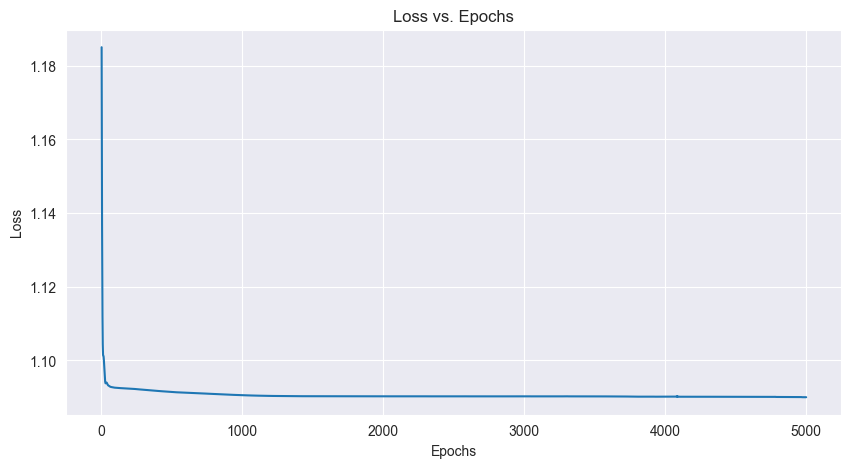

In [261]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_b = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [262]:
# Evaluate the model
pipeline.evaluate_model(model_b, X_test, y_test)

              precision    recall  f1-score   support

           0       0.31      0.03      0.06       397
           1       0.33      0.19      0.24       466
           2       0.36      0.78      0.50       489

    accuracy                           0.36      1352
   macro avg       0.33      0.33      0.26      1352
weighted avg       0.34      0.36      0.28      1352



In [263]:
# Assuming y_test and y_pred are already computed
model_b.model.eval()
with torch.no_grad():
    outputs = model_b.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [264]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 957
Value: 1, Count: 1037
Value: 2, Count: 1160
The class distribution for the y_test df is:
Value: 0, Count: 397
Value: 1, Count: 466
Value: 2, Count: 489
The class distribution for the y_pred df is:
Value: 0, Count: 42
Value: 1, Count: 270
Value: 2, Count: 1040


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


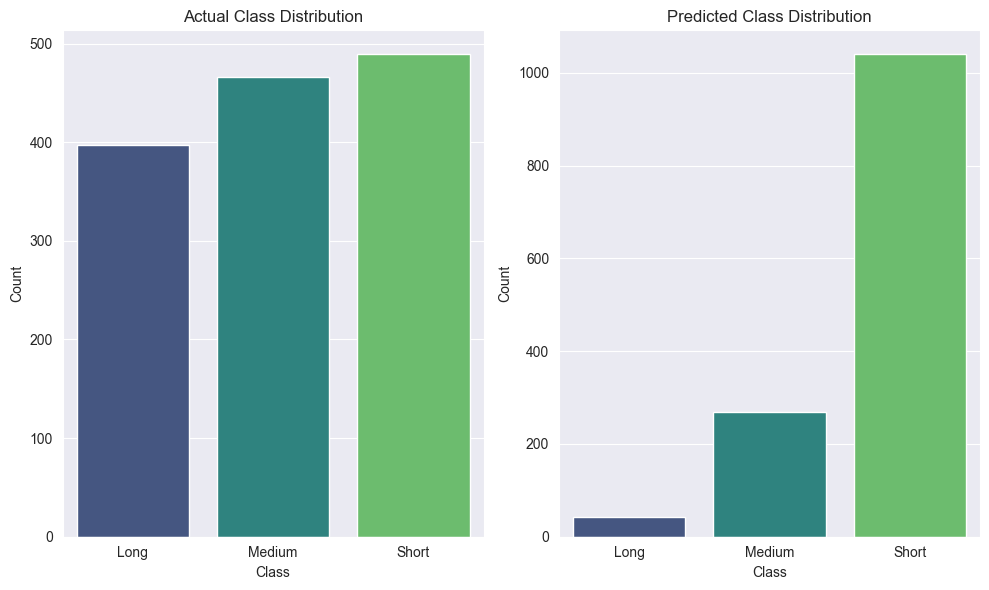

In [265]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

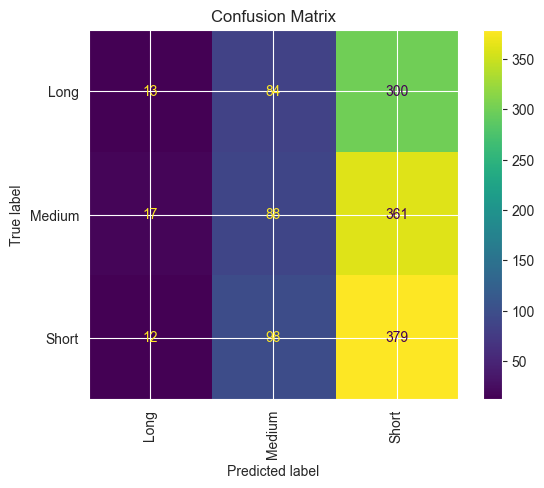

In [266]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

# Task 26.c Relationship between Age & Gender to number of days in 2nd hospitalization duration
### number of days in 2nd hospitalization duration split by tertiaries 

Sort: 0 - 1 days in admission

Medium: 2 - 3 days in admission

Long: 4 - 50 days in admission

In [167]:
tertiaries = admission2_df['hospitalization_duration'].quantile([0.33, 0.66])
def classify_duration_value(duration):
    if duration <= tertiaries[0.33]:
         return "short"
    elif duration <= tertiaries[0.66]:
        return "medium"
    else:
        return "long"

admission2_df["2nd_hosp_dur_class"] = admission2_df['hospitalization_duration'].apply(classify_duration_value)

C:\Users\shany\AppData\Local\Temp\ipykernel_23780\2096632621.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission2_df["2nd_hosp_dur_class"] = admission2_df['hospitalization_duration'].apply(classify_duration_value)


In [168]:
admission2_df['2nd_hosp_dur_class'].value_counts()

short     489
medium    448
long      405
Name: 2nd_hosp_dur_class, dtype: int64

In [169]:
admission2_df[['2nd_hosp_dur_class','hospitalization_duration']].value_counts()

2nd_hosp_dur_class  hospitalization_duration
short               1                           388
medium              2                           262
                    3                           186
long                4                           114
short               0                           101
long                5                            79
                    6                            52
                    7                            38
                    8                            26
                    9                            18
                    10                           10
                    12                           10
                    14                            9
                    11                            8
                    13                            7
                    15                            6
                    17                            6
                    16                            5
                   

**We will use only relevant features**

In [171]:
categorial_features = ['age_binned', 'Gender']

In [267]:
# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=admission2_df,
    features=categorial_features,
    target='2nd_hosp_dur_class'
)

In [268]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.0889
Epoch [20/5000], Loss: 1.0875
Epoch [30/5000], Loss: 1.0856
Epoch [40/5000], Loss: 1.0851
Epoch [50/5000], Loss: 1.0846
Epoch [60/5000], Loss: 1.0843
Epoch [70/5000], Loss: 1.0841
Epoch [80/5000], Loss: 1.0838
Epoch [90/5000], Loss: 1.0835
Epoch [100/5000], Loss: 1.0832
Epoch [110/5000], Loss: 1.0829
Epoch [120/5000], Loss: 1.0825
Epoch [130/5000], Loss: 1.0821
Epoch [140/5000], Loss: 1.0816
Epoch [150/5000], Loss: 1.0810
Epoch [160/5000], Loss: 1.0804
Epoch [170/5000], Loss: 1.0797
Epoch [180/5000], Loss: 1.0789
Epoch [190/5000], Loss: 1.0781
Epoch [200/5000], Loss: 1.0774
Epoch [210/5000], Loss: 1.0765
Epoch [220/5000], Loss: 1.0757
Epoch [230/5000], Loss: 1.0749
Epoch [240/5000], Loss: 1.0741
Epoch [250/5000], Loss: 1.0734
Epoch [260/5000], Loss: 1.0728
Epoch [270/5000], Loss: 1.0723
Epoch [280/5000], Loss: 1.0719
Epoch [290/5000], Loss: 1.0715
Epoch [300/5000], Loss: 1.0713
Epoch [310/5000], Loss: 1.0711
Epoch [320/5000], Loss: 1.0709
Epoch [330/5000],

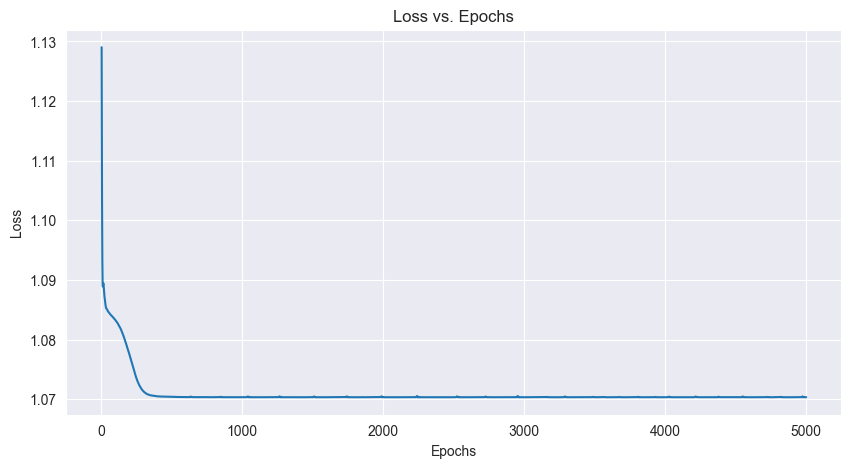

In [269]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_c = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [270]:
# Evaluate the model
pipeline.evaluate_model(model_c, X_test, y_test)

              precision    recall  f1-score   support

           0       0.38      0.27      0.31       124
           1       0.34      0.23      0.27       140
           2       0.37      0.59      0.46       139

    accuracy                           0.36       403
   macro avg       0.36      0.36      0.35       403
weighted avg       0.36      0.36      0.35       403



In [271]:
# Assuming y_test and y_pred are already computed
model_c.model.eval()
with torch.no_grad():
    outputs = model_c.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [272]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 281
Value: 1, Count: 308
Value: 2, Count: 350
The class distribution for the y_test df is:
Value: 0, Count: 124
Value: 1, Count: 140
Value: 2, Count: 139
The class distribution for the y_pred df is:
Value: 0, Count: 88
Value: 1, Count: 94
Value: 2, Count: 221


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


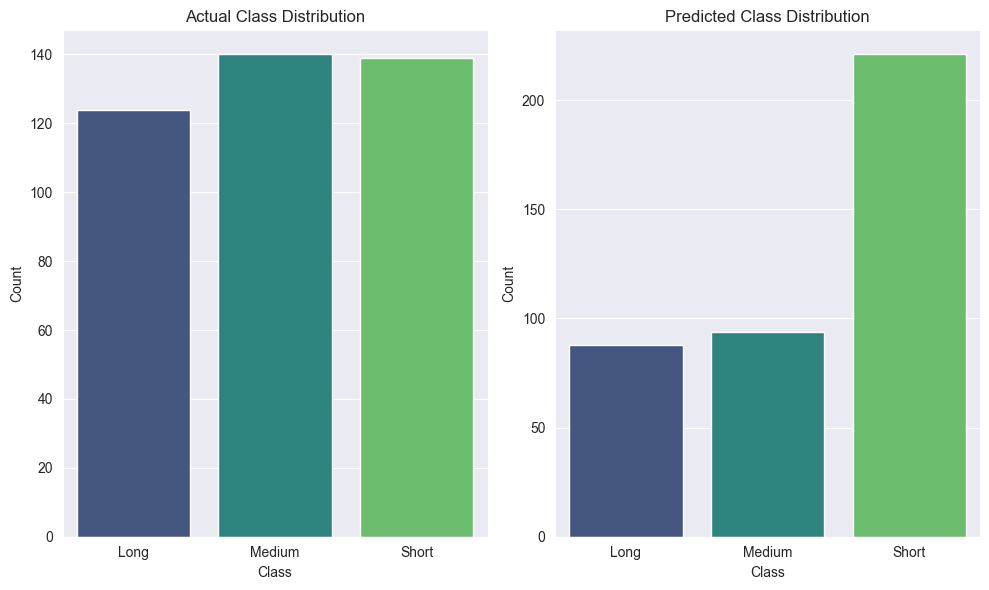

In [273]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

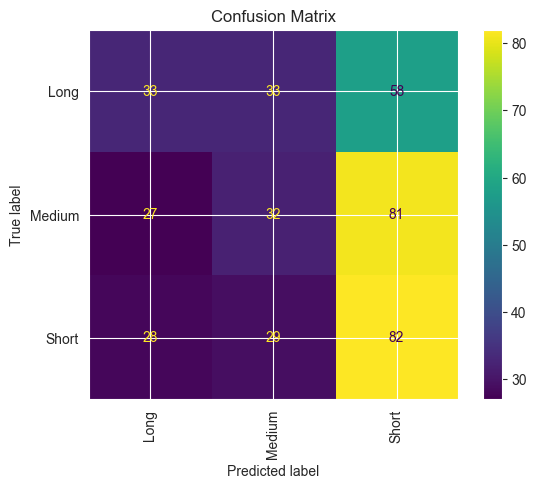

In [274]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

### Task 26.d Relationship between Age & Gender to  number of days in:
# *2nd and above* hospitalization duration
### number of days in **2nd and above** hospitalization duration split by tertiaries 

Sort: 0 - 1 days in admission

Medium: 2 - 3 days in admission

Long: 4 - 50 days in admission

In [179]:
admission2plus_df = df_combined_26[df_combined_26['admission_number']>=2]
admission2plus_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   
2      305             1                  3905672 2020-01-16 03:20:07.073   
3      305             1                  3951517 2020-02-04 14:02:27.643   
4      305             1                  3958841 2020-02-07 15:32:42.737   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2 2020-01-23 13:59:00         Urgent      From_home  Released_home   
3 2020-02-05 14:06:00         Urgent      From_home  Released_home   
4 2020-02-11 15:14:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... income_source weight  \
0             10779.0                         0  ...          מכבי   58.0   
1             11515.0                         2  ...         כללית   78.0   
2              6892.0                         7  ...         כללית   70.0   
3             10762.0                         1  ...         כללית   70.0   
4              7993.0                         4  ...         כללית   70.0   

  height   BMI  Chronological_illnesses  education number_of_children  \
0  160.0  23.4                        0   לא עובדת                  1   
1  167.0  28.0                        0    פנסיונר                  1   
2  165.0  26.7                        0  פנסיונרית                  1   
3  165.0  26.7                        0  פנסיונרית                  1   
4  165.0  26.7                        0  פנסיונרית                  1   

   marital_status                                        medications  \
0            אלמן   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...   
1            נשוי   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...   
2            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
3            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   
4            אלמן   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...   

   age_binned  
0           3  
1           3  
2           5  
3           5  
4           5  

[5 rows x 31 columns]

In [180]:
tertiaries = admission2plus_df['hospitalization_duration'].quantile([0.33, 0.66])
def classify_duration_value(duration):
    if duration <= tertiaries[0.33]:
         return "short"
    elif duration <= tertiaries[0.66]:
        return "medium"
    else:
        return "long"

admission2plus_df["2nd_plus_hosp_dur_class"] = admission2plus_df['hospitalization_duration'].apply(classify_duration_value)

C:\Users\shany\AppData\Local\Temp\ipykernel_23780\1463814433.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  admission2plus_df["2nd_plus_hosp_dur_class"] = admission2plus_df['hospitalization_duration'].apply(classify_duration_value)


In [181]:
admission2plus_df.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
0       31             4                  4298122 2020-07-31 03:17:42.087   
1      184             2                  6245307 2022-10-21 20:40:30.750   
2      305             1                  3905672 2020-01-16 03:20:07.073   
3      305             1                  3951517 2020-02-04 14:02:27.643   
4      305             1                  3958841 2020-02-07 15:32:42.737   

         Release_Date reception_type patient_origin   Release_Type  \
0 2020-07-31 15:45:00         Urgent      From_home  Released_home   
1 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2 2020-01-23 13:59:00         Urgent      From_home  Released_home   
3 2020-02-05 14:06:00         Urgent      From_home  Released_home   
4 2020-02-11 15:14:00         Urgent      From_home  Released_home   

  release_doctor_code  hospitalization_duration  ... weight height   BMI  \
0             10779.0                         0  ...   58.0  160.0  23.4   
1             11515.0                         2  ...   78.0  167.0  28.0   
2              6892.0                         7  ...   70.0  165.0  26.7   
3             10762.0                         1  ...   70.0  165.0  26.7   
4              7993.0                         4  ...   70.0  165.0  26.7   

  Chronological_illnesses  education  number_of_children marital_status  \
0                       0   לא עובדת                   1           אלמן   
1                       0    פנסיונר                   1           נשוי   
2                       0  פנסיונרית                   1           אלמן   
3                       0  פנסיונרית                   1           אלמן   
4                       0  פנסיונרית                   1           אלמן   

                                         medications age_binned  \
0   11240 , 2188 , 2606 , 2690 , 2765 , 3633 , 38...          3   
1   1333 , 1530 , 2187 , 2188 , 2213 , 2214 , 260...          3   
2   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...          5   
3   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...          5   
4   1183 , 138 , 1530 , 1947 , 2044 , 2109 , 2188...          5   

   2nd_plus_hosp_dur_class  
0                    short  
1                   medium  
2                     long  
3                    short  
4                     long  

[5 rows x 32 columns]

In [182]:
admission2plus_df['2nd_plus_hosp_dur_class'].value_counts()

short     964
medium    836
long      700
Name: 2nd_plus_hosp_dur_class, dtype: int64

In [183]:
admission2plus_df[['2nd_plus_hosp_dur_class','hospitalization_duration']].value_counts().to_frame()

0
2nd_plus_hosp_dur_class hospitalization_duration     
short                   1                         750
medium                  2                         511
                        3                         325
short                   0                         214
long                    4                         213
                        5                         123
                        6                          94
                        7                          74
                        8                          40
                        9                          28
                        10                         18
                        11                         17
                        12                         16
                        13                         15
                        14                         13
                        15                         10
                        17                          8
                        16                          6
                        21                          5
                        18                          4
                        19                          4
                        22                          2
                        29                          1
                        32                          1
                        35                          1
                        41                          1
                        45                          1
                        50                          1
                        27                          1
                        26                          1
                        24                          1
                        20                          1

**We will use only relevant features**

In [184]:
categorial_features = ['age_binned', 'Gender']

In [275]:
# Create a pipeline with features and target
pipeline = ClassificationPipeline(
    df=admission2plus_df,
    features=categorial_features,
    target='2nd_plus_hosp_dur_class',
)

In [276]:
# Prepare the data
X_train, X_test, y_train, y_test = pipeline.prepare_data()

# ensure 3 classes (short, medium, long)
pipeline.num_classes

3

Epoch [10/5000], Loss: 1.0830
Epoch [20/5000], Loss: 1.0789
Epoch [30/5000], Loss: 1.0784
Epoch [40/5000], Loss: 1.0781
Epoch [50/5000], Loss: 1.0778
Epoch [60/5000], Loss: 1.0774
Epoch [70/5000], Loss: 1.0772
Epoch [80/5000], Loss: 1.0771
Epoch [90/5000], Loss: 1.0769
Epoch [100/5000], Loss: 1.0768
Epoch [110/5000], Loss: 1.0766
Epoch [120/5000], Loss: 1.0765
Epoch [130/5000], Loss: 1.0764
Epoch [140/5000], Loss: 1.0763
Epoch [150/5000], Loss: 1.0763
Epoch [160/5000], Loss: 1.0763
Epoch [170/5000], Loss: 1.0762
Epoch [180/5000], Loss: 1.0762
Epoch [190/5000], Loss: 1.0762
Epoch [200/5000], Loss: 1.0761
Epoch [210/5000], Loss: 1.0761
Epoch [220/5000], Loss: 1.0761
Epoch [230/5000], Loss: 1.0761
Epoch [240/5000], Loss: 1.0760
Epoch [250/5000], Loss: 1.0760
Epoch [260/5000], Loss: 1.0760
Epoch [270/5000], Loss: 1.0759
Epoch [280/5000], Loss: 1.0759
Epoch [290/5000], Loss: 1.0758
Epoch [300/5000], Loss: 1.0758
Epoch [310/5000], Loss: 1.0758
Epoch [320/5000], Loss: 1.0757
Epoch [330/5000],

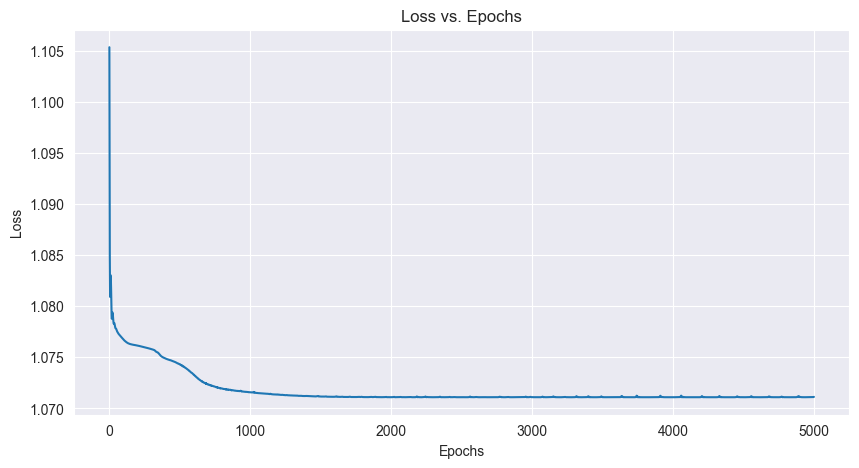

In [277]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_d = pipeline.train_model(
    X_train, y_train, input_size, num_classes=pipeline.num_classes, num_epochs=5000, learning_rate=0.01
)

In [278]:
# Evaluate the model
pipeline.evaluate_model(model_d, X_test, y_test)

              precision    recall  f1-score   support

           0       0.40      0.10      0.16       222
           1       0.40      0.17      0.24       250
           2       0.39      0.82      0.53       278

    accuracy                           0.39       750
   macro avg       0.40      0.37      0.31       750
weighted avg       0.40      0.39      0.33       750



In [279]:
# Assuming y_test and y_pred are already computed
model_d.model.eval()
with torch.no_grad():
    outputs = model_d.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [280]:
print('The class distribution for the y_train df is:') 
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')    
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')     
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")    

The class distribution for the y_train df is:
Value: 0, Count: 478
Value: 1, Count: 586
Value: 2, Count: 686
The class distribution for the y_test df is:
Value: 0, Count: 222
Value: 1, Count: 250
Value: 2, Count: 278
The class distribution for the y_pred df is:
Value: 0, Count: 57
Value: 1, Count: 108
Value: 2, Count: 585


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


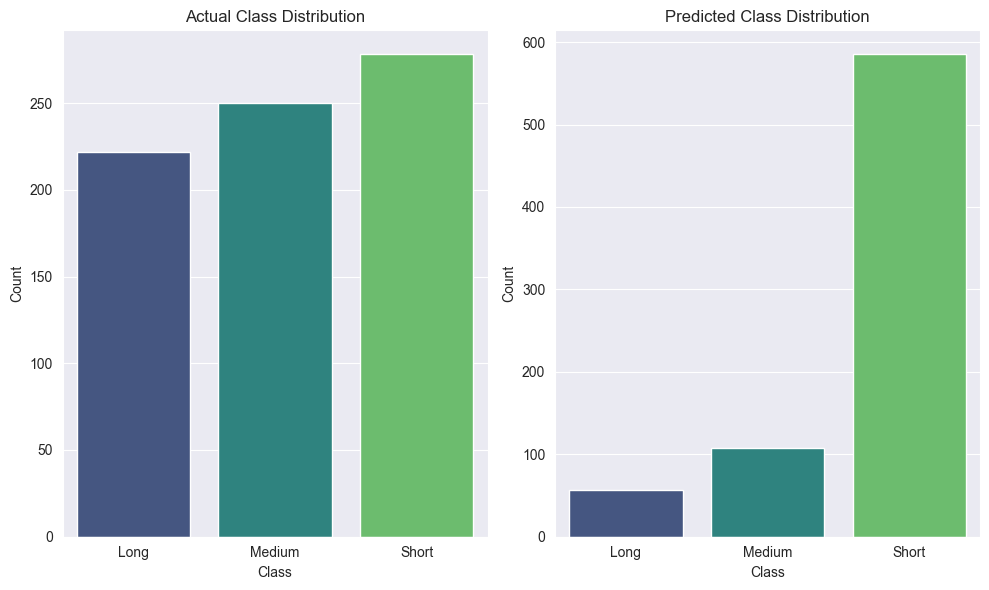

In [281]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

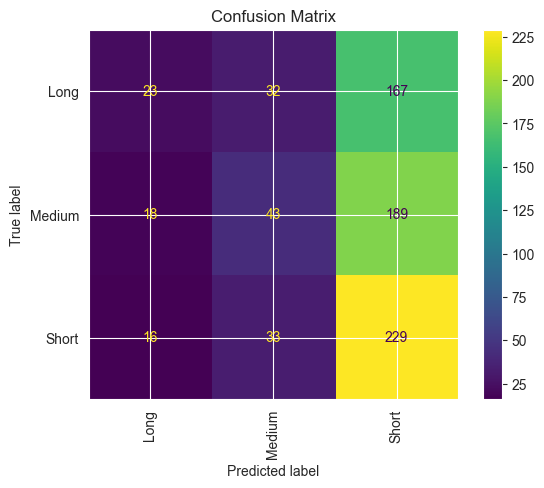

In [282]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

# ---------------------------- END TASK 26 Age & gender Model --------------------------

<br><br>

# Task 37 Dimensionality Reduction of hospitalization 1
# Conducted in regard to hospitalization duration classification as the target prediction
## a. Dimension reduction using Autoencoder

In [286]:
hospitalization1.head()

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
4944      31             4                  4285143 2020-07-26 09:01:59.213   
6842      31             4                  4298122 2020-07-31 03:17:42.087   
6000     116             1                  5069180 2021-07-08 16:33:04.860   
992      122             5                  6384463 2022-12-14 14:58:02.130   
2111     184             2                  6224599 2022-10-11 02:39:07.380   

            Release_Date reception_type patient_origin   Release_Type  \
4944 2020-07-27 18:01:00         Urgent      From_home  Released_home   
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
6000 2021-07-09 15:23:00         Urgent      From_home  Released_home   
992  2022-12-16 16:15:00         Urgent      From_home  Released_home   
2111 2022-10-11 12:39:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration admission_diagnoses_list  \
4944             11460.0                         1                  [42731]   
6842             10779.0                         0                  [42731]   
6000             12427.0                         1             [7862, 7865]   
992              11792.0                         2            [2852, 28731]   
2111             11670.0                         0                   [7865]   

     release_diagnoses_list Admission_Entry_Date_only Release_Date_only  \
4944                [42731]                2020-07-26        2020-07-27   
6842                [42731]                2020-07-31        2020-07-31   
6000           [7862, 7865]                2021-07-08        2021-07-09   
992           [2859, 28731]                2022-12-14        2022-12-16   
2111                 [7865]                2022-10-11        2022-10-11   

      admission_number  
4944                 1  
6842                 2  
6000                 1  
992                  1  
2111                 1

In [289]:
# Split the 'release_diagnoses' string and expand into separate columns
release_diagnoses_split = hospitalization1['release_diagnoses_list'].apply(pd.Series)

# Assign meaningful column names based on the max possible diagnoses
release_diagnoses_split.columns = [f'release_diagnoses_{i+1}' for i in range(release_diagnoses_split.shape[1])]

# Concatenate the split columns back into the original DataFrame
hospitalization1 = pd.concat([hospitalization1, release_diagnoses_split], axis=1)

# Split the 'admission_diagnoses' string and expand into separate columns
admission_diagnoses_split = hospitalization1['admission_diagnoses_list'].apply(pd.Series)

# Assign meaningful column names based on the max possible diagnoses
admission_diagnoses_split.columns = [f'admission_diagnoses_{i+1}' for i in range(admission_diagnoses_split.shape[1])]

# Concatenate the split columns back into the original DataFrame
hospitalization1 = pd.concat([hospitalization1, admission_diagnoses_split], axis=1)

# fill NaN values with an empty string
hospitalization1.fillna('', inplace=True)

In [299]:
hospitalization1.head(10)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
4944      31             4                  4285143 2020-07-26 09:01:59.213   
6842      31             4                  4298122 2020-07-31 03:17:42.087   
6000     116             1                  5069180 2021-07-08 16:33:04.860   
992      122             5                  6384463 2022-12-14 14:58:02.130   
2111     184             2                  6224599 2022-10-11 02:39:07.380   
1261     184             2                  6245307 2022-10-21 20:40:30.750   
2656     207             4                  5243107 2021-09-23 00:04:14.600   
2735     305             1                  3877629 2020-01-04 16:16:04.103   
6137     305             1                  3905672 2020-01-16 03:20:07.073   
6958     305             1                  3951517 2020-02-04 14:02:27.643   

            Release_Date reception_type patient_origin   Release_Type  \
4944 2020-07-27 18:01:00         Urgent      From_home  Released_home   
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
6000 2021-07-09 15:23:00         Urgent      From_home  Released_home   
992  2022-12-16 16:15:00         Urgent      From_home  Released_home   
2111 2022-10-11 12:39:00         Urgent      From_home  Released_home   
1261 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2656 2021-09-23 13:54:00         Urgent      From_home  Released_home   
2735 2020-01-06 14:57:00         Urgent      From_home  Released_home   
6137 2020-01-23 13:59:00         Urgent      From_home  Released_home   
6958 2020-02-05 14:06:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration  ... release_diagnoses_7  \
4944             11460.0                         1  ...                       
6842             10779.0                         0  ...                       
6000             12427.0                         1  ...                       
992              11792.0                         2  ...                       
2111             11670.0                         0  ...                       
1261             11515.0                         2  ...                       
2656             12095.0                         0  ...                       
2735             10487.0                         2  ...                       
6137              6892.0                         7  ...                       
6958             10762.0                         1  ...                       

     release_diagnoses_8 release_diagnoses_9 release_diagnoses_10  \
4944                                                                
6842                                                                
6000                                                                
992                                                                 
2111                                                                
1261                                                                
2656                                                                
2735                                                                
6137                                                                
6958                                                                

      admission_diagnoses_1  admission_diagnoses_2 admission_diagnoses_3  \
4944                  42731                                                
6842                  42731                                                
6000                   7862                   7865                         
992                    2852                  28731                         
2111                   7865                                                
1261                   7865                                                
2656                   7865                                                
2735                  78609                                                
6137             

In [300]:
tertiaries = hospitalization1['hospitalization_duration'].quantile([0.33, 0.66])
def classify_duration_value(duration):
    if duration <= tertiaries[0.33]:
         return "short"
    elif duration <= tertiaries[0.66]:
        return "medium"
    else:
        return "long"

hospitalization1["hosp_dur_class"] = hospitalization1['hospitalization_duration'].apply(classify_duration_value)

In [301]:
hospitalization1.head(10)

Patient department_id Admission_Medical_Record    Admission_Entry_Date  \
4944      31             4                  4285143 2020-07-26 09:01:59.213   
6842      31             4                  4298122 2020-07-31 03:17:42.087   
6000     116             1                  5069180 2021-07-08 16:33:04.860   
992      122             5                  6384463 2022-12-14 14:58:02.130   
2111     184             2                  6224599 2022-10-11 02:39:07.380   
1261     184             2                  6245307 2022-10-21 20:40:30.750   
2656     207             4                  5243107 2021-09-23 00:04:14.600   
2735     305             1                  3877629 2020-01-04 16:16:04.103   
6137     305             1                  3905672 2020-01-16 03:20:07.073   
6958     305             1                  3951517 2020-02-04 14:02:27.643   

            Release_Date reception_type patient_origin   Release_Type  \
4944 2020-07-27 18:01:00         Urgent      From_home  Released_home   
6842 2020-07-31 15:45:00         Urgent      From_home  Released_home   
6000 2021-07-09 15:23:00         Urgent      From_home  Released_home   
992  2022-12-16 16:15:00         Urgent      From_home  Released_home   
2111 2022-10-11 12:39:00         Urgent      From_home  Released_home   
1261 2022-10-23 15:50:00         Urgent      From_home  Released_home   
2656 2021-09-23 13:54:00         Urgent      From_home  Released_home   
2735 2020-01-06 14:57:00         Urgent      From_home  Released_home   
6137 2020-01-23 13:59:00         Urgent      From_home  Released_home   
6958 2020-02-05 14:06:00         Urgent      From_home  Released_home   

     release_doctor_code  hospitalization_duration  ... release_diagnoses_8  \
4944             11460.0                         1  ...                       
6842             10779.0                         0  ...                       
6000             12427.0                         1  ...                       
992              11792.0                         2  ...                       
2111             11670.0                         0  ...                       
1261             11515.0                         2  ...                       
2656             12095.0                         0  ...                       
2735             10487.0                         2  ...                       
6137              6892.0                         7  ...                       
6958             10762.0                         1  ...                       

     release_diagnoses_9 release_diagnoses_10 admission_diagnoses_1  \
4944                                                          42731   
6842                                                          42731   
6000                                                           7862   
992                                                            2852   
2111                                                           7865   
1261                                                           7865   
2656                                                           7865   
2735                                                          78609   
6137                                                          78060   
6958                                                          78609   

      admission_diagnoses_2  admission_diagnoses_3 admission_diagnoses_4  \
4944                                                                       
6842                                                                       
6000                   7865                                                
992                   28731                                                
2111                                                                       
1261                                                                       
2656                                                                       
2735                                                                   

Selecting only the relevant features and creating a new train df for the dimension reduction and a target df for the later classification

In [348]:
column_list = ['Patient', 'department_id','reception_type', 'Admission_Entry_Date', 'patient_origin', 'Release_Type', 'release_doctor_code', 'admission_diagnoses_1', 'admission_diagnoses_2', 'admission_diagnoses_3', 'admission_diagnoses_4', 'admission_diagnoses_5', 'admission_diagnoses_6', 'release_diagnoses_1','release_diagnoses_2','release_diagnoses_3','release_diagnoses_4','release_diagnoses_5','release_diagnoses_6','release_diagnoses_7','release_diagnoses_8','release_diagnoses_9','release_diagnoses_10']
train_df = hospitalization1[column_list]
target_df = hospitalization1['hosp_dur_class']

In [349]:
train_df.head()

Patient department_id reception_type    Admission_Entry_Date  \
4944      31             4         Urgent 2020-07-26 09:01:59.213   
6842      31             4         Urgent 2020-07-31 03:17:42.087   
6000     116             1         Urgent 2021-07-08 16:33:04.860   
992      122             5         Urgent 2022-12-14 14:58:02.130   
2111     184             2         Urgent 2022-10-11 02:39:07.380   

     patient_origin   Release_Type release_doctor_code admission_diagnoses_1  \
4944      From_home  Released_home             11460.0                 42731   
6842      From_home  Released_home             10779.0                 42731   
6000      From_home  Released_home             12427.0                  7862   
992       From_home  Released_home             11792.0                  2852   
2111      From_home  Released_home             11670.0                  7865   

     admission_diagnoses_2 admission_diagnoses_3  ... release_diagnoses_1  \
4944                                              ...               42731   
6842                                              ...               42731   
6000                  7865                        ...                7862   
992                  28731                        ...                2859   
2111                                              ...                7865   

     release_diagnoses_2 release_diagnoses_3 release_diagnoses_4  \
4944                                                               
6842                                                               
6000                7865                                           
992                28731                                           
2111                                                               

     release_diagnoses_5 release_diagnoses_6 release_diagnoses_7  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_8 release_diagnoses_9 release_diagnoses_10  
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

[5 rows x 23 columns]

Epoch [10/500], Loss: 0.2207
Epoch [20/500], Loss: 0.1650
Epoch [30/500], Loss: 0.1072
Epoch [40/500], Loss: 0.0535
Epoch [50/500], Loss: 0.0135
Epoch [60/500], Loss: 0.0021
Epoch [70/500], Loss: 0.0011
Epoch [80/500], Loss: 0.0010
Epoch [90/500], Loss: 0.0010
Epoch [100/500], Loss: 0.0010
Epoch [110/500], Loss: 0.0010
Epoch [120/500], Loss: 0.0010
Epoch [130/500], Loss: 0.0010
Epoch [140/500], Loss: 0.0010
Epoch [150/500], Loss: 0.0010
Epoch [160/500], Loss: 0.0010
Epoch [170/500], Loss: 0.0010
Epoch [180/500], Loss: 0.0010
Epoch [190/500], Loss: 0.0010
Epoch [200/500], Loss: 0.0010
Epoch [210/500], Loss: 0.0010
Epoch [220/500], Loss: 0.0010
Epoch [230/500], Loss: 0.0010
Epoch [240/500], Loss: 0.0010
Epoch [250/500], Loss: 0.0010
Epoch [260/500], Loss: 0.0010
Epoch [270/500], Loss: 0.0010
Epoch [280/500], Loss: 0.0010
Epoch [290/500], Loss: 0.0010
Epoch [300/500], Loss: 0.0010
Epoch [310/500], Loss: 0.0010
Epoch [320/500], Loss: 0.0010
Epoch [330/500], Loss: 0.0010
Epoch [340/500], Lo

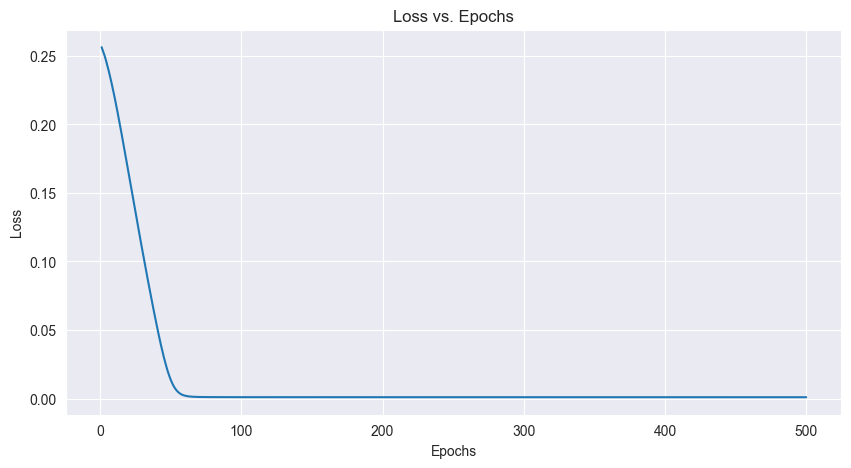

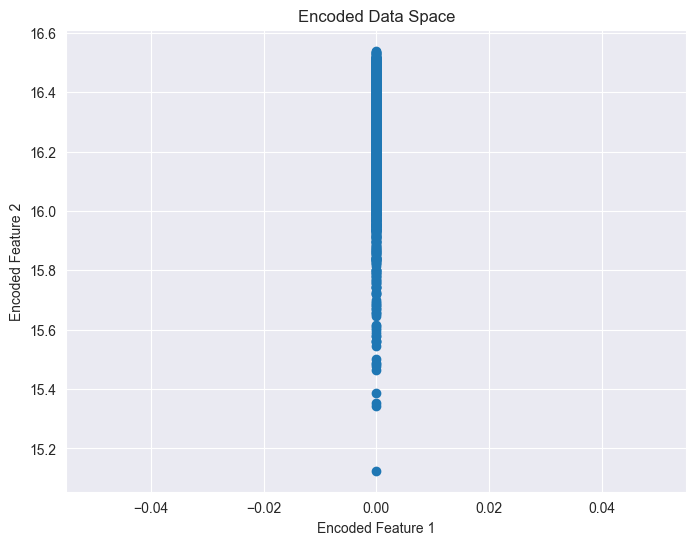

In [405]:
hospitalization1_tensor = Autoencoder.preprocessing_for_autoencoder(train_df)
H1_DR_AE_model, encoded_numpy = Autoencoder.train_autoencoder(hospitalization1_tensor, num_epochs = 500, hidden_size = 3, lr=0.01 )

In [406]:
Autoencoder.cal_reconstruction_loss(H1_DR_AE_model, hospitalization1_tensor)

Reconstruction Loss (MSE): 0.0010


In [407]:
# target_df['hosp_dur_class'].value_counts()
target_df.value_counts()

short     2613
medium    2339
long      2054
Name: hosp_dur_class, dtype: int64

In [408]:
hospitalization1[['hosp_dur_class','hospitalization_duration']].value_counts().to_frame()

0
hosp_dur_class hospitalization_duration      
short          1                         2024
medium         2                         1414
               3                          925
short          0                          589
long           4                          588
               5                          362
               6                          278
               7                          240
               8                          130
               9                           93
               10                          56
               12                          52
               11                          49
               13                          40
               14                          28
               15                          27
               17                          16
               16                          15
               19                          15
               18                          13
               21                          10
               20                           6
               24                           4
               26                           4
               28                           3
               22                           3
               27                           3
               35                           2
               31                           2
               25                           2
               23                           2
               29                           2
               32                           1
               33                           1
               34                           1
               37                           1
               43                           1
               45                           1
               49                           1
               50                           1
               41                           1

In [409]:
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(target_df)
num_classes = len(np.unique(encoded_target))  # Get the number of classes
print(num_classes)

3


In [410]:
# Extract features and target
X = encoded_numpy
y = encoded_target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, test_size=0.3, random_state=42)

# Convert data to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


Epoch [10/5000], Loss: 1.0975
Epoch [20/5000], Loss: 1.0975
Epoch [30/5000], Loss: 1.0975
Epoch [40/5000], Loss: 1.0975
Epoch [50/5000], Loss: 1.0975
Epoch [60/5000], Loss: 1.0975
Epoch [70/5000], Loss: 1.0975
Epoch [80/5000], Loss: 1.0975
Epoch [90/5000], Loss: 1.0975
Epoch [100/5000], Loss: 1.0975
Epoch [110/5000], Loss: 1.0975
Epoch [120/5000], Loss: 1.0975
Epoch [130/5000], Loss: 1.0975
Epoch [140/5000], Loss: 1.0975
Epoch [150/5000], Loss: 1.0975
Epoch [160/5000], Loss: 1.0975
Epoch [170/5000], Loss: 1.0975
Epoch [180/5000], Loss: 1.0975
Epoch [190/5000], Loss: 1.0975
Epoch [200/5000], Loss: 1.0975
Epoch [210/5000], Loss: 1.0975
Epoch [220/5000], Loss: 1.0975
Epoch [230/5000], Loss: 1.0975
Epoch [240/5000], Loss: 1.0975
Epoch [250/5000], Loss: 1.0975
Epoch [260/5000], Loss: 1.0975
Epoch [270/5000], Loss: 1.0975
Epoch [280/5000], Loss: 1.0975
Epoch [290/5000], Loss: 1.0975
Epoch [300/5000], Loss: 1.0975
Epoch [310/5000], Loss: 1.0975
Epoch [320/5000], Loss: 1.0975
Epoch [330/5000],

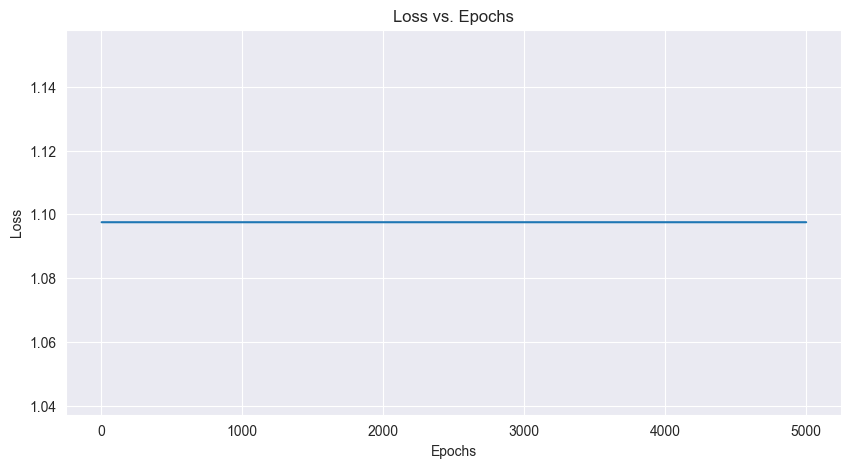

In [411]:
def train_model(X_train, y_train, input_size, num_classes, num_epochs=100, learning_rate=0.01):
    model_nn_class = NeuralNetworkClassifier(
            input_size=input_size, hidden_size=10, num_classes=num_classes
    )
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.model.parameters(), lr=learning_rate)
    # List to store loss over epochs
    loss_list = []

    # Training loop
    for epoch in range(num_epochs):
        outputs = model_nn_class.forward(X_train)
        loss = criterion(outputs, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Store the loss for this epoch
        loss_list.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    # Plotting loss vs epochs
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), loss_list)
    plt.title("Loss vs. Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

    return model_nn_class

# Train the model
input_size = X_train.shape[1]  # Number of features
h1_DR_AE_class_model = train_model(
    X_train=X_train, y_train=y_train, input_size=input_size, num_classes=num_classes, num_epochs=5000, learning_rate=0.01
)

In [412]:
# Evaluate the model
pipeline.evaluate_model(h1_DR_AE_class_model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.55      0.09      0.16       583
           1       0.35      0.93      0.51       728
           2       0.50      0.05      0.09       791

    accuracy                           0.36      2102
   macro avg       0.47      0.36      0.25      2102
weighted avg       0.46      0.36      0.25      2102



In [413]:
# Assuming y_test and y_pred are already computed
h1_DR_AE_class_model.model.eval()
with torch.no_grad():
    outputs = h1_DR_AE_class_model.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


In [414]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 1471
Value: 1, Count: 1611
Value: 2, Count: 1822
The class distribution for the y_test df is:
Value: 0, Count: 583
Value: 1, Count: 728
Value: 2, Count: 791
The class distribution for the y_pred df is:
Value: 0, Count: 98
Value: 1, Count: 1928
Value: 2, Count: 76


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


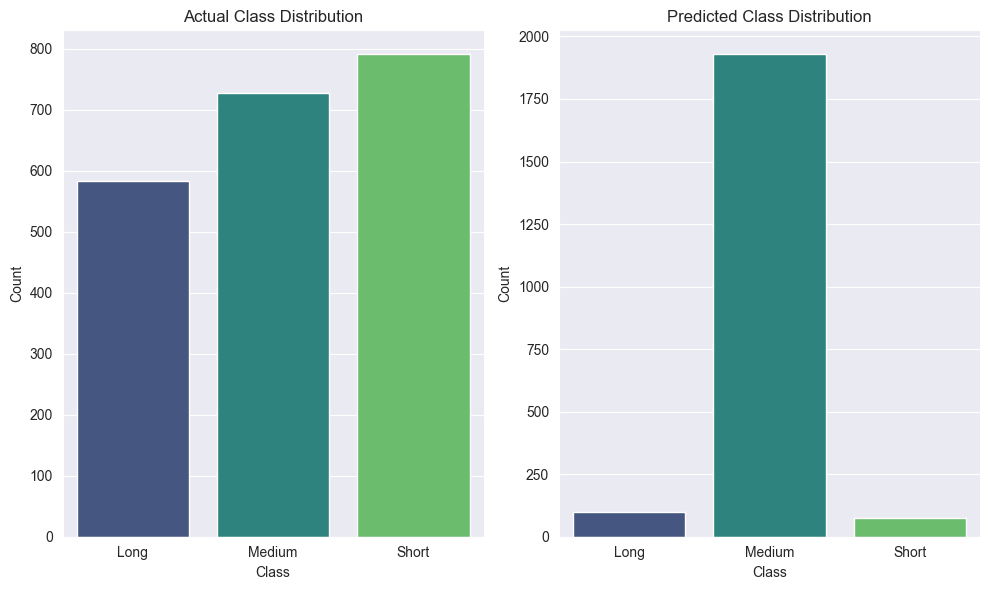

In [415]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

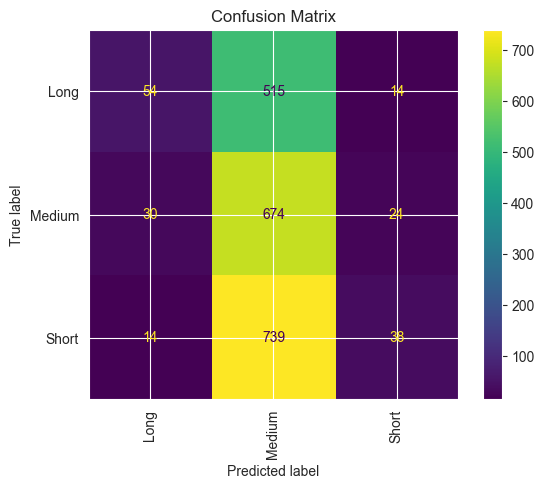

In [416]:
# Plot countplot for actual vs predicted class distribution
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

#### Running the data before dimension reduction as a base-line

In [361]:
task_37_base_line_df = pd.concat([target_df, train_df], axis=1)
task_37_base_line_df.head()

hosp_dur_class Patient department_id reception_type  \
4944          short      31             4         Urgent   
6842          short      31             4         Urgent   
6000          short     116             1         Urgent   
992          medium     122             5         Urgent   
2111          short     184             2         Urgent   

        Admission_Entry_Date patient_origin   Release_Type  \
4944 2020-07-26 09:01:59.213      From_home  Released_home   
6842 2020-07-31 03:17:42.087      From_home  Released_home   
6000 2021-07-08 16:33:04.860      From_home  Released_home   
992  2022-12-14 14:58:02.130      From_home  Released_home   
2111 2022-10-11 02:39:07.380      From_home  Released_home   

     release_doctor_code admission_diagnoses_1 admission_diagnoses_2  ...  \
4944             11460.0                 42731                        ...   
6842             10779.0                 42731                        ...   
6000             12427.0                  7862                  7865  ...   
992              11792.0                  2852                 28731  ...   
2111             11670.0                  7865                        ...   

     release_diagnoses_1 release_diagnoses_2 release_diagnoses_3  \
4944               42731                                           
6842               42731                                           
6000                7862                7865                       
992                 2859               28731                       
2111                7865                                           

     release_diagnoses_4 release_diagnoses_5 release_diagnoses_6  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_7 release_diagnoses_8 release_diagnoses_9  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_10  
4944                       
6842                       
6000                       
992                        
2111                       

[5 rows x 24 columns]

In [362]:
categorial_features_for_label_encoder = ['reception_type', 'patient_origin', 'Release_Type']
for column in categorial_features_for_label_encoder:
    label_encoder = LabelEncoder()
    task_37_base_line_df[column] = label_encoder.fit_transform(task_37_base_line_df[column])

In [376]:
task_37_base_line_df.head()

hosp_dur_class Patient department_id reception_type  \
4944          short      31             4              2   
6842          short      31             4              2   
6000          short     116             1              2   
992          medium     122             5              2   
2111          short     184             2              2   

        Admission_Entry_Date patient_origin Release_Type release_doctor_code  \
4944 2020-07-26 09:01:59.213              1            0             11460.0   
6842 2020-07-31 03:17:42.087              1            0             10779.0   
6000 2021-07-08 16:33:04.860              1            0             12427.0   
992  2022-12-14 14:58:02.130              1            0             11792.0   
2111 2022-10-11 02:39:07.380              1            0             11670.0   

     admission_diagnoses_1 admission_diagnoses_2  ... release_diagnoses_1  \
4944                 42731                        ...               42731   
6842                 42731                        ...               42731   
6000                  7862                  7865  ...                7862   
992                   2852                 28731  ...                2859   
2111                  7865                        ...                7865   

     release_diagnoses_2 release_diagnoses_3 release_diagnoses_4  \
4944                                                               
6842                                                               
6000                7865                                           
992                28731                                           
2111                                                               

     release_diagnoses_5 release_diagnoses_6 release_diagnoses_7  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_8 release_diagnoses_9 release_diagnoses_10  
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

[5 rows x 24 columns]

In [377]:
categorial_features_baseline = ['Patient', 'department_id','reception_type', 'patient_origin', 'Release_Type', 'release_doctor_code', 'admission_diagnoses_1', 'admission_diagnoses_2', 'admission_diagnoses_3', 'admission_diagnoses_4', 'admission_diagnoses_5', 'admission_diagnoses_6', 'release_diagnoses_1','release_diagnoses_2','release_diagnoses_3','release_diagnoses_4','release_diagnoses_5','release_diagnoses_6','release_diagnoses_7','release_diagnoses_8','release_diagnoses_9','release_diagnoses_10']

task_37_base_line_df[categorial_features_baseline] = task_37_base_line_df[categorial_features_baseline].astype('category')
task_37_base_line_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7006 entries, 4944 to 2333
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   hosp_dur_class         7006 non-null   object        
 1   Patient                7006 non-null   category      
 2   department_id          7006 non-null   category      
 3   reception_type         7006 non-null   category      
 4   Admission_Entry_Date   7006 non-null   datetime64[ns]
 5   patient_origin         7006 non-null   category      
 6   Release_Type           7006 non-null   category      
 7   release_doctor_code    7006 non-null   category      
 8   admission_diagnoses_1  7006 non-null   category      
 9   admission_diagnoses_2  7006 non-null   category      
 10  admission_diagnoses_3  7006 non-null   category      
 11  admission_diagnoses_4  7006 non-null   category      
 12  admission_diagnoses_5  7006 non-null   category      
 13  

In [368]:
target_baseline = task_37_base_line_df['hosp_dur_class']
encoded_target_baseline = label_encoder.fit_transform(target_baseline)
num_classes = len(np.unique(encoded_target))  # Get the number of classes
print(num_classes)

3


In [378]:
# Convert the datetime column to an integer (number of seconds since epoch)
task_37_base_line_df['Admission_Entry_Date_converted'] = task_37_base_line_df['Admission_Entry_Date'].view('int64') // 10**9  # Convert from nanoseconds to seconds
task_37_base_line_df.head()

hosp_dur_class Patient department_id reception_type  \
4944          short      31             4              2   
6842          short      31             4              2   
6000          short     116             1              2   
992          medium     122             5              2   
2111          short     184             2              2   

        Admission_Entry_Date patient_origin Release_Type release_doctor_code  \
4944 2020-07-26 09:01:59.213              1            0             11460.0   
6842 2020-07-31 03:17:42.087              1            0             10779.0   
6000 2021-07-08 16:33:04.860              1            0             12427.0   
992  2022-12-14 14:58:02.130              1            0             11792.0   
2111 2022-10-11 02:39:07.380              1            0             11670.0   

     admission_diagnoses_1 admission_diagnoses_2  ... release_diagnoses_2  \
4944                 42731                        ...                       
6842                 42731                        ...                       
6000                  7862                  7865  ...                7865   
992                   2852                 28731  ...               28731   
2111                  7865                        ...                       

     release_diagnoses_3 release_diagnoses_4 release_diagnoses_5  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_6 release_diagnoses_7 release_diagnoses_8  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_9 release_diagnoses_10 Admission_Entry_Date_converted  
4944                                                              1595754119  
6842                                                              1596165462  
6000                                                              1625761984  
992                                                               1671029882  
2111                                                              1665455947  

[5 rows x 25 columns]

In [380]:
task_37_base_line_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7006 entries, 4944 to 2333
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hosp_dur_class                  7006 non-null   object        
 1   Patient                         7006 non-null   category      
 2   department_id                   7006 non-null   category      
 3   reception_type                  7006 non-null   category      
 4   Admission_Entry_Date            7006 non-null   datetime64[ns]
 5   patient_origin                  7006 non-null   category      
 6   Release_Type                    7006 non-null   category      
 7   release_doctor_code             7006 non-null   category      
 8   admission_diagnoses_1           7006 non-null   category      
 9   admission_diagnoses_2           7006 non-null   category      
 10  admission_diagnoses_3           7006 non-null   category      
 11  a

In [386]:
scaler = StandardScaler()
admission_entry_date_converted = task_37_base_line_df['Admission_Entry_Date_converted'].values.reshape(-1, 1)
task_37_base_line_df['Admission_Entry_Date_standardized'] = scaler.fit_transform(admission_entry_date_converted)
task_37_base_line_df.head()

hosp_dur_class Patient department_id reception_type  \
4944          short      31             4              2   
6842          short      31             4              2   
6000          short     116             1              2   
992          medium     122             5              2   
2111          short     184             2              2   

        Admission_Entry_Date patient_origin Release_Type release_doctor_code  \
4944 2020-07-26 09:01:59.213              1            0             11460.0   
6842 2020-07-31 03:17:42.087              1            0             10779.0   
6000 2021-07-08 16:33:04.860              1            0             12427.0   
992  2022-12-14 14:58:02.130              1            0             11792.0   
2111 2022-10-11 02:39:07.380              1            0             11670.0   

     admission_diagnoses_1 admission_diagnoses_2  ... release_diagnoses_3  \
4944                 42731                        ...                       
6842                 42731                        ...                       
6000                  7862                  7865  ...                       
992                   2852                 28731  ...                       
2111                  7865                        ...                       

     release_diagnoses_4 release_diagnoses_5 release_diagnoses_6  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_7 release_diagnoses_8 release_diagnoses_9  \
4944                                                               
6842                                                               
6000                                                               
992                                                                
2111                                                               

     release_diagnoses_10 Admission_Entry_Date_converted  \
4944                                          1595754119   
6842                                          1596165462   
6000                                          1625761984   
992                                           1671029882   
2111                                          1665455947   

     Admission_Entry_Date_standardized  
4944                         -1.354156  
6842                         -1.342994  
6000                         -0.539928  
992                           0.688362  
2111                          0.537120  

[5 rows x 26 columns]

In [391]:
# Combine all diagnosis columns for consistent encoding
diagnosis_columns = [
    'admission_diagnoses_1', 'admission_diagnoses_2', 'admission_diagnoses_3',
    'admission_diagnoses_4', 'admission_diagnoses_5', 'admission_diagnoses_6',
    'release_diagnoses_1', 'release_diagnoses_2', 'release_diagnoses_3',
    'release_diagnoses_4', 'release_diagnoses_5', 'release_diagnoses_6',
    'release_diagnoses_7', 'release_diagnoses_8', 'release_diagnoses_9',
    'release_diagnoses_10'
]

# Concatenate all diagnosis columns into one to create consistent encoding
all_diagnoses = pd.concat([task_37_base_line_df[col] for col in diagnosis_columns], axis=0)

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(all_diagnoses.astype(str))  # Convert to string if necessary

# Encode each diagnosis column using the fitted encoder
for col in diagnosis_columns:
    task_37_base_line_df[col] = label_encoder.transform(task_37_base_line_df[col].astype(str))



In [393]:
# Define your features
features_baseline = ['Patient', 'department_id', 'reception_type', 
                     'Admission_Entry_Date_standardized', 'patient_origin', 
                     'Release_Type', 'release_doctor_code'] + diagnosis_columns

# Extract features and target
X = task_37_base_line_df[features_baseline]
y = encoded_target_baseline

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to numpy arrays
X_train_np = X_train.to_numpy().astype(np.float32)
X_test_np = X_test.to_numpy().astype(np.float32)

# Convert data to torch tensors
X_train = torch.tensor(X_train_np, dtype=torch.float32)
X_test = torch.tensor(X_test_np, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)



Epoch [10/5000], Loss: 3861.6357
Epoch [20/5000], Loss: 1561.9969
Epoch [30/5000], Loss: 1258.9969
Epoch [40/5000], Loss: 551.6861
Epoch [50/5000], Loss: 152.6074
Epoch [60/5000], Loss: 346.0266
Epoch [70/5000], Loss: 509.9035
Epoch [80/5000], Loss: 617.2353
Epoch [90/5000], Loss: 349.3149
Epoch [100/5000], Loss: 862.8669
Epoch [110/5000], Loss: 345.4774
Epoch [120/5000], Loss: 683.8430
Epoch [130/5000], Loss: 1109.4769
Epoch [140/5000], Loss: 383.0681
Epoch [150/5000], Loss: 100.1937
Epoch [160/5000], Loss: 54.5876
Epoch [170/5000], Loss: 361.8272
Epoch [180/5000], Loss: 433.8989
Epoch [190/5000], Loss: 492.1911
Epoch [200/5000], Loss: 593.1319
Epoch [210/5000], Loss: 366.8124
Epoch [220/5000], Loss: 465.3643
Epoch [230/5000], Loss: 75.2014
Epoch [240/5000], Loss: 238.3718
Epoch [250/5000], Loss: 426.4655
Epoch [260/5000], Loss: 296.3498
Epoch [270/5000], Loss: 320.0078
Epoch [280/5000], Loss: 577.2293
Epoch [290/5000], Loss: 216.8688
Epoch [300/5000], Loss: 463.0953
Epoch [310/5000],

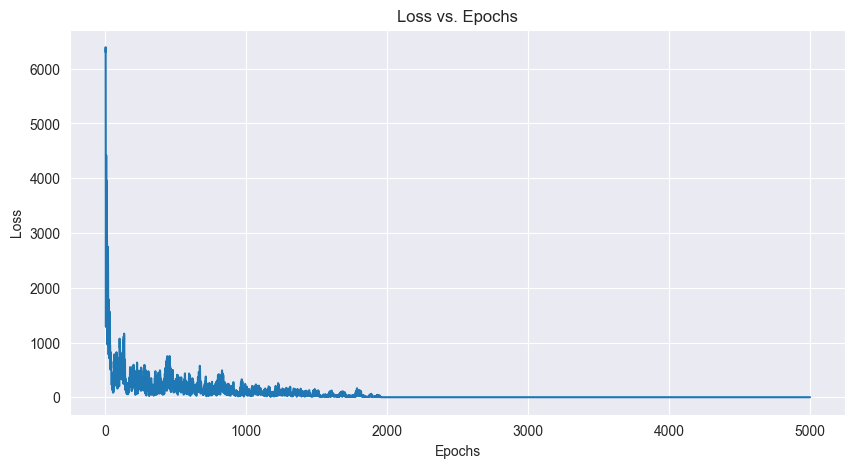

In [394]:
# Train the model
input_size = X_train.shape[1]  # Number of features
model_baseline = pipeline.train_model(
    X_train, y_train, input_size, num_classes=num_classes, num_epochs=5000, learning_rate=0.01
)

In [395]:
# Evaluate the model
pipeline.evaluate_model(model_baseline, X_test, y_test)

              precision    recall  f1-score   support

           0       0.39      0.46      0.43       583
           1       0.38      0.08      0.13       728
           2       0.44      0.71      0.55       791

    accuracy                           0.42      2102
   macro avg       0.40      0.42      0.37      2102
weighted avg       0.41      0.42      0.37      2102



In [400]:
print('The class distribution for the y_train df is:')
unique_values, counts = torch.unique(y_train, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_test df is:')
unique_values, counts = torch.unique(y_test, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")
print('The class distribution for the y_pred df is:')
unique_values, counts = torch.unique(y_pred, return_counts=True)
for value, count in zip(unique_values.tolist(), counts.tolist()):
    print(f"Value: {value}, Count: {count}")

The class distribution for the y_train df is:
Value: 0, Count: 1471
Value: 1, Count: 1611
Value: 2, Count: 1822
The class distribution for the y_test df is:
Value: 0, Count: 583
Value: 1, Count: 728
Value: 2, Count: 791
The class distribution for the y_pred df is:
Value: 0, Count: 1673
Value: 2, Count: 429


### Model result Visuals

In [401]:
class_names_ = ['Short', 'Medium', 'Long']

# Create the visualization object
vis = ClassificationVisualization()


In [402]:
# Assuming y_test and y_pred are already computed
model_baseline.model.eval()
with torch.no_grad():
    outputs = model_baseline.forward(X_test)
    _, y_pred = torch.max(outputs.data, 1)


D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:223: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_true, palette="viridis")
D:\GitHub\data-science2-lab-final-project\src\team_1\hospital_models\generic_torch_model2.py:231: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette="viridis")


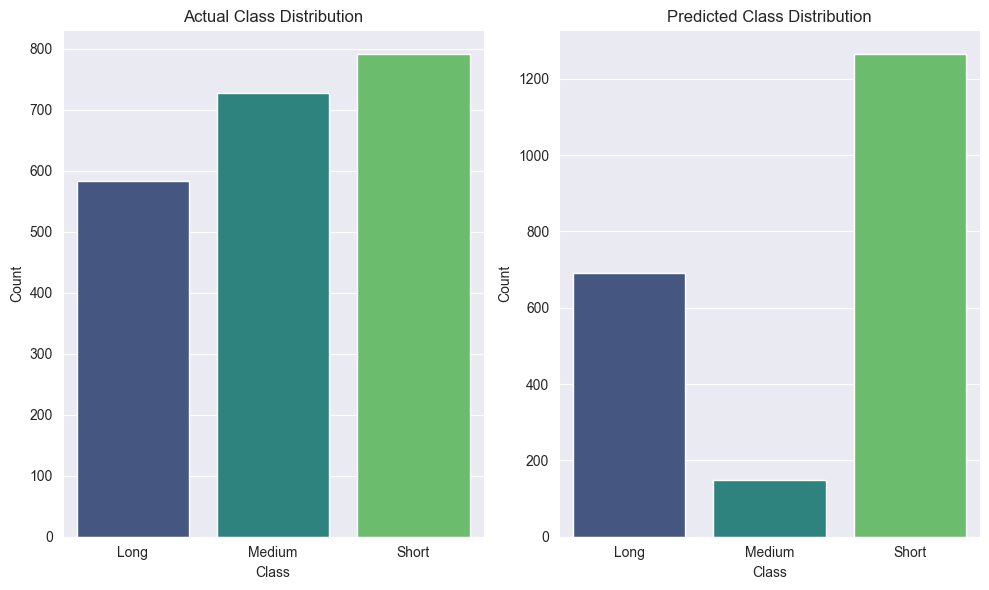

In [403]:
# Plot countplot for actual vs predicted class distribution
vis.plot_countplot(y_test, y_pred, class_names_corrected1)

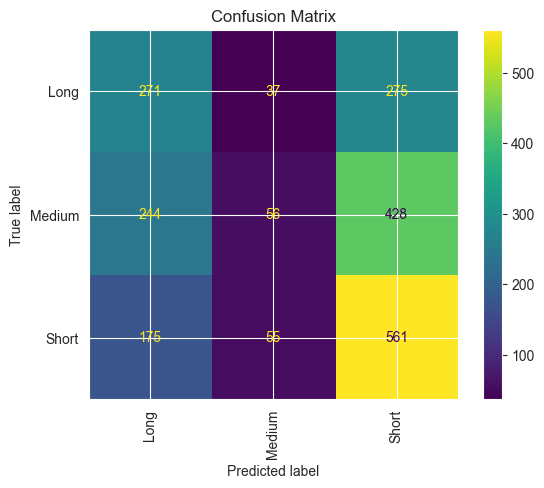

In [404]:
# Plot confusion matrix
vis.plot_confusion_matrix(y_test, y_pred, class_names_corrected1)

# ------------------- END TASK 37  ----------------